In [1]:
import sys
sys.path.append('D:\mcbj_stmbj')

from mcbj import *
import utils
import filter_traces 

import plots
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import rcParams
date = "21_12_08"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f"//DATACENTER/BreakJunction_group/BJ_Data/{date}")
import numpy as np
from matplotlib.ticker import MultipleLocator

import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
#                                                   mark_inset)

In [2]:
# utils.cmap_geo32 = ListedColormap(np.array([[255 / 255, 255 / 255, 255 / 255, 1],
#                                        [255 / 255, 235 / 255, 235 / 255, 1],
#                                        [255 / 255, 215 / 255, 215 / 255, 1],
#                                        [255 / 255, 196 / 255, 196 / 255, 1],
#                                        [245 / 255, 179 / 255, 174 / 255, 1],
#                                        [255 / 255, 158 / 255, 158 / 255, 1],
#                                        [255 / 255, 124 / 255, 124 / 255, 1],
#                                        [255 / 255, 90 / 255, 90 / 255, 1],
#                                        [238 / 255, 80 / 255, 78 / 255, 1],
#                                        [244 / 255, 117 / 255, 75 / 255, 1],
#                                        [255 / 255, 160 / 255, 69 / 255, 1],
#                                        [255 / 255, 189 / 255, 87 / 255, 1],
#                                        [247 / 255, 215 / 255, 104 / 255, 1],
#                                        [240 / 255, 236 / 255, 121 / 255, 1],
#                                        [223 / 255, 245 / 255, 141 / 255, 1],
#                                        [205 / 255, 255 / 255, 162 / 255, 1],
#                                        [172 / 255, 245 / 255, 168 / 255, 1],
#                                        [138 / 255, 236 / 255, 174 / 255, 1],
#                                        [124 / 255, 235 / 255, 200 / 255, 1],
#                                        [106 / 255, 235 / 255, 225 / 255, 1],
#                                        [97 / 255, 225 / 255, 240 / 255, 1],
#                                        [68 / 255, 202 / 255, 255 / 255, 1],
#                                        [50 / 255, 190 / 255, 255 / 255, 1],
#                                        [25 / 255, 175 / 255, 255 / 255, 1],
#                                        [13 / 255, 129 / 255, 248 / 255, 1],
#                                        [26 / 255, 102 / 255, 240 / 255, 1],
#                                        [0 / 255, 40 / 255, 224 / 255, 1],
#                                        [0 / 255, 25 / 255, 212 / 255, 1],
#                                        [0 / 255, 10 / 255, 200 / 255, 1],
#                                        [20 / 255, 5 / 255, 175 / 255, 1],
#                                        [40 / 255, 0 / 255, 150 / 255, 1],
#                                        [10 / 255, 0 / 255, 121 / 255, 1]]))

In [3]:
# rcParams['figure.constrained_layout.use'] = False
# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = ['Times New Roman']
# rcParams['mathtext.fontset'] = 'stix'
# rcParams['mathtext.rm'] = 'serif'
# rcParams['xtick.direction'] = 'in'
# rcParams['ytick.direction'] = 'in'
# rcParams['xtick.labelsize'] = 6
# rcParams['ytick.labelsize'] = 6
# rcParams['xtick.major.pad'] = 1.5
# rcParams['xtick.minor.pad'] = 0.5
# rcParams['ytick.major.pad'] = 1
# rcParams['ytick.minor.pad'] = 0.5
# rcParams['axes.labelsize'] = 6
# rcParams['axes.titlepad'] = 5.0
# rcParams['axes.labelpad'] = 1.5
# rcParams['agg.path.chunksize'] = 10000

In [2]:
hist_data = Histogram(folder=home_folder, start_trace=1, end_trace=8000,
                      conductance_range=(1e-6, 10),
                      conductance_bins_num=100,
                      conductance_log_scale=True,
                      conductance_bins_mode='total')
hist_data.calc_hist_1d()

  0%|          | 0/8000 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Normalized counts [a.u.]'>

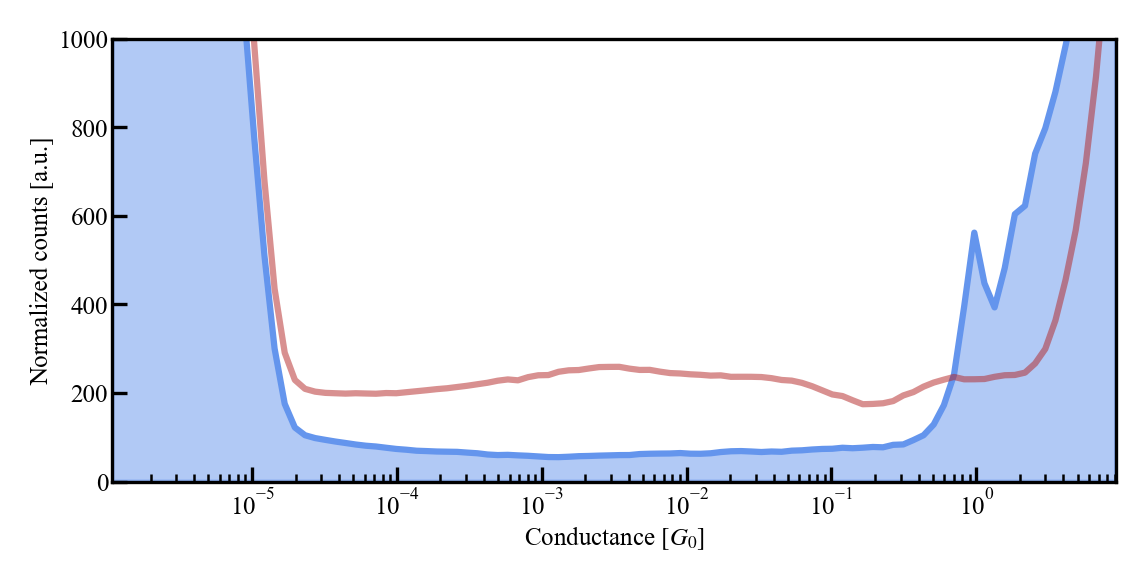

In [3]:
hist_data.plot_hist_1d(dpi=300, ylims=(0, 1000))

In [12]:
which_trace = np.random.choice(np.arange(1, 8001))
print(which_trace)
trace_pair = TracePair(f'trace_{which_trace}', load_from=home_folder)

7536


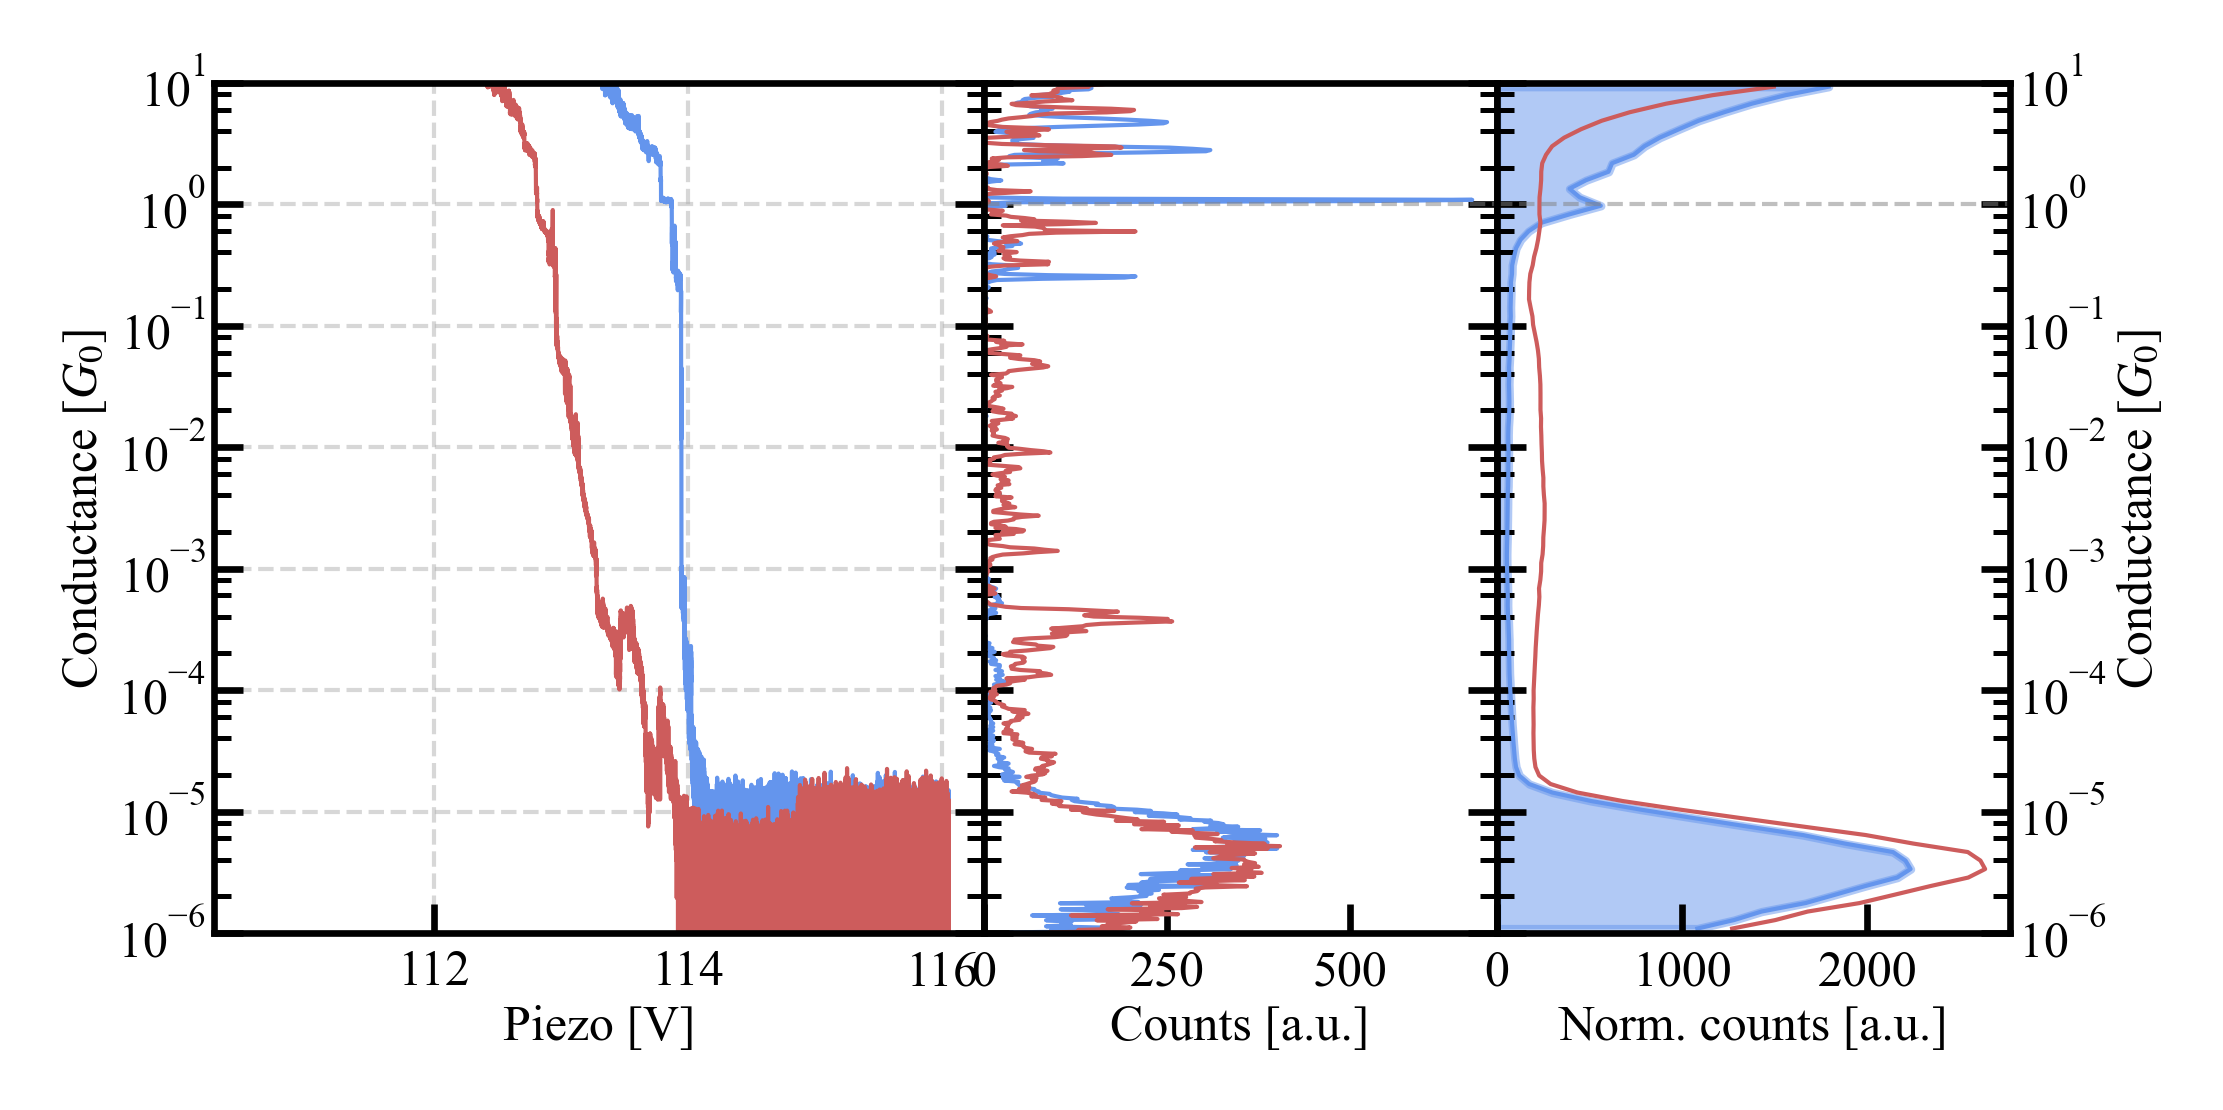

In [14]:
fig = plt.figure(figsize=utils.cm2inch(9.5, 4.5), dpi=600)  # figsize: (width, height) in inches

gs = gridspec.GridSpec(nrows=1, ncols=3, width_ratios=(3, 2, 2),
                           figure=fig, left=0.1, right=0.9, top=0.95, bottom=0.15, wspace=0, hspace=0)

ax_trace = fig.add_subplot(gs[0])
ax_single_hist = fig.add_subplot(gs[1])
ax_hist = fig.add_subplot(gs[2], sharey=ax_trace)

ax_hist.yaxis.set_label_position('right')
ax_hist.yaxis.tick_right()
ax_hist.yaxis.set_ticks_position('both')

ax_trace.yaxis.set_ticks_position('both')
ax_single_hist.yaxis.set_ticks_position('both')
ax_single_hist.set_yscale('log')

ax_trace = trace_pair.plot_trace_pair(ax=ax_trace)

# ax_single_hist.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
# ax_single_hist.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.2), numticks=9))
ax_single_hist.set_yticks(ax_trace.get_yticks())
ax_single_hist.set_yticklabels(['']*len(ax_single_hist.get_yticks()))
ax_single_hist.set_yticks(ax_trace.get_yticks(minor=True), minor=True)
ax_single_hist.set_yticklabels(['']*len(ax_single_hist.get_yticks(minor=True)), minor=True)

ax_single_hist.set_ylim(ax_trace.get_ylim())

bins_pull, single_hist_pull = utils.calc_hist_1d_single(data=trace_pair.conductance_pull,
                                                        xrange=(1e-6, 10), xbins_num=100, log_scale=True)

bins_push, single_hist_push = utils.calc_hist_1d_single(data=trace_pair.conductance_push,
                                                        xrange=(1e-6, 10), xbins_num=100, log_scale=True)

ax_single_hist.plot(single_hist_pull, bins_pull, lw=0.5, c='cornflowerblue')
ax_hist.plot(hist_data.hist_1d_pull, hist_data.hist_1d_bins, lw=0.5, c='cornflowerblue')

ax_hist.fill_betweenx(hist_data.hist_1d_bins, hist_data.hist_1d_pull, np.zeros_like(hist_data.hist_1d_pull), alpha=0.5,
                      color='cornflowerblue')

ax_single_hist.plot(single_hist_push, bins_push, lw=0.5, c='indianred')
ax_hist.plot(hist_data.hist_1d_push, hist_data.hist_1d_bins, lw=0.5, c='indianred')

ax_single_hist.axhline(1, ls='--', lw=0.5, alpha=0.5, c='grey')
ax_hist.axhline(1, ls='--', lw=0.5, alpha=0.5, c='grey')

ax_single_hist.set_xlabel('Counts [a.u.]')
ax_hist.set_xlabel('Norm. counts [a.u.]')
ax_hist.set_ylabel(r'Conductance [$G_{0}$]')

ax_single_hist.set_xlim(0)
ax_hist.set_xlim(0)
# ax_trace.set_xlim(105, 108.5)

plt.savefig(home_folder.joinpath(f'results/article/trace_and_histograms_{which_trace}.png'))

In [15]:
# which_trace = np.random.choice(in_both[np.bitwise_and(relax_ratio_pull<10, relax_ratio_pull>2)])
which_trace=16245 # 16172
print(which_trace)

hold_trace = HoldTrace(which_trace, load_from=home_folder, bias_offset=0,
                       r_serial_ohm=100_000, min_step_len=20_000, min_height=1)
trace_pair = TracePair(f'trace_{which_trace}', load_from=home_folder)
hold_trace.analyse_hold_trace(num_of_fft=1)

16245


(1e-05, 0.05)

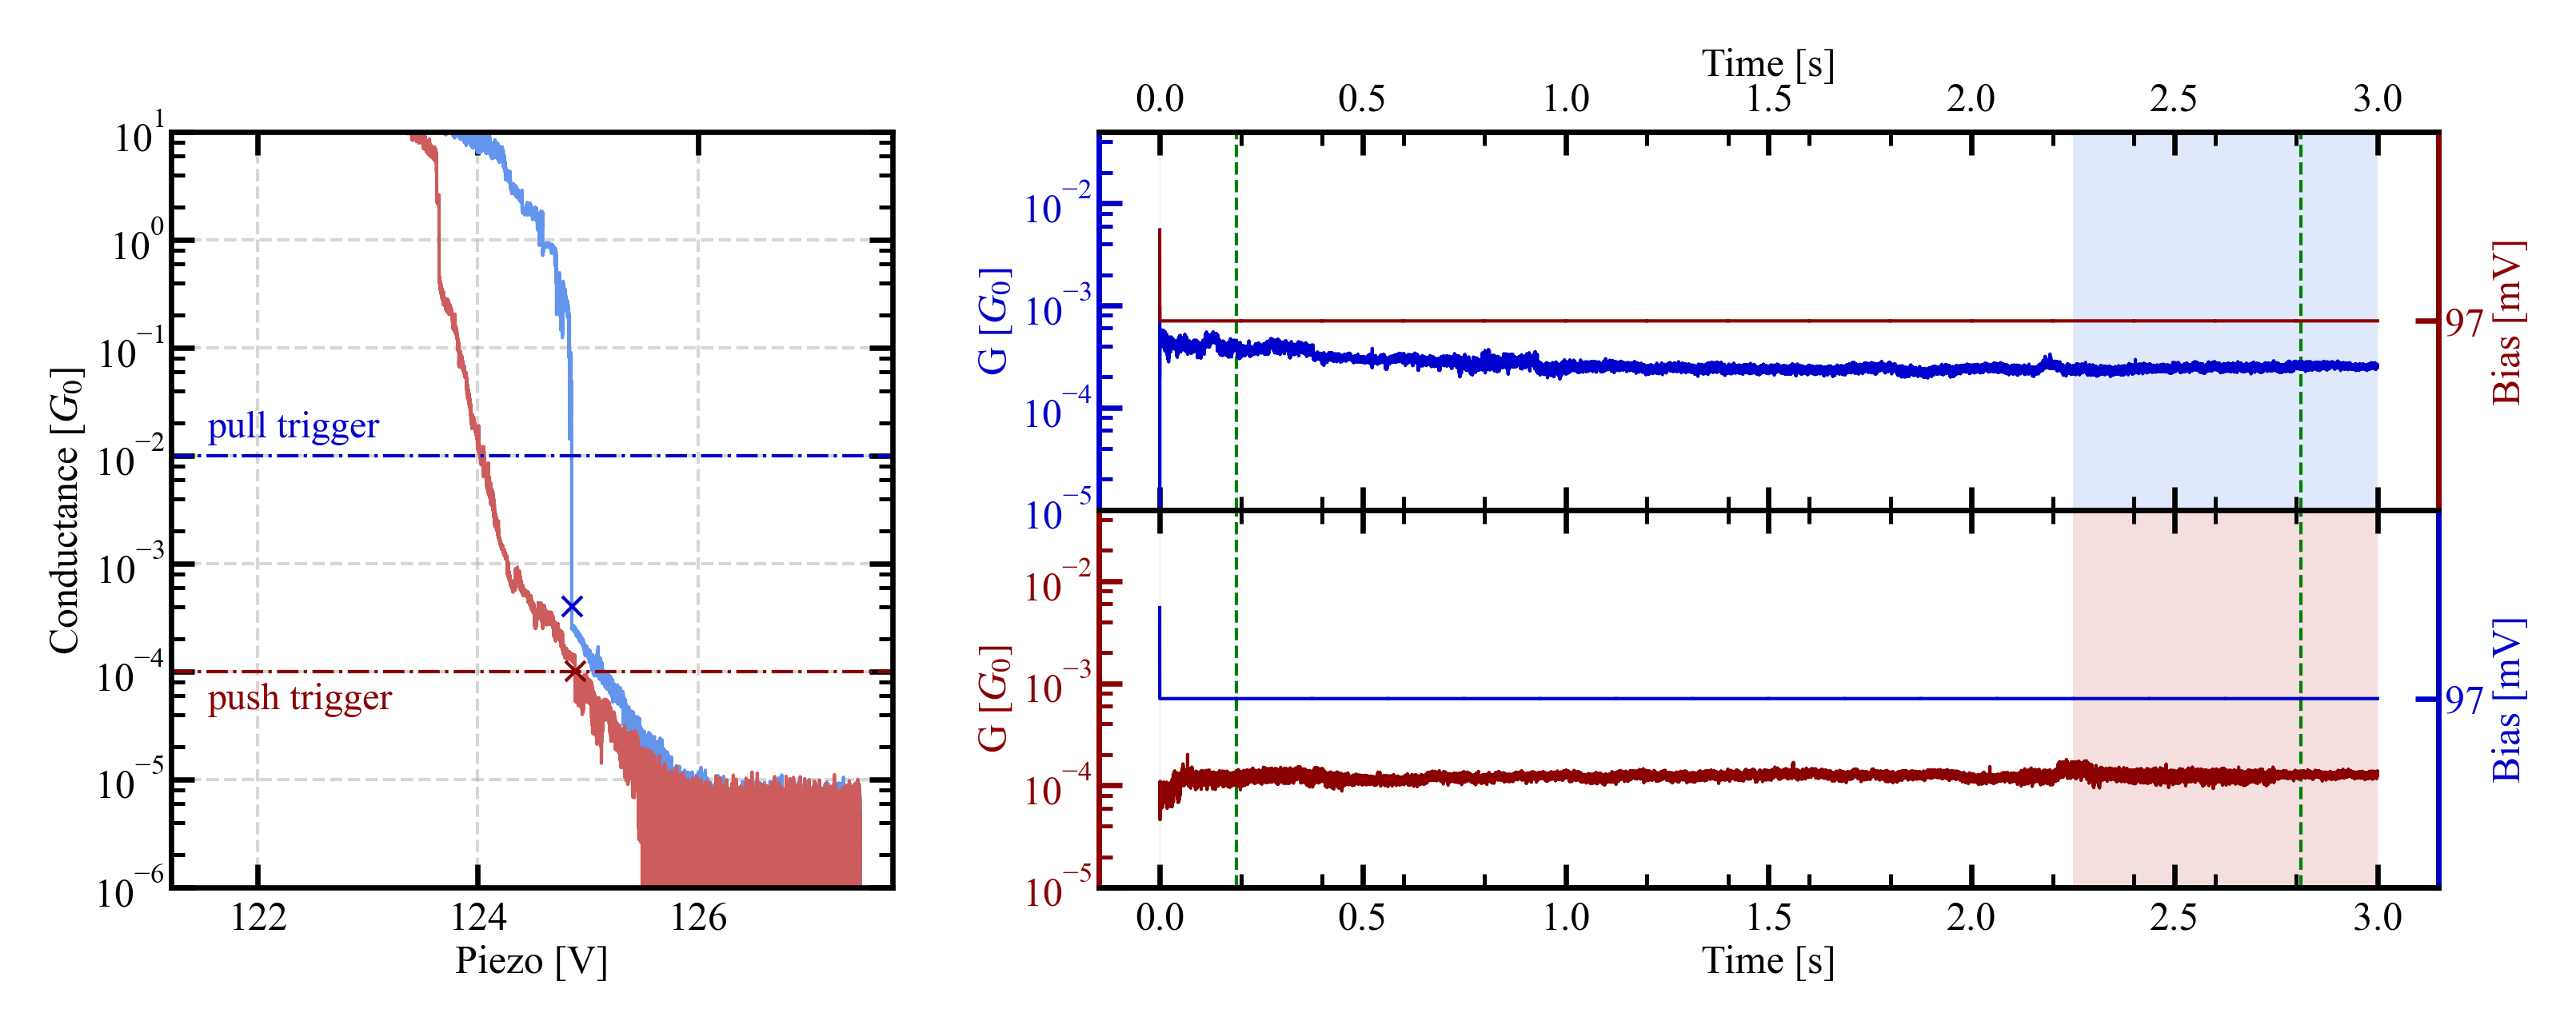

In [16]:
ax_trace, ax_pull, ax_push = plots.plot_measurement_scheme(trace_pair=trace_pair,
                                                           hold_trace=hold_trace,
                                                           home_folder=home_folder,
                                                           main_colors=('cornflowerblue', 'indianred'),
                                                           accent_colors=('mediumblue', 'darkred'),
                                                           save_fig=False,
                                                           xlim=None, smoothing=1)
# ax_pull.axvline(3*len(hold_trace.hold_conductance_pull)/4/50_000, ls='--', c='grey', alpha=0.3, lw = 0.8)
# ax_push.axvline(3*len(hold_trace.hold_conductance_push)/4/50_000, ls='--', c='grey', alpha=0.3, lw = 0.8)
ax_pull.axvspan(20/50_000, 50/50_000, alpha=0.2, color='cornflowerblue', ec=None)
ax_pull.axvspan(3*len(hold_trace.hold_conductance_pull)/4/50_000,
           len(hold_trace.hold_conductance_pull)/50_000, alpha=0.2, color='cornflowerblue', ec=None)
ax_push.axvspan(20/50_000, 50/50_000, alpha=0.2, color='indianred', ec=None)
ax_push.axvspan(3*len(hold_trace.hold_conductance_push)/4/50_000,
           len(hold_trace.hold_conductance_push)/50_000, alpha=0.2, color='indianred', ec=None)
ax_pull.set_ylim(1e-5)
ax_push.set_ylim(1e-5)
# ax_pull.set_xlim(-0.0005, 0.002)
# ax_push.set_xlim(-0.0005, 0.002)

In [85]:
pull_hold, push_hold = filter_traces.filter_hold(folder=home_folder,
                                                 filter_condition=filter_traces.does_not_break_array,
                                                 start_trace=8001, end_trace=14000, min_step_len=20_000, r_serial_ohm=99_900)

  0%|          | 0/6000 [00:00<?, ?it/s]

In [86]:
pull_hold.shape

(2635,)

In [87]:
np.intersect1d(pull_hold, push_hold).shape

(2634,)

In [280]:
# which_trace = np.random.choice(in_both[np.bitwise_and(relax_ratio_pull<10, relax_ratio_pull>2)])
# which_trace=np.random.choice(np.intersect1d(pull_hold, push_hold))  # 12273, 11793, 9345, 11748, 13242, 8970, 10179, 9953, 10290, 8892, 11134, 13572
which_trace = 9345#, 11748, 13242, 8970, 10179, 9953, 10290, 8892, 11134, 13572
print(which_trace)

hold_trace = HoldTrace(which_trace, load_from=home_folder, bias_offset=0,
                       r_serial_ohm=100_000, min_step_len=20_000, min_height=1)
trace_pair = TracePair(f'trace_{which_trace}', load_from=home_folder)
hold_trace.analyse_hold_trace(num_of_fft=1)

9345


(1e-05, 0.05)

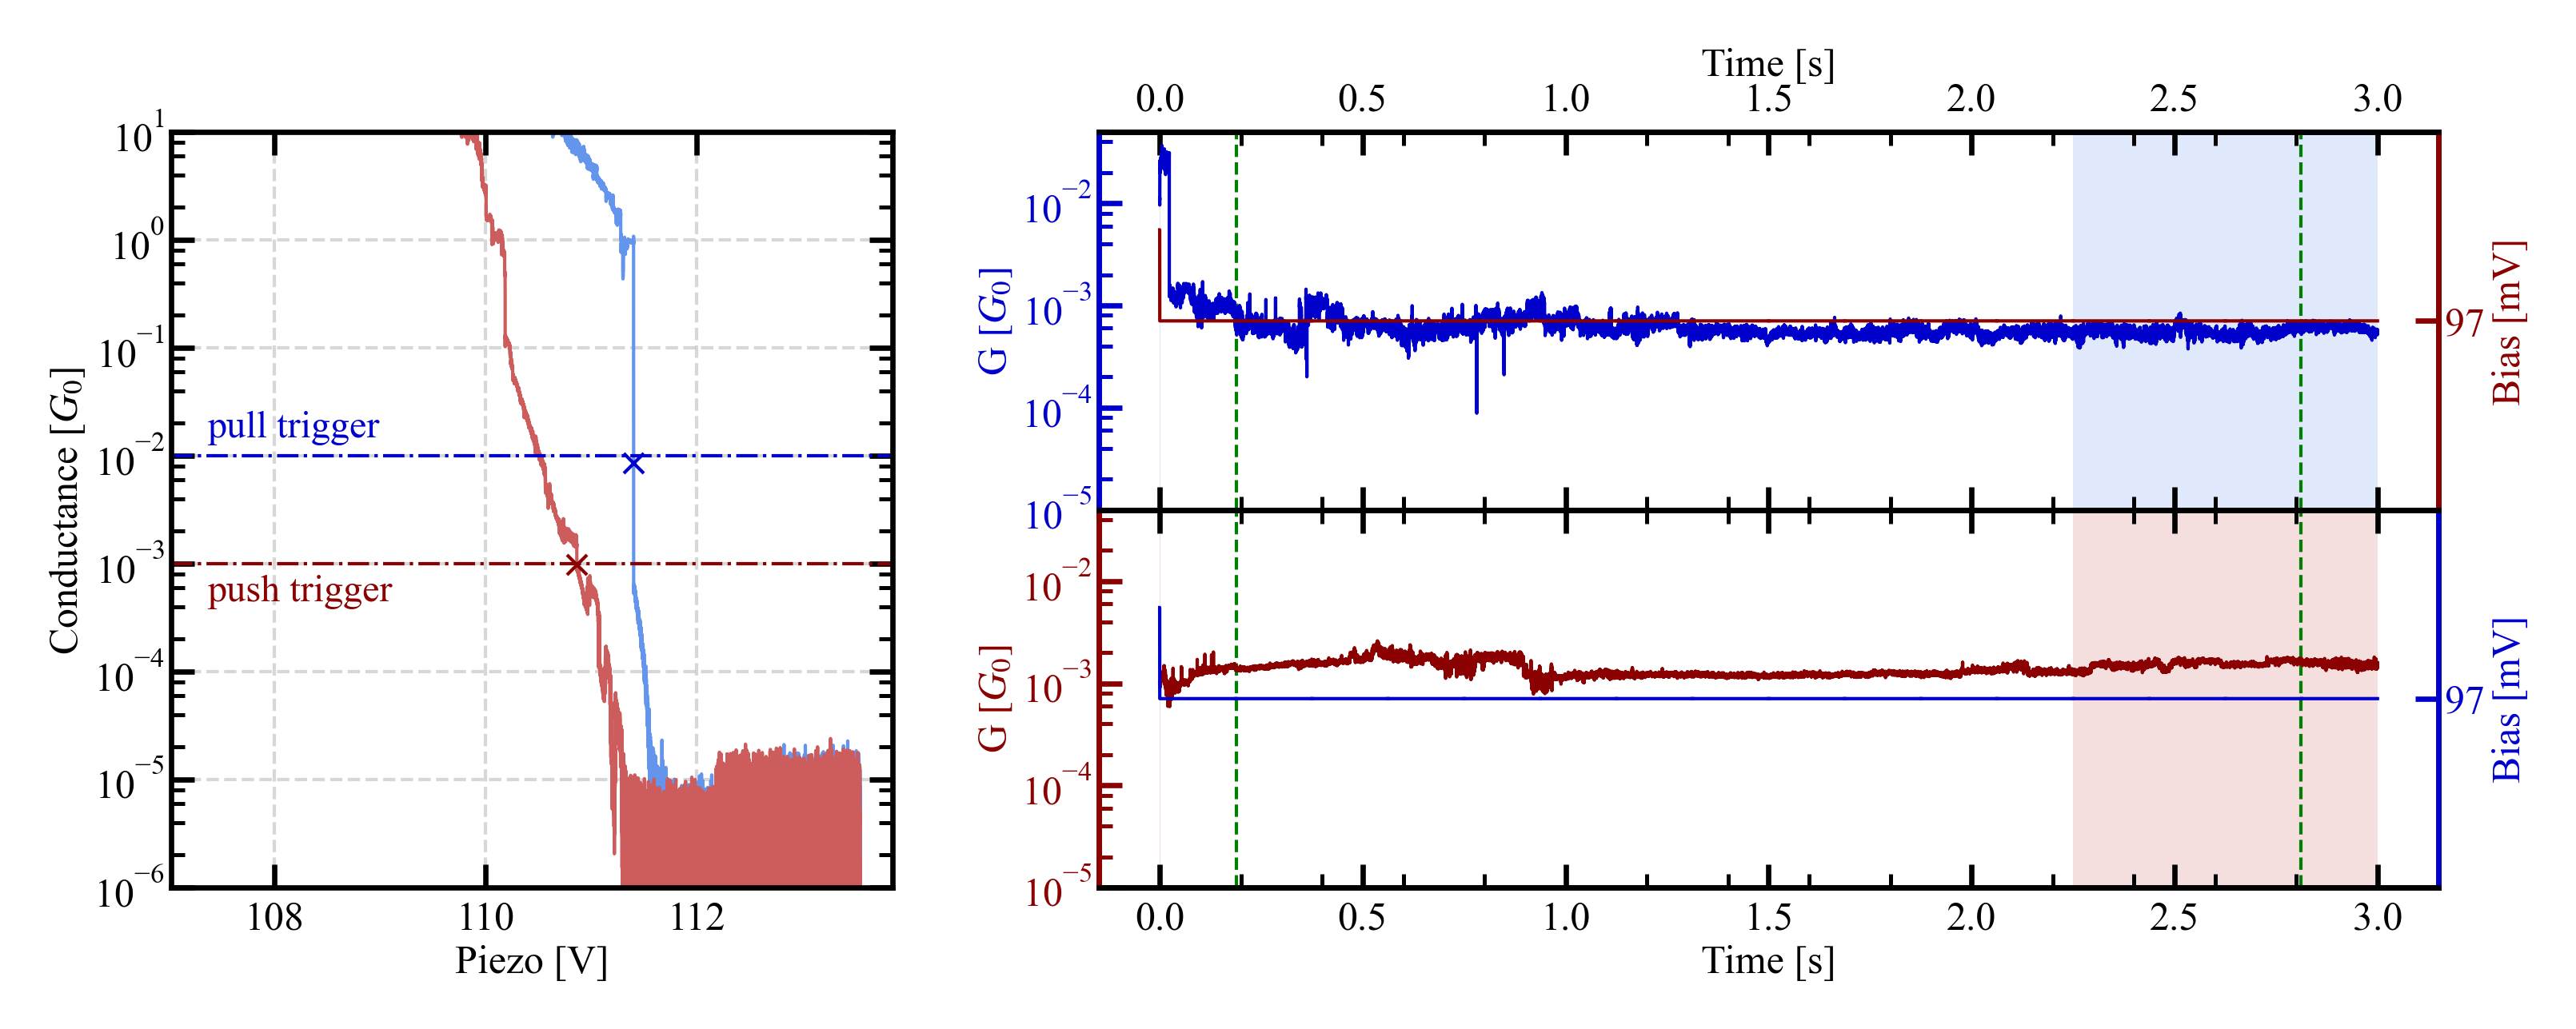

In [281]:
ax_trace, ax_pull, ax_push = plots.plot_measurement_scheme(trace_pair=trace_pair,
                                                           hold_trace=hold_trace,
                                                           home_folder=home_folder,
                                                           main_colors=('cornflowerblue', 'indianred'),
                                                           accent_colors=('mediumblue', 'darkred'),
                                                           save_fig=False,
                                                           xlim=None, smoothing=1)
# ax_pull.axvline(3*len(hold_trace.hold_conductance_pull)/4/50_000, ls='--', c='grey', alpha=0.3, lw = 0.8)
# ax_push.axvline(3*len(hold_trace.hold_conductance_push)/4/50_000, ls='--', c='grey', alpha=0.3, lw = 0.8)
ax_pull.axvspan(20/50_000, 50/50_000, alpha=0.2, color='cornflowerblue', ec=None)
ax_pull.axvspan(3*len(hold_trace.hold_conductance_pull)/4/50_000,
           len(hold_trace.hold_conductance_pull)/50_000, alpha=0.2, color='cornflowerblue', ec=None)
ax_push.axvspan(20/50_000, 50/50_000, alpha=0.2, color='indianred', ec=None)
ax_push.axvspan(3*len(hold_trace.hold_conductance_push)/4/50_000,
           len(hold_trace.hold_conductance_push)/50_000, alpha=0.2, color='indianred', ec=None)
ax_pull.set_ylim(1e-5)
ax_push.set_ylim(1e-5)
# ax_pull.set_xlim(-0.0005, 0.002)
# ax_push.set_xlim(-0.0005, 0.002)

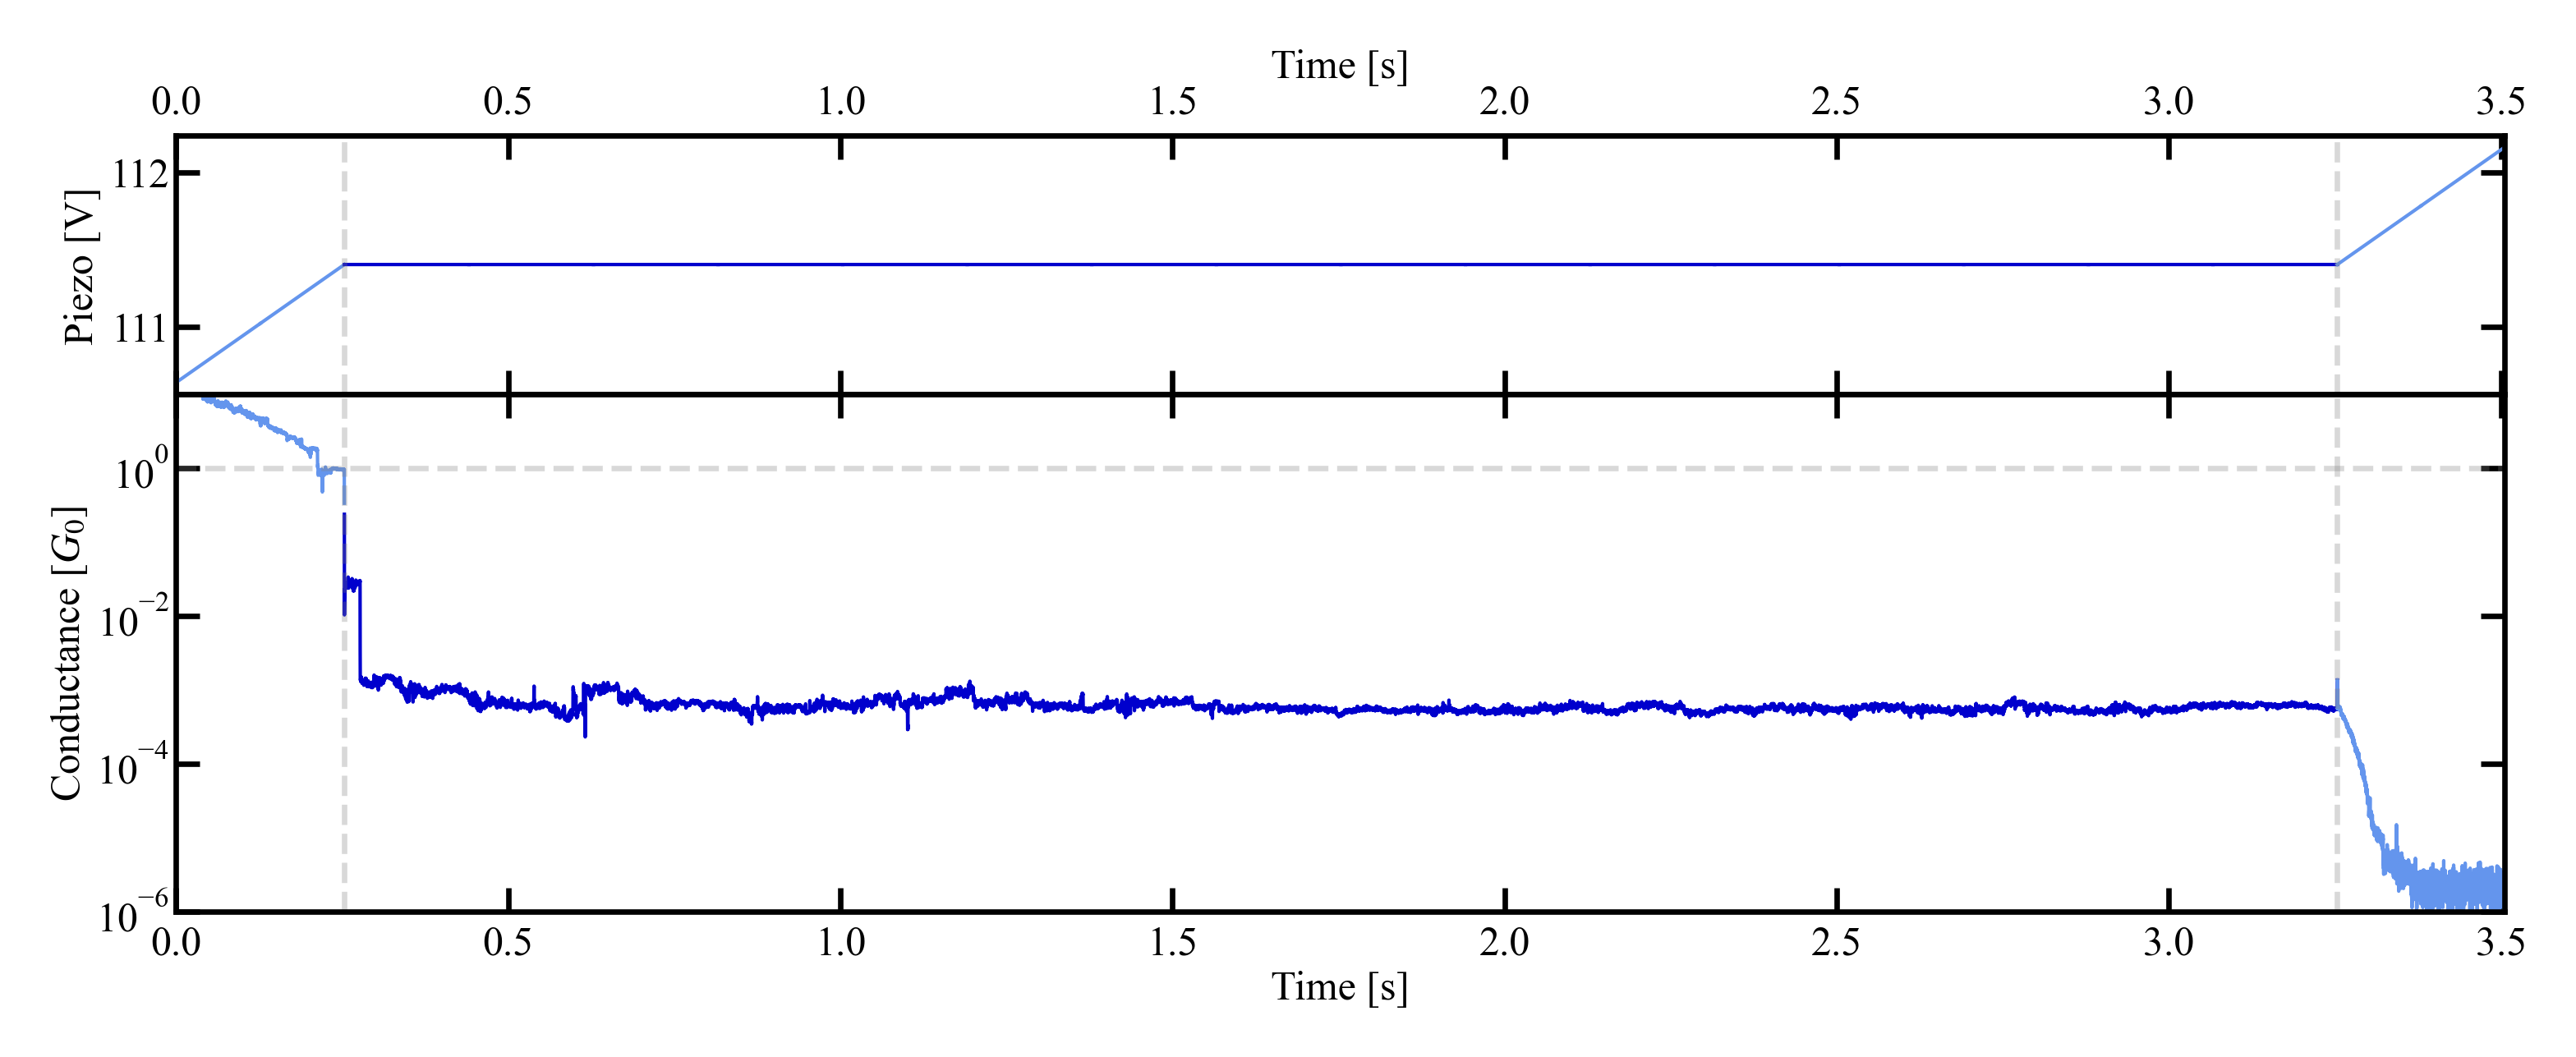

In [282]:
ax_piezo, ax = plots.plot_measurement_scheme_combed(trace_pair=trace_pair, hold_trace=hold_trace, home_folder=home_folder, smoothing=10,
                                          direction='pull',
                                          main_colors=('cornflowerblue', 'indianred'),
                                          accent_colors=('mediumblue', 'darkred'),
                                          add_vlines_for_hold=True,
                                          save_fig=False)
ax.axhline(1, ls='--', c='grey', alpha=0.3, lw = 0.8)
# ax.axvline((trace_pair.hold_index_pull + relax_ends_at)/50_000, ls='--', c='grey', alpha=0.4, lw = 1)

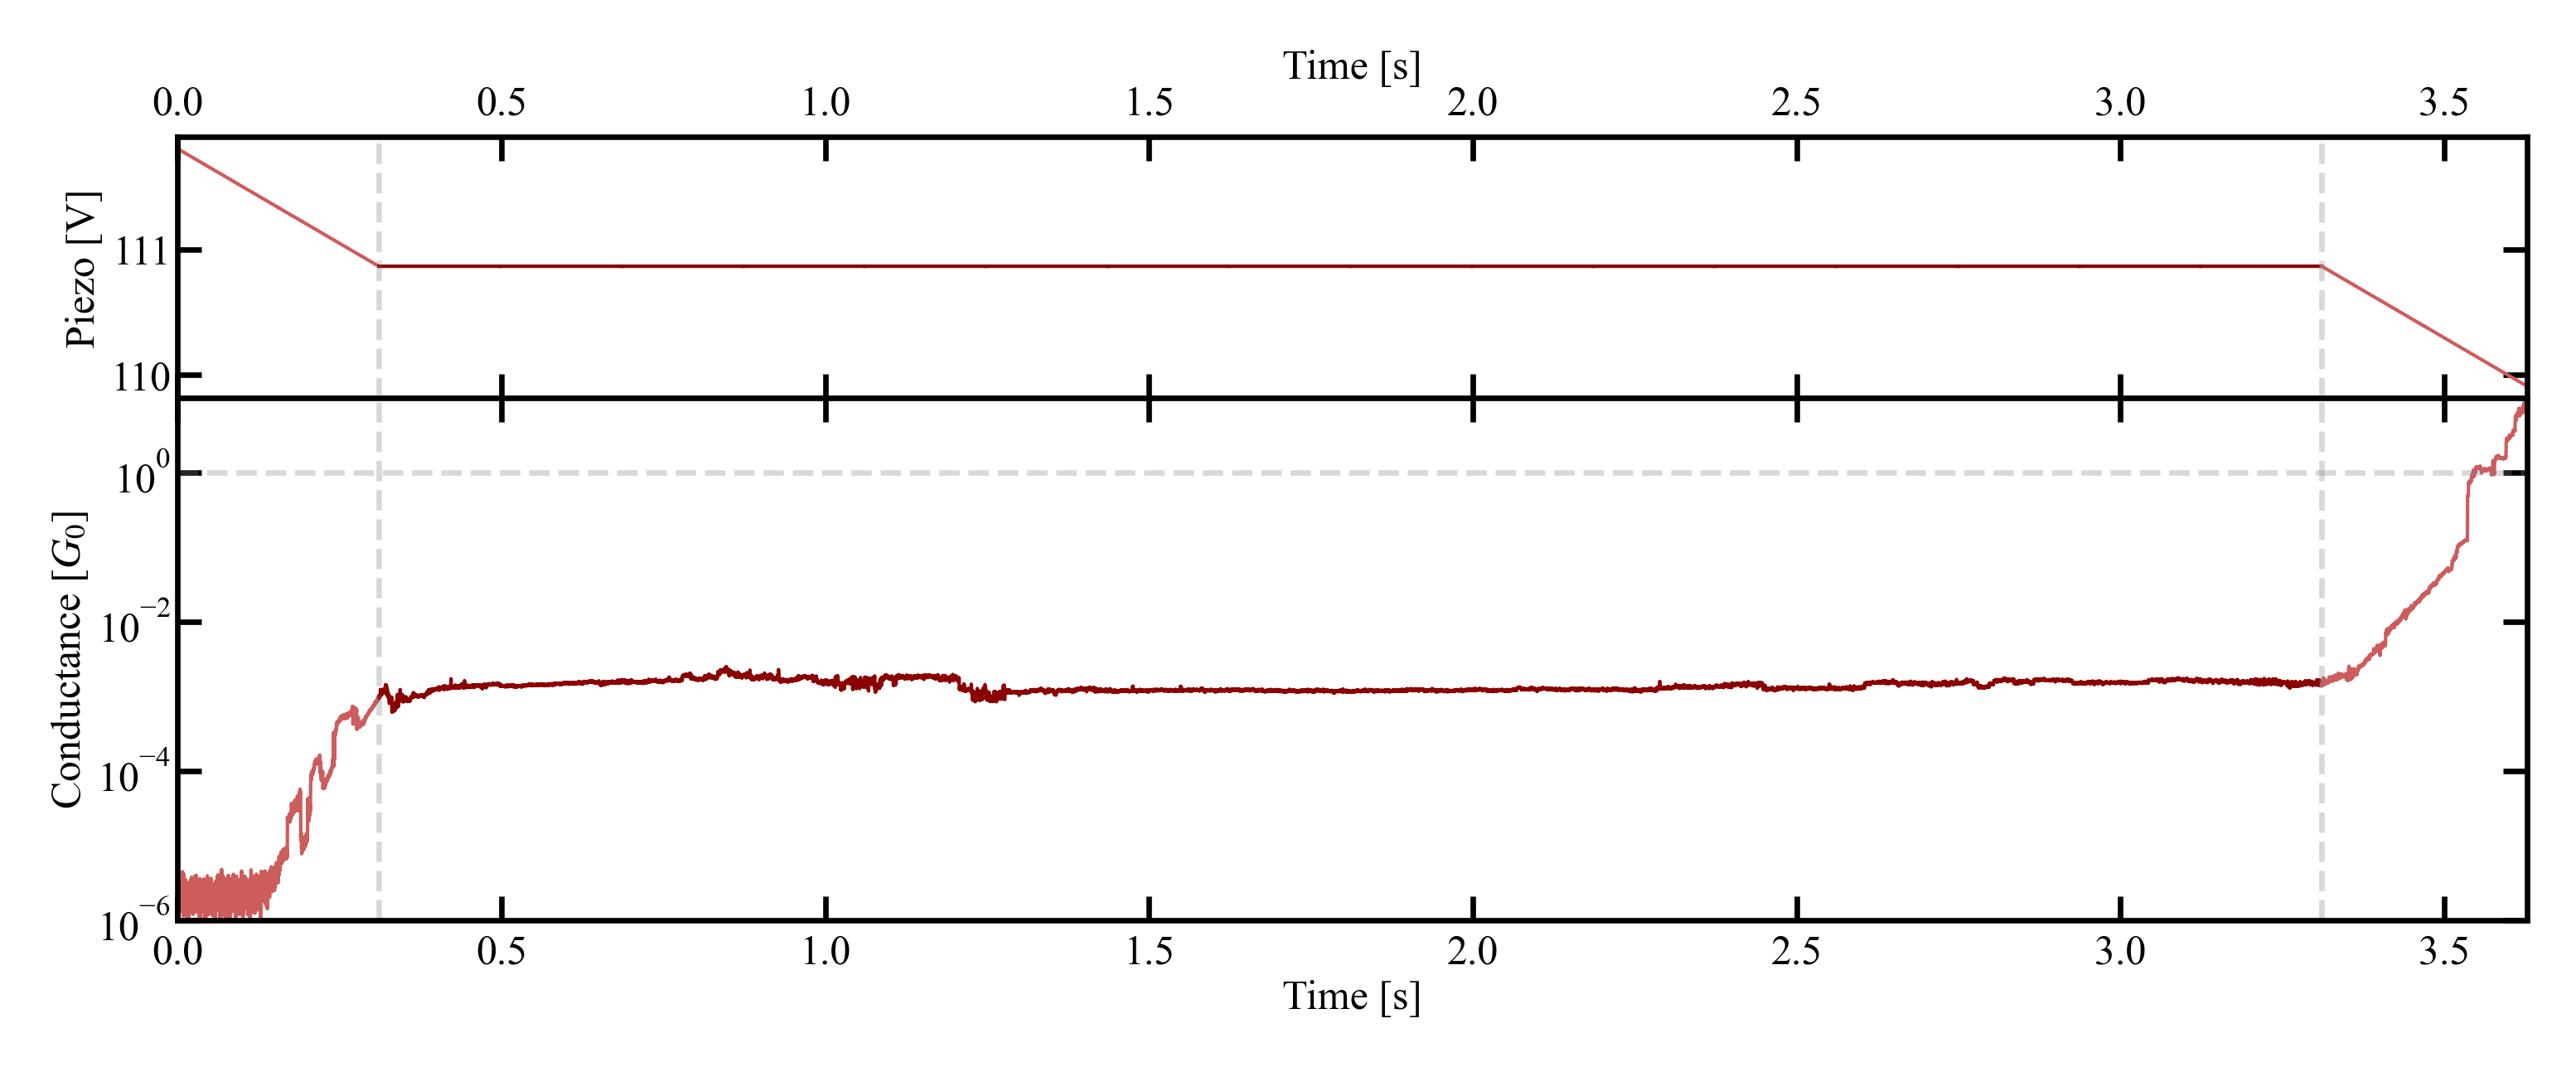

In [283]:
ax_piezo, ax = plots.plot_measurement_scheme_combed(trace_pair=trace_pair, hold_trace=hold_trace, home_folder=home_folder, smoothing=10,
                                          direction='push',
                                          main_colors=('cornflowerblue', 'indianred'),
                                          accent_colors=('mediumblue', 'darkred'),
                                          add_vlines_for_hold=True,
                                          save_fig=False)
ax.axhline(1, ls='--', c='grey', alpha=0.3, lw = 0.8)

In [285]:
conductance_stat_pull = pd.read_csv(home_folder.joinpath("results/conductance_stats_pull_1.csv"), skiprows=[1])
conductance_stat_push = pd.read_csv(home_folder.joinpath("results/conductance_stats_push_1.csv"), skiprows=[1])

In [286]:
conductance_stat_pull

trace_index  G_set    G_stop    G_hold         G_avg  G_avgs_1  \
0           8001.0   0.01  0.007683  0.003697  6.178841e-06  0.003697   
1           8002.0   0.01  0.010172  0.013590  5.689503e-07  0.013590   
2           8003.0   0.01  0.002130  0.000024  3.525392e-07  0.000024   
3           8004.0   0.01  0.002607  0.000033  1.738074e-06  0.000033   
4           8005.0   0.01  0.009085  0.009602  1.768714e-06  0.009602   
...            ...    ...       ...       ...           ...       ...   
14995      22996.0   0.01  0.003071  0.000017  2.910807e-06  0.000017   
14996      22997.0   0.01  0.010050  0.011665  2.273078e-06  0.011665   
14997      22998.0   0.01  0.000328  0.000136  2.579423e-07  0.000136   
14998      22999.0   0.01  0.002809  0.000234  5.491758e-07  0.000234   
14999      23000.0   0.01  0.001284  0.000004  1.847249e-07  0.000004   

           G_avgs_2      G_avgs_3      G_avgs_4      G_avgs_5  ...  \
0      1.908848e-03  4.243688e-05  7.507073e-05  1.016793e-04  ...   
1      3.498873e-06  3.798441e-07  4.861287e-07  3.365071e-07  ...   
2      3.927827e-06  7.648657e-07  2.129393e-06  9.518249e-07  ...   
3      3.409848e-05  2.155516e-05  1.210658e-05  1.137582e-05  ...   
4      6.441502e-03  1.036186e-02  9.595647e-03  8.931681e-03  ...   
...             ...           ...           ...           ...  ...   
14995  1.384691e-05  9.820536e-06  6.253616e-06  1.738440e-06  ...   
14996  5.015329e-03  4.121166e-03  3.988422e-03  3.936233e-03  ...   
14997  1.042633e-04  1.186109e-06  1.943158e-07  6.450588e-07  ...   
14998  6.785496e-05  3.436566e-05  1.801427e-06  1.554647e-06  ...   
14999  6.461716e-07  6.388065e-07  5.768181e-07  2.609309e-07  ...   

          G_avgs_16     G_avgs_17     G_avgs_18     G_avgs_19     G_avgs_20  \
0      3.671386e-05  7.491817e-06  1.614632e-05  1.281724e-05  1.238165e-05   
1      2.062932e-07  3.150865e-07  2.717450e-07 -4.369999e-08  1.929433e-07   
2      6.812380e-07  3.790015e-07  4.577195e-07  2.781628e-07  3.347233e-07   
3      2.736410e-06  2.079726e-06  3.961939e-06  2.843415e-06  9.057537e-06   
4      1.907414e-06  2.829021e-06  2.818837e-06  3.947030e-06  1.676657e-06   
...             ...           ...           ...           ...           ...   
14995  4.135147e-06  4.482833e-06  9.189959e-06  3.145302e-06  4.457013e-06   
14996  1.842650e-03  1.980270e-03  1.704974e-03  5.502075e-04  3.227743e-06   
14997  7.820491e-07  5.709179e-07  2.997442e-07  6.462178e-07  3.219866e-07   
14998  1.522276e-06  8.666489e-07  5.949813e-07  3.622658e-07  4.262210e-07   
14999  3.411811e-07  2.794640e-07  4.885850e-07  2.509244e-07  5.690454e-07   

          G_avgs_21     G_avgs_22     G_avgs_23     G_avgs_24     G_avgs_25  
0      1.063657e-05  9.592733e-06  1.068418e-05  1.112620e-05  6.018414e-06  
1      3.776240e-07  3.190076e-07  1.361217e-06  2.422319e-07  5.428719e-07  
2      5.605888e-07  8.444890e-07  4.513566e-07  7.593155e-07  3.335956e-07  
3      9.490890e-06  3.974238e-06  1.024432e-05  1.018128e-06  1.820744e-06  
4      2.096873e-06  2.073547e-06  1.449347e-06  2.158178e-06  1.823086e-06  
...             ...           ...           ...           ...           ...  
14995  4.162483e-06  2.916492e-06  2.443711e-06  2.374883e-06  2.438407e-06  
14996  3.328623e-06  1.882727e-06  1.738018e-06  3.569152e-06  2.328688e-06  
14997  4.498997e-07  8.347504e-07  4.833025e-07  5.216972e-07  1.462373e-07  
14998  7.947274e-07  3.879096e-07  6.128364e-07  7.048278e-07  5.969071e-07  
14999  5.291637e-07  3.006052e-07  1.603830e-07  4.174792e-07  2.346675e-07  

[15000 rows x 30 columns]

In [287]:
conductance_stat_push

trace_index   G_set    G_stop    G_hold     G_avg  G_avgs_1  G_avgs_2  \
0           8001.0  0.0010  0.001043  0.000874  0.001241  0.000874  0.001124   
1           8002.0  0.0010  0.001033  0.000775  0.001558  0.000775  0.001072   
2           8003.0  0.0010  0.001045  0.000665  0.000528  0.000665  0.000663   
3           8004.0  0.0010  0.000992  0.000724  0.001477  0.000724  0.001123   
4           8005.0  0.0010  0.000844  0.001347  0.001294  0.001347  0.002179   
...            ...     ...       ...       ...       ...       ...       ...   
14995      22996.0  0.0001  0.000106  0.000081  0.000246  0.000081  0.000100   
14996      22997.0  0.0001  0.000128  0.000116  0.000272  0.000116  0.000215   
14997      22998.0  0.0001  0.000095  0.000075  0.000104  0.000075  0.000107   
14998      22999.0  0.0001  0.000094  0.000108  0.000075  0.000108  0.000110   
14999      23000.0  0.0001  0.000109  0.000101  0.000192  0.000101  0.000184   

       G_avgs_3  G_avgs_4  G_avgs_5  ...  G_avgs_16  G_avgs_17  G_avgs_18  \
0      0.001423  0.000835  0.000733  ...   0.000497   0.000514   0.001035   
1      0.001269  0.001367  0.001280  ...   0.001498   0.001506   0.001546   
2      0.000712  0.000810  0.000723  ...   0.000298   0.000565   0.000418   
3      0.002196  0.002697  0.003064  ...   0.001826   0.001888   0.001712   
4      0.002248  0.002068  0.002301  ...   0.001236   0.001390   0.001230   
...         ...       ...       ...  ...        ...        ...        ...   
14995  0.000098  0.000158  0.000195  ...   0.000169   0.000205   0.000191   
14996  0.000238  0.000143  0.000385  ...   0.000197   0.000185   0.000206   
14997  0.000093  0.000108  0.000105  ...   0.000091   0.000075   0.000079   
14998  0.000109  0.000039  0.000047  ...   0.000068   0.000086   0.000076   
14999  0.000076  0.000207  0.000211  ...   0.000162   0.000184   0.000167   

       G_avgs_19  G_avgs_20  G_avgs_21  G_avgs_22  G_avgs_23  G_avgs_24  \
0       0.001466   0.001423   0.001495   0.001392   0.001219   0.000554   
1       0.001583   0.001617   0.001651   0.000722   0.001432   0.001398   
2       0.001226   0.000305   0.000438   0.000683   0.000518   0.000280   
3       0.001814   0.001564   0.001487   0.001515   0.001518   0.001488   
4       0.001196   0.001097   0.001216   0.000998   0.001182   0.001184   
...          ...        ...        ...        ...        ...        ...   
14995   0.000204   0.000220   0.000235   0.000229   0.000228   0.000226   
14996   0.000211   0.000217   0.000203   0.000253   0.000154   0.000130   
14997   0.000086   0.000103   0.000087   0.000105   0.000105   0.000096   
14998   0.000079   0.000061   0.000087   0.000078   0.000114   0.000121   
14999   0.000163   0.000161   0.000165   0.000155   0.000166   0.000190   

       G_avgs_25  
0       0.001240  
1       0.001556  
2       0.000528  
3       0.001474  
4       0.001295  
...          ...  
14995   0.000246  
14996   0.000272  
14997   0.000104  
14998   0.000075  
14999   0.000192  

[15000 rows x 30 columns]

In [288]:
stop_bins_pull, stop_single_hist_pull = utils.calc_hist_1d_single(data=conductance_stat_pull['G_stop'],
                                                        xrange=(1e-5, 1e-1),
                                                        xbins_num=100,
                                                        log_scale=True)

stop_bins_push, stop_single_hist_push = utils.calc_hist_1d_single(data=conductance_stat_push['G_stop'],
                                                        xrange=(1e-5, 1e-1),
                                                        xbins_num=100,
                                                        log_scale=True)

hold_bins_pull, hold_single_hist_pull = utils.calc_hist_1d_single(data=conductance_stat_pull['G_hold'],
                                                        xrange=(1e-5, 1e-1),
                                                        xbins_num=100,
                                                        log_scale=True)

hold_bins_push, hold_single_hist_push = utils.calc_hist_1d_single(data=conductance_stat_push['G_hold'],
                                                        xrange=(1e-5, 1e-1),
                                                        xbins_num=100,
                                                        log_scale=True)

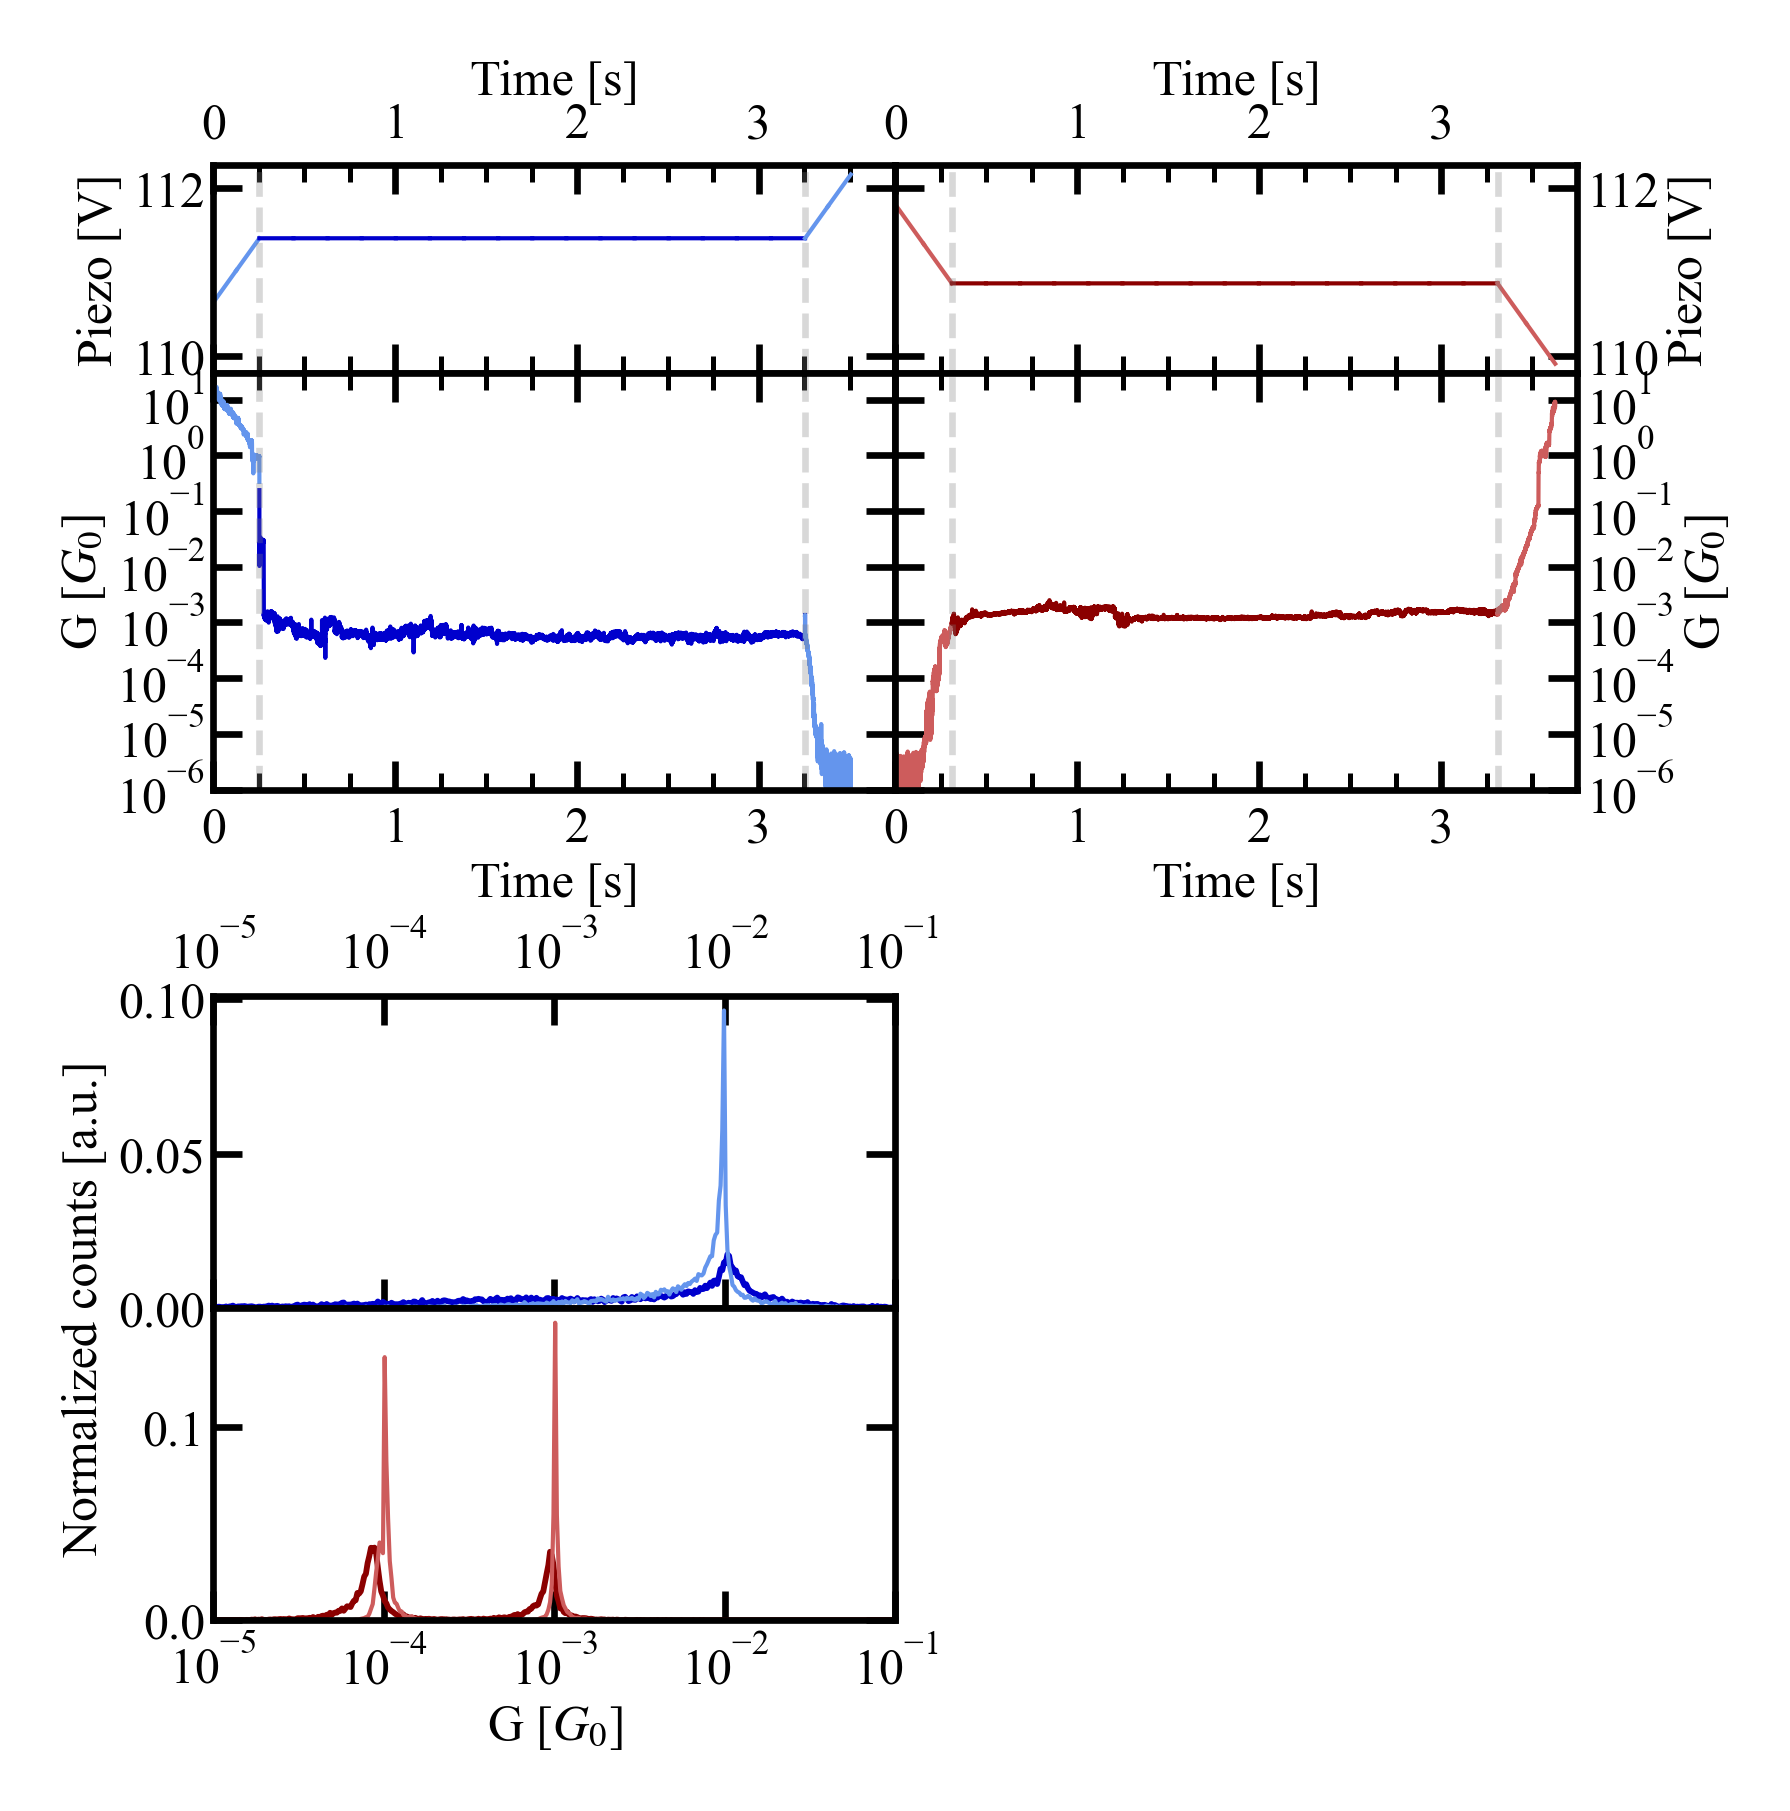

In [289]:
fig = plt.figure(figsize=utils.cm2inch(7.7, 7.7), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 1),
                           figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0.2, hspace=0.33)

gs_top = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, height_ratios=(1, 2),
                                          subplot_spec=gs_total[0],
                                          wspace=0, hspace=0)

gs_bottom = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, height_ratios=(1, 1),
                                             subplot_spec=gs_total[1],
                                             wspace=0, hspace=0)


ax_piezo_pull = fig.add_subplot(gs_top[0, 0])
ax_piezo_push = fig.add_subplot(gs_top[0, 1], sharey=ax_piezo_pull)
ax_cond_pull = fig.add_subplot(gs_top[1, 0], sharex=ax_piezo_pull)
ax_cond_push = fig.add_subplot(gs_top[1, 1], sharey=ax_cond_pull, sharex=ax_piezo_push)

ax_pull_hist = fig.add_subplot(gs_bottom[0, 0])
ax_push_hist = fig.add_subplot(gs_bottom[1, 0], sharex=ax_pull_hist)

ax_piezo_pull, ax_cond_pull = plots.plot_measurement_scheme_combed(trace_pair=trace_pair, hold_trace=hold_trace, home_folder=home_folder, smoothing=10,
                                                                   direction='pull',
                                                                   main_colors=('cornflowerblue', 'indianred'),
                                                                   accent_colors=('mediumblue', 'darkred'),
                                                                   add_vlines_for_hold=True,
                                                                   save_fig=False,
                                                                   to_axes = (ax_piezo_pull, ax_cond_pull))

ax_piezo_push, ax_cond_push = plots.plot_measurement_scheme_combed(trace_pair=trace_pair, hold_trace=hold_trace, home_folder=home_folder, smoothing=10,
                                                                   direction='push',
                                                                   main_colors=('cornflowerblue', 'indianred'),
                                                                   accent_colors=('mediumblue', 'darkred'),
                                                                   add_vlines_for_hold=True,
                                                                   save_fig=False,
                                                                   to_axes = (ax_piezo_push, ax_cond_push))


ax_piezo_push.yaxis.set_label_position('right')
ax_piezo_push.yaxis.tick_right()
ax_piezo_push.yaxis.set_ticks_position('both')

ax_cond_push.yaxis.set_label_position('right')
ax_cond_push.yaxis.tick_right()
ax_cond_push.yaxis.set_ticks_position('both')

ax_piezo_pull.set_xticks(np.arange(0, 4, 1), minor=False)
ax_piezo_push.set_xticks(np.arange(0, 4, 1), minor=False)
# ax_cond_pull.set_xticks(np.arange(0.5, 4, 0.5), minor=False)
# ax_cond_push.set_xticks(np.arange(0.5, 4, 0.5), minor=False)

ax_piezo_pull.set_xticks(np.arange(0.25, 4, 0.25), minor=True, alpha=0.5)
ax_piezo_push.set_xticks(np.arange(0.25, 4, 0.25), minor=True, alpha=0.5)
# ax_cond_pull.set_xticks(np.arange(0.25, 3.9, 0.25), minor=True, alpha=0.5)
# ax_cond_push.set_xticks(np.arange(0.25, 3.9, 0.25), minor=True, alpha=0.5)

ax_cond_pull.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
# ax_cond_pull.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.2), numticks=9))

ax_pull_hist.set_xscale('log')
ax_push_hist.set_xscale('log')

ax_pull_hist.yaxis.set_ticks_position('both')
ax_push_hist.yaxis.set_ticks_position('both')

# ax_pull_hist.xaxis.set_label_position('top')
ax_pull_hist.xaxis.tick_top()
ax_pull_hist.xaxis.set_ticks_position('both')

ax_pull_hist.plot(hold_bins_pull, hold_single_hist_pull/len(conductance_stat_pull['G_hold']), c='mediumblue', lw=0.7)
ax_push_hist.plot(hold_bins_push, hold_single_hist_push/len(conductance_stat_push['G_hold']), c='darkred', lw=0.7)

# ax_pull_hist.fill_between(hold_bins_pull, np.zeros_like(hold_bins_pull), hold_single_hist_pull/len(conductance_stat_pull['G_hold']), color='mediumblue', lw=0.7, alpha=0.5)
# ax_push_hist.fill_between(hold_bins_push, np.zeros_like(hold_bins_push), hold_single_hist_push/len(conductance_stat_push['G_hold']), color='darkred', lw=0.7, alpha=0.5)

ax_pull_hist.plot(stop_bins_pull, stop_single_hist_pull/len(conductance_stat_pull['G_stop']), c='cornflowerblue', lw=0.5)
ax_push_hist.plot(stop_bins_push, stop_single_hist_push/len(conductance_stat_push['G_stop']), c='indianred', lw=0.5)

ax_pull_hist.set_xlim(1e-5, 1e-1)
ax_pull_hist.set_ylim(0)
ax_push_hist.set_ylim(0)

ax_cond_pull.set_ylabel(r'G [$G_{0}$]')
ax_cond_push.set_ylabel(r'G [$G_{0}$]')

ax_cond_pull.set_ylim(1e-6, 30)
# ax_push_hist.set_ylim(0)

# ax_pull_hist.set_ylabel('Normalized counts (a.u.)')
ax_pull_hist.set_xlabel(r'G [$G_{0}$]')
# ax_push_hist.set_ylabel('Normalized counts (a.u.)')
ax_push_hist.set_xlabel(r'G [$G_{0}$]')

ax_pull_hist.text(1.3e-6, 0, 'Normalized counts [a.u.]', rotation='vertical', va='center', size=6)
ax_pull_hist.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))

plt.savefig(home_folder.joinpath(f'results/article/fig_1.svg'), bbox_inches='tight')

In [14]:
conductance_stat_pull = pd.read_csv(home_folder.joinpath("results/conductance_stats_pull_1.csv"), skiprows=[1])
conductance_stat_push = pd.read_csv(home_folder.joinpath("results/conductance_stats_push_1.csv"), skiprows=[1])
noise_stat_pull = pd.read_csv(home_folder.joinpath("results/noise_stats_pull_1.csv"), skiprows=[1])
noise_stat_push = pd.read_csv(home_folder.joinpath("results/noise_stats_push_1.csv"), skiprows=[1])

In [15]:
conductance_stat_pull['trace_index']=conductance_stat_pull['trace_index'].astype(int)
conductance_stat_push['trace_index']=conductance_stat_push['trace_index'].astype(int)

In [16]:
conductance_stat_pull.columns[2:]

Index(['G_stop', 'G_hold', 'G_avg', 'G_avgs_1', 'G_avgs_2', 'G_avgs_3',
       'G_avgs_4', 'G_avgs_5', 'G_avgs_6', 'G_avgs_7', 'G_avgs_8', 'G_avgs_9',
       'G_avgs_10', 'G_avgs_11', 'G_avgs_12', 'G_avgs_13', 'G_avgs_14',
       'G_avgs_15', 'G_avgs_16', 'G_avgs_17', 'G_avgs_18', 'G_avgs_19',
       'G_avgs_20', 'G_avgs_21', 'G_avgs_22', 'G_avgs_23', 'G_avgs_24',
       'G_avgs_25'],
      dtype='object')

In [17]:
conductance_stat_pull.where(conductance_stat_pull.loc[:, conductance_stat_pull.columns[2:]] > 1e-5, inplace=True)
conductance_stat_pull = conductance_stat_pull.dropna(how='any')
conductance_stat_push.where(conductance_stat_push.loc[:, conductance_stat_push.columns[2:]] > 1e-5, inplace=True)
conductance_stat_push = conductance_stat_push.dropna(how='any')

noise_stat_pull_above = noise_stat_pull.loc[conductance_stat_pull.index.array.to_numpy()]
noise_stat_push_above = noise_stat_push.loc[conductance_stat_push.index.array.to_numpy()]

In [18]:
noise_stat_pull_filt = noise_stat_pull_above[:][abs(np.log10(conductance_stat_pull['G_avgs_2'] / conductance_stat_pull['G_avgs_25'])) < np.log10(2)]
noise_stat_push_filt = noise_stat_push_above[:][abs(np.log10(conductance_stat_push['G_avgs_2'] / conductance_stat_push['G_avgs_25'])) < np.log10(2)]

In [19]:
pull_traces = noise_stat_pull_filt['trace_index'].to_numpy()
push_traces = noise_stat_push_filt['trace_index'].to_numpy()

in_both = np.intersect1d(pull_traces, push_traces)

In [20]:
def plot_scheme():
    fig = plt.figure(figsize=utils.cm2inch(12, 4), dpi=600)  # figsize: (width, height) in inches

    gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=(1, 2),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0, hspace=0)


    smoothing = 10
    main_colors = ('cornflowerblue', 'indianred')
    accent_colors = ('mediumblue', 'darkred')
    ylim = (1e-6, 10)

    ax_piezo_pull = fig.add_subplot(gs[0, 0])
    ax_piezo_push = fig.add_subplot(gs[0, 1], sharey=ax_piezo_pull)
    ax_cond_pull = fig.add_subplot(gs[1, 0], sharex=ax_piezo_pull)
    ax_cond_push = fig.add_subplot(gs[1, 1], sharey=ax_cond_pull, sharex=ax_piezo_push)


    #PULL
    cond_before_pull = trace_pair.conductance_pull[np.nonzero(trace_pair.conductance_pull < 10)[0][0]:
                                              trace_pair.hold_index_pull]
    cond_hold_pull = hold_trace.hold_conductance_pull
    cond_after_pull = trace_pair.conductance_pull[trace_pair.hold_index_pull:
                                             np.nonzero(trace_pair.conductance_pull < 1e-5)[0][0] + 10_000]

    piezo_before_pull = trace_pair.piezo_pull[np.nonzero(trace_pair.conductance_pull < 10)[0][0]:
                                         trace_pair.hold_index_pull]
    piezo_hold_pull = np.ones_like(cond_hold_pull) * piezo_before_pull[-1]
    piezo_after_pull = trace_pair.piezo_pull[trace_pair.hold_index_pull:
                                        np.nonzero(trace_pair.conductance_pull < 1e-5)[0][0] + 10_000]
    color_num = 0
    #PUSH
    cond_before_push = trace_pair.conductance_push[np.nonzero(trace_pair.piezo_push > piezo_after_pull[-1])[0][-1]:
                                              trace_pair.hold_index_push]
    cond_hold_push = hold_trace.hold_conductance_push
    cond_after_push = trace_pair.conductance_push[trace_pair.hold_index_push:
                                             np.nonzero(trace_pair.conductance_push > 10)[0][0]]

    piezo_before_push = trace_pair.piezo_push[np.nonzero(trace_pair.piezo_push > piezo_after_pull[-1])[0][-1]:
                                         trace_pair.hold_index_push]
    piezo_hold_push = np.ones_like(cond_hold_push) * piezo_before_push[-1]
    piezo_after_push = trace_pair.piezo_push[trace_pair.hold_index_push:
                                        np.nonzero(trace_pair.conductance_push > 10)[0][0]]
    color_num = 1

    time_before_pull = np.arange(start=0, stop=len(cond_before_pull), step=1)
    time_hold_pull = np.arange(start=time_before_pull[-1] + 1, stop=time_before_pull[-1] + len(cond_hold_pull) + 1, step=1)
    time_after_pull = np.arange(start=time_hold_pull[-1] + 1, stop=time_hold_pull[-1] + len(cond_after_pull) + 1, step=1)

    time_before_push = np.arange(start=time_after_pull[-1], stop=time_after_pull[-1] + len(cond_before_push), step=1)
    time_hold_push = np.arange(start=time_before_push[-1] + 1, stop=time_before_push[-1] + len(cond_hold_push) + 1, step=1)
    time_after_push = np.arange(start=time_hold_push[-1] + 1, stop=time_hold_push[-1] + len(cond_after_push) + 1, step=1)

    time_before_pull = time_before_pull / trace_pair.sample_rate
    time_hold_pull = time_hold_pull / trace_pair.sample_rate
    time_after_pull = time_after_pull / trace_pair.sample_rate

    time_before_push = time_before_push / trace_pair.sample_rate
    time_hold_push = time_hold_push / trace_pair.sample_rate
    time_after_push = time_after_push / trace_pair.sample_rate

    # concatenate individual parts
    time_total_pull = np.concatenate((time_before_pull, time_hold_pull, time_after_pull))
    cond_total_pull = np.concatenate((cond_before_pull, cond_hold_pull, cond_after_pull))
    piezo_total_pull = np.concatenate((piezo_before_pull, piezo_hold_pull, piezo_after_pull))

    time_total_push = np.concatenate((time_before_push, time_hold_push, time_after_push))
    cond_total_push = np.concatenate((cond_before_push, cond_hold_push, cond_after_push))
    piezo_total_push = np.concatenate((piezo_before_push, piezo_hold_push, piezo_after_push))

    dividers_pull = (len(time_before_pull),                   # only need 2 dividers technically
            len(time_before_pull) + len(time_hold_pull))  # (the 3rd would be the last point)

    dividers_push = (len(time_before_push),                   # only need 2 dividers technically
            len(time_before_push) + len(time_hold_push))  # (the 3rd would be the last point)

    time_total_avg_pull = utils.moving_average(time_total_pull, smoothing)
    cond_total_avg_pull = utils.moving_average(cond_total_pull, smoothing)
    piezo_total_avg_pull = utils.moving_average(piezo_total_pull, smoothing)

    time_total_avg_push = utils.moving_average(time_total_push, smoothing)
    cond_total_avg_push = utils.moving_average(cond_total_push, smoothing)
    piezo_total_avg_push = utils.moving_average(piezo_total_push, smoothing)

    # plot the piezo
    #PULL
    ax_piezo_pull.plot(time_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]],
              piezo_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]], c=main_colors[0], lw=0.5)

    ax_piezo_pull.plot(time_total_avg_pull[
               np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
              piezo_total_avg_pull[
               np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
              c=accent_colors[0], lw=0.5)

    ax_piezo_pull.plot(time_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]],
              piezo_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]], c=main_colors[0], lw=0.5)
    #PUSH
    ax_piezo_push.plot(time_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]],
              piezo_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]], c=main_colors[1], lw=0.5)

    ax_piezo_push.plot(time_total_avg_push[
               np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
              piezo_total_avg_push[
               np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
              c=accent_colors[1], lw=0.5)

    ax_piezo_push.plot(time_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]],
              piezo_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]], c=main_colors[1], lw=0.5)

    # plot the conductance
    ax_cond_pull.plot(time_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]],
        cond_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]], c=main_colors[0], lw=0.5)

    ax_cond_pull.plot(time_total_avg_pull[
            np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
        cond_total_avg_pull[
            np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
        c=accent_colors[0], lw=0.5)

    ax_cond_pull.plot(time_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]],
        cond_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]], c=main_colors[0], lw=0.5)
    ax_cond_pull.set_yscale('log')
    ax_cond_pull.set_ylim(ylim)

    ax_cond_push.plot(time_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]],
        cond_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]], c=main_colors[1], lw=0.5)

    ax_cond_push.plot(time_total_avg_push[
            np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
        cond_total_avg_push[
            np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
        c=accent_colors[1], lw=0.5)

    ax_cond_push.plot(time_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]],
        cond_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]], c=main_colors[1], lw=0.5)
    ax_cond_push.set_yscale('log')
    ax_cond_push.set_ylim(ylim)

    ax_piezo_pull.yaxis.set_ticks_position('both')
    ax_piezo_pull.xaxis.set_ticks_position('both')
    ax_piezo_push.xaxis.set_ticks_position('both')

    ax_cond_pull.yaxis.set_ticks_position('both')

    ax_piezo_push.yaxis.set_label_position('right')
    ax_piezo_push.yaxis.tick_right()
    ax_piezo_push.yaxis.set_ticks_position('both')

    ax_cond_push.yaxis.set_label_position('right')
    ax_cond_push.yaxis.tick_right()
    ax_cond_push.yaxis.set_ticks_position('both')

    ax_piezo_pull.set_xticks(np.arange(0, 4, 1), minor=False)
    ax_piezo_push.set_xticks(np.arange(3, 8, 1), minor=False)
    # ax_cond_pull.set_xticks(np.arange(0.5, 4, 0.5), minor=False)
    # ax_cond_push.set_xticks(np.arange(0.5, 4, 0.5), minor=False)

    ax_piezo_pull.set_xticks(np.arange(0.25, 4, 0.25), minor=True, alpha=0.5)
    ax_piezo_push.set_xticks(np.arange(3.25, 8, 0.25), minor=True, alpha=0.5)
    # ax_cond_pull.set_xticks(np.arange(0.25, 3.9, 0.25), minor=True, alpha=0.5)
    # ax_cond_push.set_xticks(np.arange(0.25, 3.9, 0.25), minor=True, alpha=0.5)

    ax_cond_pull.set_ylabel(r'G [$G_{0}$]')
    ax_cond_push.set_ylabel(r'G [$G_{0}$]')

    ax_piezo_pull.set_ylabel(r'Piezo [V]')
    ax_piezo_push.set_ylabel(r'Piezo [V]')

    ax_cond_pull.set_ylim(1e-6, 30)
    # ax_push_hist.set_ylim(0)

    ax_cond_pull.tick_params(axis='y', which='minor', left=False, right=False)
    ax_cond_push.tick_params(axis='y', which='minor', left=False, right=False)

    ax_piezo_pull.set_xlim(time_total_pull[0], time_total_pull[-1])
    ax_piezo_push.set_xlim(time_total_push[0], time_total_push[-1])

    ax_cond_pull.text(time_after_pull[-1], 1e-7, 'Time [s]', va='top', ha='center', size=6)
    ax_piezo_pull.text(time_after_pull[-1], max(piezo_total_pull)+0.3, 'Time [s]', va='bottom', ha='center', size=6)
    
#     # Create a set of inset Axes: these should fill the bounding box allocated to
#     # them.
#     ax_psd_pull = plt.axes([0,0,1,1])
#     # Manually set the position and relative size of the inset axes within ax1
#     ip_pull = InsetPosition(ax_cond_pull, [0.4,0.5,0.5,0.4])
#     ax_psd_pull.set_axes_locator(ip_pull)
#     ax_psd_pull.plot(hold_trace.fft_freqs_pull, hold_trace.psds_pull[0], c=accent_colors[0], lw=0.5)
#     ax_psd_pull.set_xscale('log')
#     ax_psd_pull.set_yscale('log')
#     ax_psd_pull.set_xlabel('$f$ [Hz]')
#     ax_psd_pull.set_ylabel('PSD')
    
#     ax_psd_push = plt.axes([0,0,1,1])
#     # Manually set the position and relative size of the inset axes within ax1
#     ip_push = InsetPosition(ax_cond_push, [0.1,0.5,0.5,0.4])
#     ax_psd_push.set_axes_locator(ip_push)
#     ax_psd_push.plot(hold_trace.fft_freqs_push, hold_trace.psds_push[0], c=accent_colors[1], lw=0.5)
#     ax_psd_push.set_xscale('log')
#     ax_psd_push.set_yscale('log')
#     ax_psd_push.set_xlabel('$f$ [Hz]')
#     ax_psd_push.set_ylabel('PSD')
    
#     ax_psd_pull.xaxis.set_ticks_position('both')
#     ax_psd_push.xaxis.set_ticks_position('both')

#     ax_psd_pull.yaxis.set_ticks_position('both')

#     ax_psd_push.yaxis.set_label_position('right')
#     ax_psd_push.yaxis.tick_right()
#     ax_psd_push.yaxis.set_ticks_position('both')
    
#     for i in hold_trace.psd_interval_ranges_pull[0]:
#         ax_cond_pull.axvline(time_before_pull[-1] + i/50_000, ymin=0.2, ymax=0.4, c='grey', alpha=0.5, lw=0.5, ls='--')
        
#     plt.tight_layout()
#     plt.savefig(home_folder.joinpath(f'results/article/measurement_scheme_{which_trace}.png'))

In [45]:
# which_trace = np.random.choice(in_both)
which_trace=16245
# which_trace=8815
print(which_trace)

hold_trace = HoldTrace(which_trace, load_from=home_folder, bias_offset=0,
                       r_serial_ohm=100_000, min_step_len=20_000, min_height=1)
trace_pair = TracePair(f'trace_{which_trace}', load_from=home_folder)
hold_trace.analyse_hold_trace(num_of_fft=5)

16245


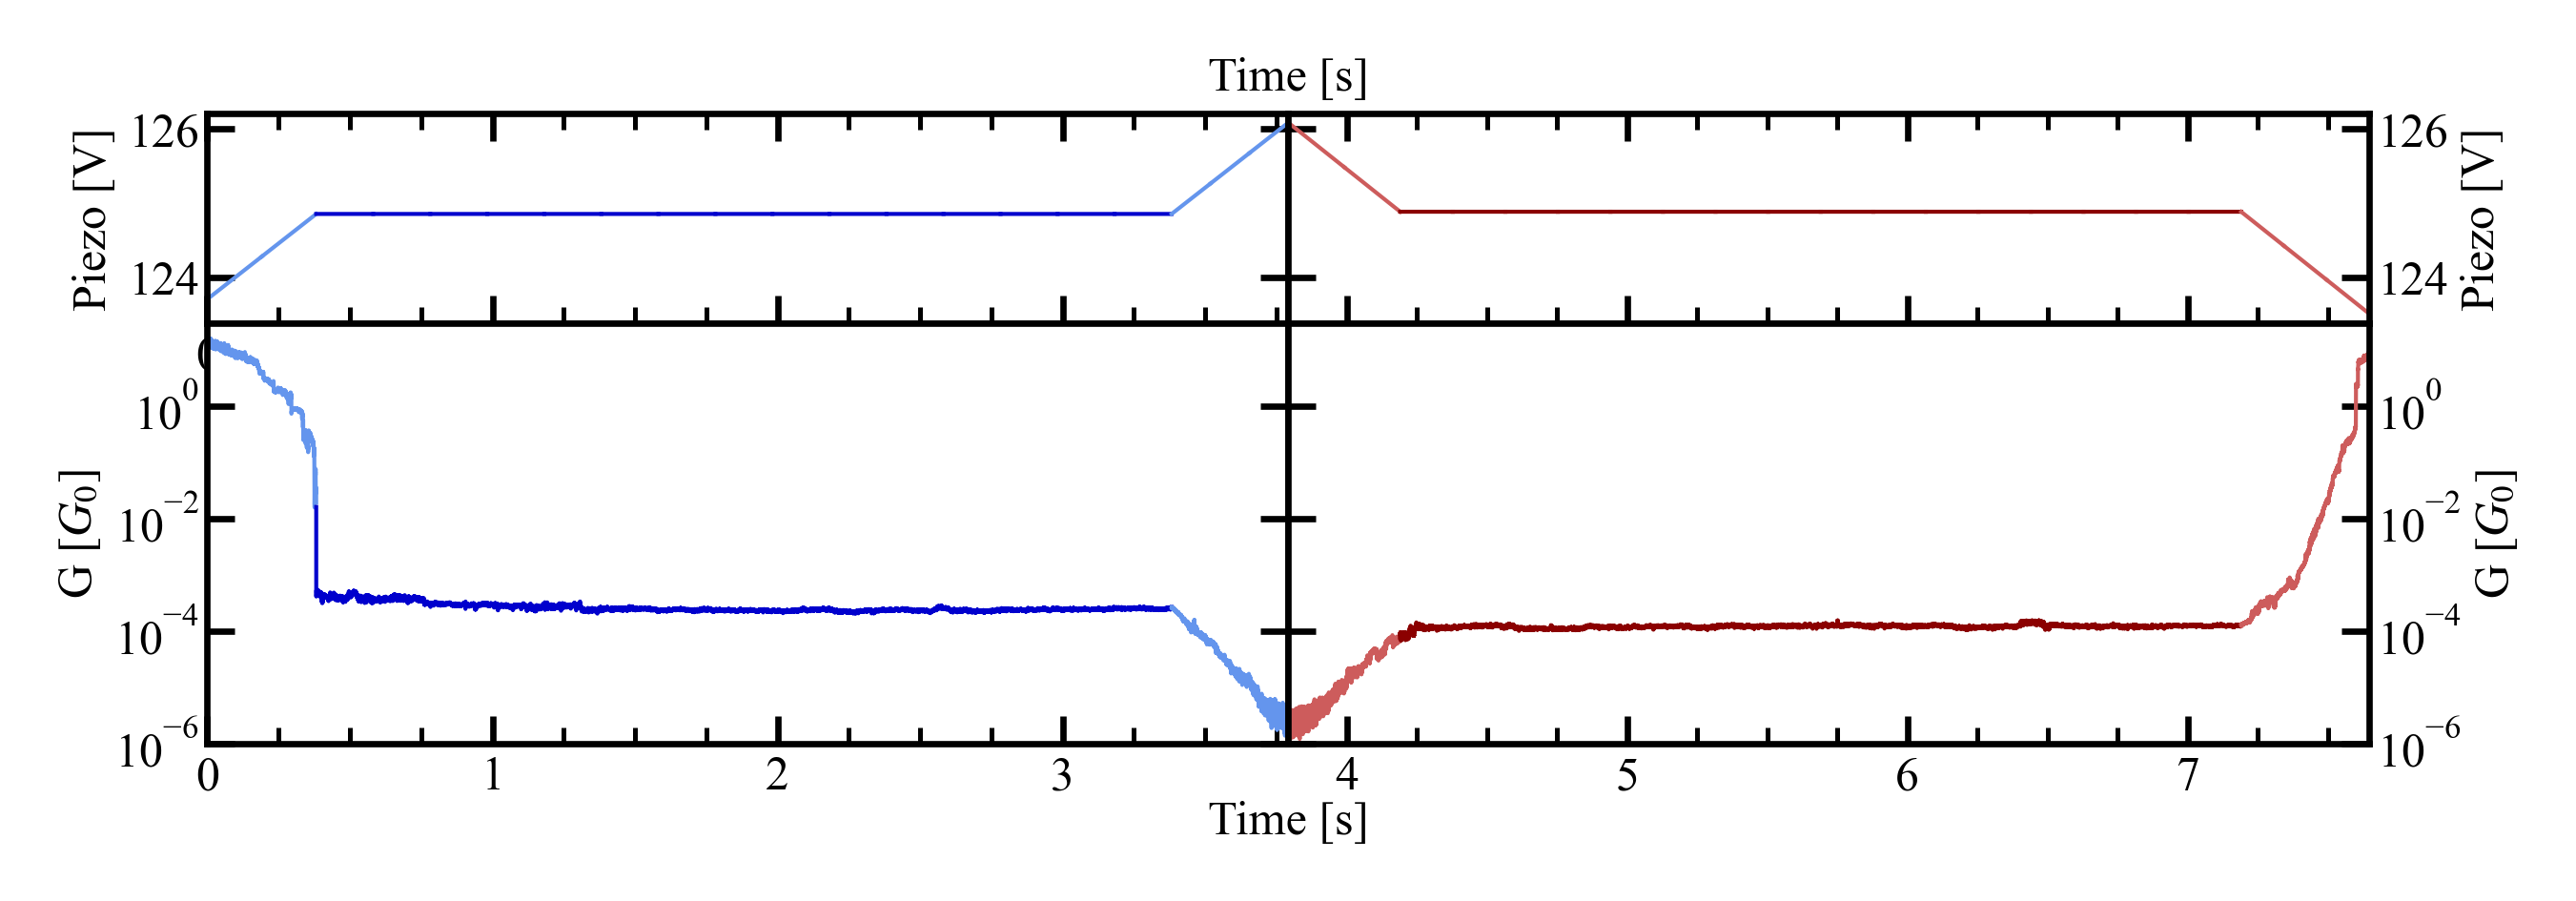

In [22]:
plot_scheme()

In [23]:
len(in_both)

1205

In [24]:
conductance_stat_pull.head()

trace_index  G_set    G_stop    G_hold         G_avg  G_avgs_1  G_avgs_2  \
0       8001.0   0.01  0.007683  0.003697  6.178841e-06  0.003697  0.001909   
1       8002.0   0.01  0.010172  0.013590  5.689503e-07  0.013590  0.000003   
2       8003.0   0.01  0.002130  0.000024  3.525392e-07  0.000024  0.000004   
3       8004.0   0.01  0.002607  0.000033  1.738074e-06  0.000033  0.000034   
4       8005.0   0.01  0.009085  0.009602  1.768714e-06  0.009602  0.006442   

       G_avgs_3      G_avgs_4      G_avgs_5  ...     G_avgs_16     G_avgs_17  \
0  4.243688e-05  7.507073e-05  1.016793e-04  ...  3.671386e-05  7.491817e-06   
1  3.798441e-07  4.861287e-07  3.365071e-07  ...  2.062932e-07  3.150865e-07   
2  7.648657e-07  2.129393e-06  9.518249e-07  ...  6.812380e-07  3.790015e-07   
3  2.155516e-05  1.210658e-05  1.137582e-05  ...  2.736410e-06  2.079726e-06   
4  1.036186e-02  9.595647e-03  8.931681e-03  ...  1.907414e-06  2.829021e-06   

      G_avgs_18     G_avgs_19     G_avgs_20     G_avgs_21     G_avgs_22  \
0  1.614632e-05  1.281724e-05  1.238165e-05  1.063657e-05  9.592733e-06   
1  2.717450e-07 -4.369999e-08  1.929433e-07  3.776240e-07  3.190076e-07   
2  4.577195e-07  2.781628e-07  3.347233e-07  5.605888e-07  8.444890e-07   
3  3.961939e-06  2.843415e-06  9.057537e-06  9.490890e-06  3.974238e-06   
4  2.818837e-06  3.947030e-06  1.676657e-06  2.096873e-06  2.073547e-06   

      G_avgs_23     G_avgs_24     G_avgs_25  
0  1.068418e-05  1.112620e-05  6.018414e-06  
1  1.361217e-06  2.422319e-07  5.428719e-07  
2  4.513566e-07  7.593155e-07  3.335956e-07  
3  1.024432e-05  1.018128e-06  1.820744e-06  
4  1.449347e-06  2.158178e-06  1.823086e-06  

[5 rows x 30 columns]

In [26]:
stop_bins_pull, stop_single_hist_pull = utils.calc_hist_1d_single(data=conductance_stat_pull['G_stop'],
                                                        xrange=(1e-5, 1e-1),
                                                        xbins_num=100,
                                                        log_scale=True)

stop_bins_push, stop_single_hist_push = utils.calc_hist_1d_single(data=conductance_stat_push['G_stop'],
                                                        xrange=(1e-5, 1e-1),
                                                        xbins_num=100,
                                                        log_scale=True)

hold_bins_pull, hold_single_hist_pull = utils.calc_hist_1d_single(data=conductance_stat_pull['G_hold'],
                                                        xrange=(1e-5, 1e-1),
                                                        xbins_num=100,
                                                        log_scale=True)

hold_bins_push, hold_single_hist_push = utils.calc_hist_1d_single(data=conductance_stat_push['G_hold'],
                                                        xrange=(1e-5, 1e-1),
                                                        xbins_num=100,
                                                        log_scale=True)

avgs_bins_pull, avgs_single_hist_pull = utils.calc_hist_1d_single(data=conductance_stat_pull['G_avg'],
                                                        xrange=(1e-5, 1e-1),
                                                        xbins_num=100,
                                                        log_scale=True)

avgs_bins_push, avgs_single_hist_push = utils.calc_hist_1d_single(data=conductance_stat_push['G_avg'],
                                                        xrange=(1e-5, 1e-1),
                                                        xbins_num=100,
                                                        log_scale=True)

Text(0.95, 0.5, 'G_avgs')

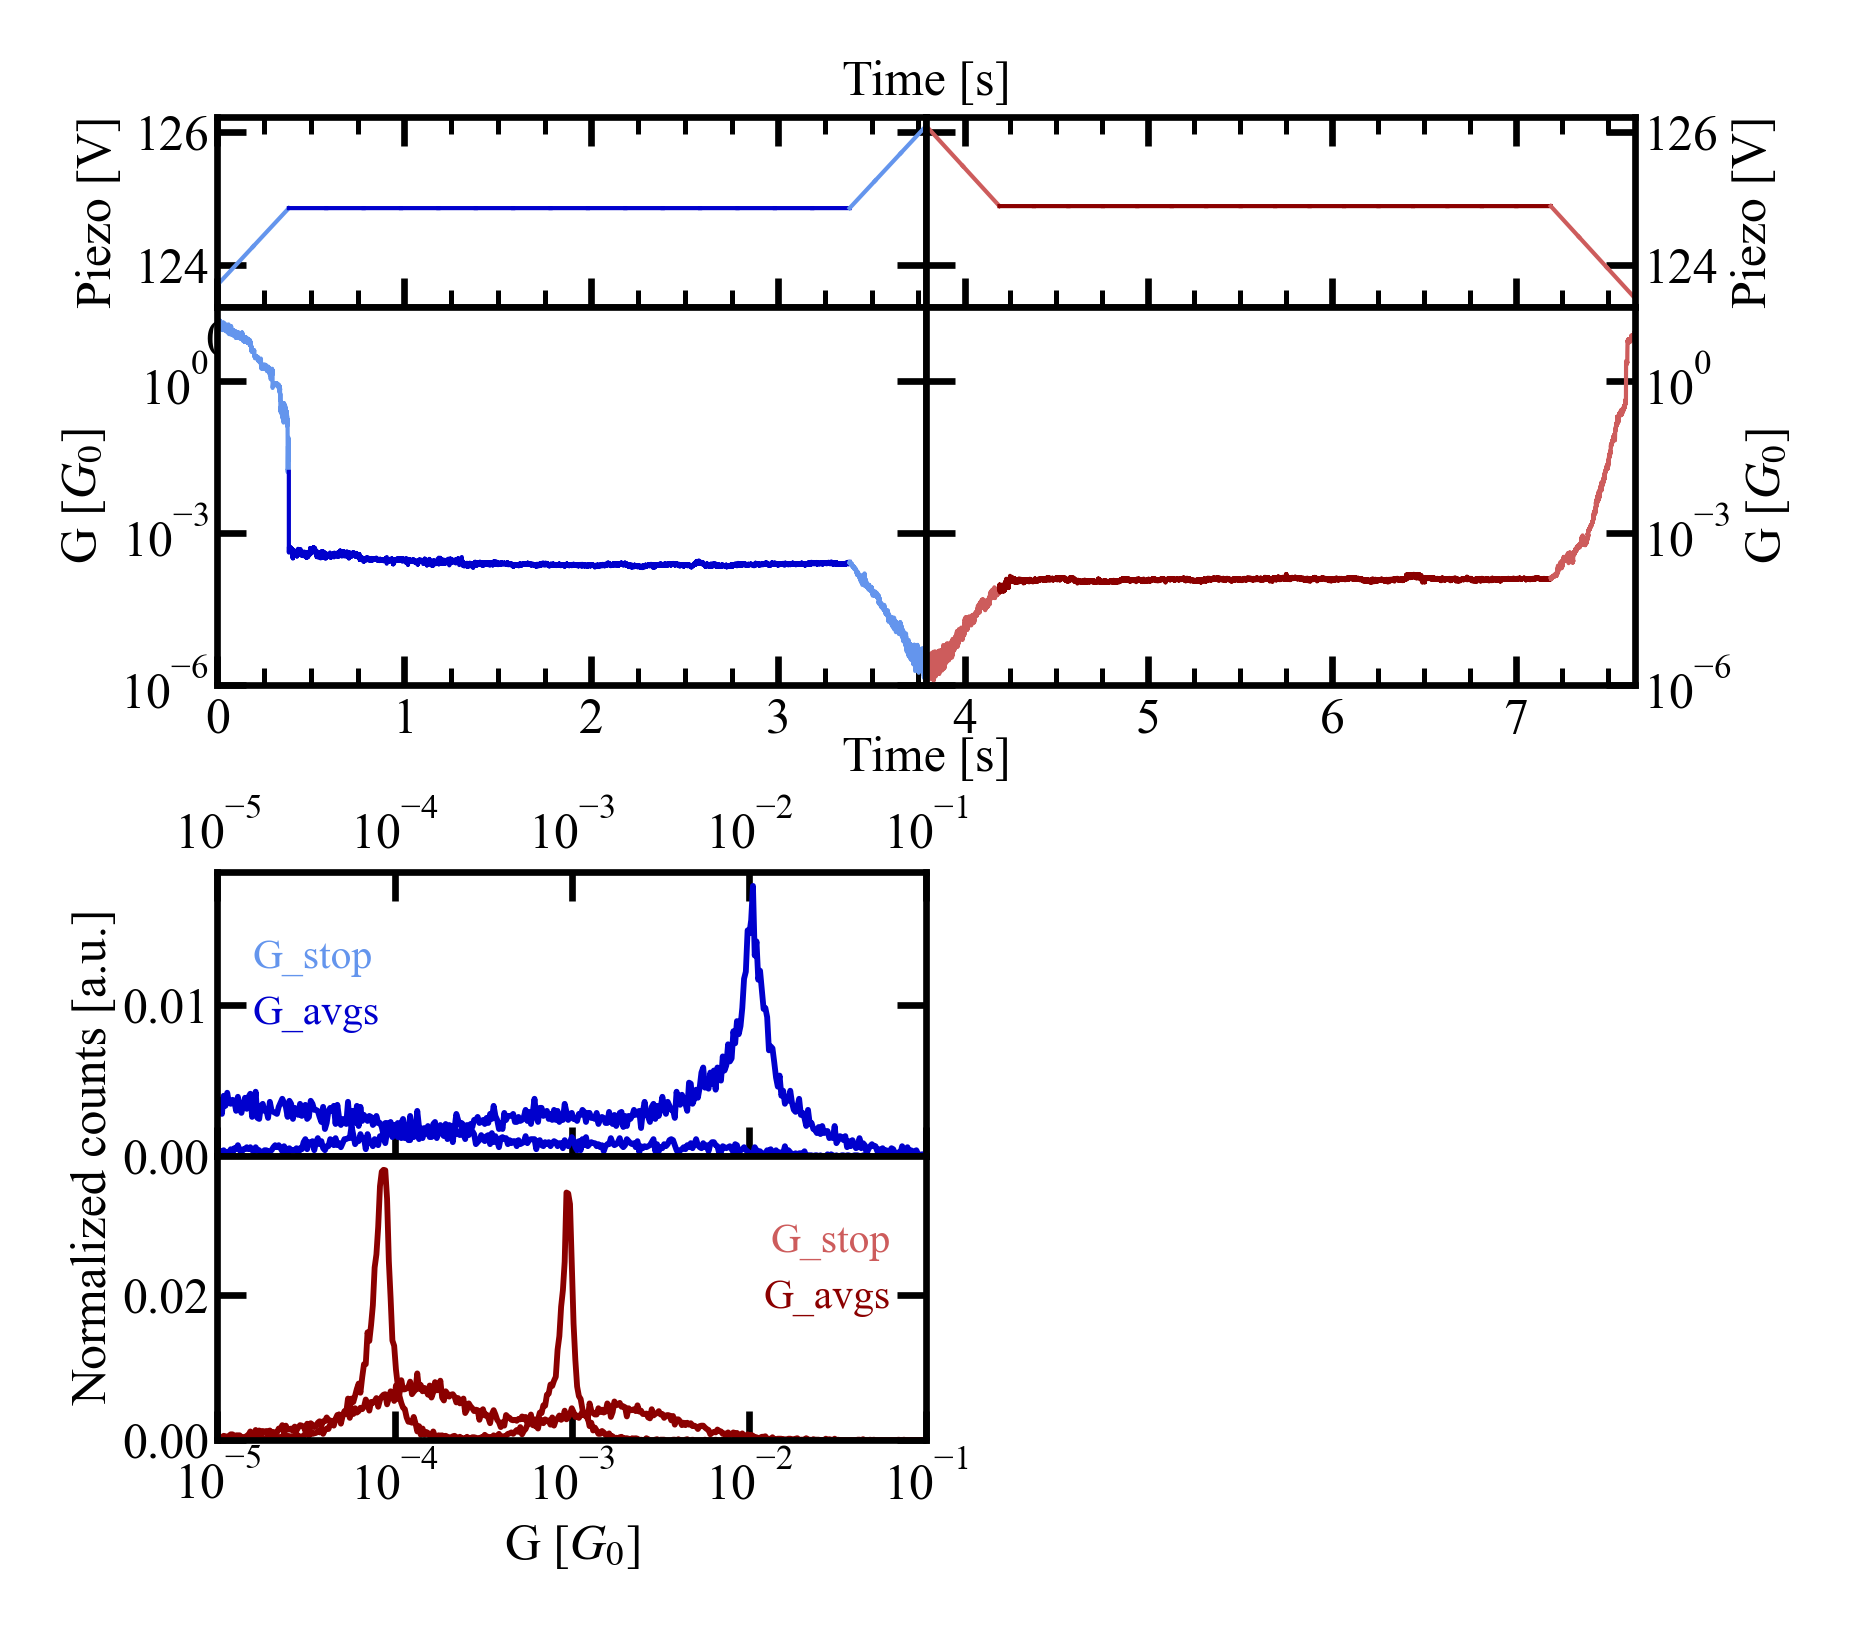

In [32]:
fig = plt.figure(figsize=utils.cm2inch(7.5, 8), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 1),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.2, hspace=0.33)

gs_top = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, height_ratios=(1, 2),
                                          subplot_spec=gs_total[0],
                                          wspace=0, hspace=0)

gs_bottom = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, height_ratios=(1, 1),
                                             subplot_spec=gs_total[1],
                                             wspace=0, hspace=0)


smoothing = 10
main_colors = ('cornflowerblue', 'indianred')
accent_colors = ('mediumblue', 'darkred')
ylim = (1e-6, 10)

ax_piezo_pull = fig.add_subplot(gs_top[0, 0])
ax_piezo_push = fig.add_subplot(gs_top[0, 1], sharey=ax_piezo_pull)
ax_cond_pull = fig.add_subplot(gs_top[1, 0], sharex=ax_piezo_pull)
ax_cond_push = fig.add_subplot(gs_top[1, 1], sharey=ax_cond_pull, sharex=ax_piezo_push)

ax_pull_hist = fig.add_subplot(gs_bottom[0, 0])
ax_push_hist = fig.add_subplot(gs_bottom[1, 0], sharex=ax_pull_hist)


#PULL
cond_before_pull = trace_pair.conductance_pull[np.nonzero(trace_pair.conductance_pull < 10)[0][0]:
                                          trace_pair.hold_index_pull]
cond_hold_pull = hold_trace.hold_conductance_pull
cond_after_pull = trace_pair.conductance_pull[trace_pair.hold_index_pull:
                                         np.nonzero(trace_pair.conductance_pull < 1e-5)[0][0] + 10_000]

piezo_before_pull = trace_pair.piezo_pull[np.nonzero(trace_pair.conductance_pull < 10)[0][0]:
                                     trace_pair.hold_index_pull]
piezo_hold_pull = np.ones_like(cond_hold_pull) * piezo_before_pull[-1]
piezo_after_pull = trace_pair.piezo_pull[trace_pair.hold_index_pull:
                                    np.nonzero(trace_pair.conductance_pull < 1e-5)[0][0] + 10_000]
color_num = 0
#PUSH
cond_before_push = trace_pair.conductance_push[np.nonzero(trace_pair.piezo_push > piezo_after_pull[-1])[0][-1]:
                                          trace_pair.hold_index_push]
cond_hold_push = hold_trace.hold_conductance_push
cond_after_push = trace_pair.conductance_push[trace_pair.hold_index_push:
                                         np.nonzero(trace_pair.conductance_push > 10)[0][0]]

piezo_before_push = trace_pair.piezo_push[np.nonzero(trace_pair.piezo_push > piezo_after_pull[-1])[0][-1]:
                                     trace_pair.hold_index_push]
piezo_hold_push = np.ones_like(cond_hold_push) * piezo_before_push[-1]
piezo_after_push = trace_pair.piezo_push[trace_pair.hold_index_push:
                                    np.nonzero(trace_pair.conductance_push > 10)[0][0]]
color_num = 1

time_before_pull = np.arange(start=0, stop=len(cond_before_pull), step=1)
time_hold_pull = np.arange(start=time_before_pull[-1] + 1, stop=time_before_pull[-1] + len(cond_hold_pull) + 1, step=1)
time_after_pull = np.arange(start=time_hold_pull[-1] + 1, stop=time_hold_pull[-1] + len(cond_after_pull) + 1, step=1)

time_before_push = np.arange(start=time_after_pull[-1], stop=time_after_pull[-1] + len(cond_before_push), step=1)
time_hold_push = np.arange(start=time_before_push[-1] + 1, stop=time_before_push[-1] + len(cond_hold_push) + 1, step=1)
time_after_push = np.arange(start=time_hold_push[-1] + 1, stop=time_hold_push[-1] + len(cond_after_push) + 1, step=1)

time_before_pull = time_before_pull / trace_pair.sample_rate
time_hold_pull = time_hold_pull / trace_pair.sample_rate
time_after_pull = time_after_pull / trace_pair.sample_rate

time_before_push = time_before_push / trace_pair.sample_rate
time_hold_push = time_hold_push / trace_pair.sample_rate
time_after_push = time_after_push / trace_pair.sample_rate

# concatenate individual parts
time_total_pull = np.concatenate((time_before_pull, time_hold_pull, time_after_pull))
cond_total_pull = np.concatenate((cond_before_pull, cond_hold_pull, cond_after_pull))
piezo_total_pull = np.concatenate((piezo_before_pull, piezo_hold_pull, piezo_after_pull))

time_total_push = np.concatenate((time_before_push, time_hold_push, time_after_push))
cond_total_push = np.concatenate((cond_before_push, cond_hold_push, cond_after_push))
piezo_total_push = np.concatenate((piezo_before_push, piezo_hold_push, piezo_after_push))

dividers_pull = (len(time_before_pull),                   # only need 2 dividers technically
        len(time_before_pull) + len(time_hold_pull))  # (the 3rd would be the last point)

dividers_push = (len(time_before_push),                   # only need 2 dividers technically
        len(time_before_push) + len(time_hold_push))  # (the 3rd would be the last point)

time_total_avg_pull = utils.moving_average(time_total_pull, smoothing)
cond_total_avg_pull = utils.moving_average(cond_total_pull, smoothing)
piezo_total_avg_pull = utils.moving_average(piezo_total_pull, smoothing)

time_total_avg_push = utils.moving_average(time_total_push, smoothing)
cond_total_avg_push = utils.moving_average(cond_total_push, smoothing)
piezo_total_avg_push = utils.moving_average(piezo_total_push, smoothing)

# plot the piezo
#PULL
ax_piezo_pull.plot(time_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]],
          piezo_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]], c=main_colors[0], lw=0.5)

ax_piezo_pull.plot(time_total_avg_pull[
           np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
          piezo_total_avg_pull[
           np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
          c=accent_colors[0], lw=0.5)

ax_piezo_pull.plot(time_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]],
          piezo_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]], c=main_colors[0], lw=0.5)
#PUSH
ax_piezo_push.plot(time_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]],
          piezo_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]], c=main_colors[1], lw=0.5)

ax_piezo_push.plot(time_total_avg_push[
           np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
          piezo_total_avg_push[
           np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
          c=accent_colors[1], lw=0.5)

ax_piezo_push.plot(time_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]],
          piezo_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]], c=main_colors[1], lw=0.5)

# plot the conductance
ax_cond_pull.plot(time_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]],
    cond_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]], c=main_colors[0], lw=0.5)

ax_cond_pull.plot(time_total_avg_pull[
        np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
    cond_total_avg_pull[
        np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
    c=accent_colors[0], lw=0.5)

ax_cond_pull.plot(time_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]],
    cond_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]], c=main_colors[0], lw=0.5)
ax_cond_pull.set_yscale('log')
ax_cond_pull.set_ylim(ylim)

ax_cond_push.plot(time_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]],
    cond_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]], c=main_colors[1], lw=0.5)

ax_cond_push.plot(time_total_avg_push[
        np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
    cond_total_avg_push[
        np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
    c=accent_colors[1], lw=0.5)

ax_cond_push.plot(time_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]],
    cond_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]], c=main_colors[1], lw=0.5)
ax_cond_push.set_yscale('log')
ax_cond_push.set_ylim(ylim)

ax_piezo_pull.yaxis.set_ticks_position('both')
ax_piezo_pull.xaxis.set_ticks_position('both')
ax_piezo_push.xaxis.set_ticks_position('both')

ax_cond_pull.yaxis.set_ticks_position('both')

ax_piezo_push.yaxis.set_label_position('right')
ax_piezo_push.yaxis.tick_right()
ax_piezo_push.yaxis.set_ticks_position('both')

ax_cond_push.yaxis.set_label_position('right')
ax_cond_push.yaxis.tick_right()
ax_cond_push.yaxis.set_ticks_position('both')

ax_piezo_pull.set_xticks(np.arange(0, 4, 1), minor=False)
ax_piezo_push.set_xticks(np.arange(3, 8, 1), minor=False)

ax_piezo_pull.set_xticks(np.arange(0.25, 4, 0.25), minor=True, alpha=0.5)
ax_piezo_push.set_xticks(np.arange(3.25, 8, 0.25), minor=True, alpha=0.5)

ax_cond_pull.set_ylabel(r'G [$G_{0}$]')
ax_cond_push.set_ylabel(r'G [$G_{0}$]')

ax_piezo_pull.set_ylabel(r'Piezo [V]')
ax_piezo_push.set_ylabel(r'Piezo [V]')

ax_cond_pull.set_ylim(1e-6, 30)
# ax_push_hist.set_ylim(0)

ax_cond_pull.tick_params(axis='y', which='minor', left=False, right=False)
ax_cond_push.tick_params(axis='y', which='minor', left=False, right=False)

ax_piezo_pull.set_xlim(time_total_pull[0], time_total_pull[-1])
ax_piezo_push.set_xlim(time_total_push[0], time_total_push[-1])

ax_cond_pull.text(time_after_pull[-1], 1e-7, 'Time [s]', va='top', ha='center', size=6)
ax_piezo_pull.text(time_after_pull[-1], max(piezo_total_pull)+0.3, 'Time [s]', va='bottom', ha='center', size=6)

ax_pull_hist.set_xscale('log')
ax_push_hist.set_xscale('log')

ax_pull_hist.yaxis.set_ticks_position('both')
ax_push_hist.yaxis.set_ticks_position('both')

# ax_pull_hist.xaxis.set_label_position('top')
ax_pull_hist.xaxis.tick_top()
ax_pull_hist.xaxis.set_ticks_position('both')

ax_pull_hist.plot(hold_bins_pull, hold_single_hist_pull/len(conductance_stat_pull['G_hold']), c='mediumblue', lw=0.7)
ax_push_hist.plot(hold_bins_push, hold_single_hist_push/len(conductance_stat_push['G_hold']), c='darkred', lw=0.7)

ax_pull_hist.plot(avgs_bins_pull, avgs_single_hist_pull/len(conductance_stat_pull['G_avg']), c='mediumblue', lw=0.7)
ax_push_hist.plot(avgs_bins_push, avgs_single_hist_push/len(conductance_stat_push['G_avg']), c='darkred', lw=0.7)


# ax_pull_hist.fill_between(hold_bins_pull, np.zeros_like(hold_bins_pull), hold_single_hist_pull/len(conductance_stat_pull['G_hold']), color='mediumblue', lw=0.7, alpha=0.5)
# ax_push_hist.fill_between(hold_bins_push, np.zeros_like(hold_bins_push), hold_single_hist_push/len(conductance_stat_push['G_hold']), color='darkred', lw=0.7, alpha=0.5)

# ax_pull_hist.plot(stop_bins_pull, stop_single_hist_pull/len(conductance_stat_pull['G_stop']), c='cornflowerblue', lw=0.5)
# ax_push_hist.plot(stop_bins_push, stop_single_hist_push/len(conductance_stat_push['G_stop']), c='indianred', lw=0.5)

ax_pull_hist.set_xlim(1e-5, 1e-1)
ax_pull_hist.set_ylim(0)
ax_push_hist.set_ylim(0)

ax_cond_pull.set_ylim(1e-6, 30)
# ax_push_hist.set_ylim(0)

# ax_pull_hist.set_ylabel('Normalized counts (a.u.)')
ax_pull_hist.set_xlabel(r'G [$G_{0}$]')
# ax_push_hist.set_ylabel('Normalized counts (a.u.)')
ax_push_hist.set_xlabel(r'G [$G_{0}$]')

ax_pull_hist.text(1.5e-6, 0, 'Normalized counts [a.u.]', rotation='vertical', va='center', size=6)
ax_pull_hist.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))

ax_pull_hist.text(0.05, 0.7, 'G_stop', horizontalalignment='left', verticalalignment='center',
                 c='cornflowerblue', size=5, transform=ax_pull_hist.transAxes)
# ax_pull_hist.text(0.05, 0.5, 'G_hold', horizontalalignment='left', verticalalignment='center',
#                  c='mediumblue', size=5, transform=ax_pull_hist.transAxes)
ax_pull_hist.text(0.05, 0.5, 'G_avgs', horizontalalignment='left', verticalalignment='center',
                 c='mediumblue', size=5, transform=ax_pull_hist.transAxes)

ax_push_hist.text(0.95, 0.7, 'G_stop', horizontalalignment='right', verticalalignment='center',
                 c='indianred', size=5, transform=ax_push_hist.transAxes)
# ax_push_hist.text(0.95, 0.5, 'G_hold', horizontalalignment='right', verticalalignment='center',
#                  c='darkred', size=5, transform=ax_push_hist.transAxes)
ax_push_hist.text(0.95, 0.5, 'G_avgs', horizontalalignment='right', verticalalignment='center',
                 c='darkred', size=5, transform=ax_push_hist.transAxes)

# plt.savefig(home_folder.joinpath(f'results/article/measurement_scheme_{which_trace}_hist.svg'))

In [87]:
dG_pull = abs(conductance_stat_pull['G_stop'] - conductance_stat_pull['G_avg'])
dG_push = abs(conductance_stat_push['G_stop'] - conductance_stat_push['G_avg'])

stop_bins_pull, stop_single_hist_pull = utils.calc_hist_1d_single(data=dG_pull/conductance_stat_pull['G_avg'],
                                                        xrange=(1e-5, 100000),
                                                        xbins_num=100,
                                                        log_scale=True)

stop_bins_push, stop_single_hist_push = utils.calc_hist_1d_single(data=dG_push/conductance_stat_push['G_avg'],
                                                        xrange=(1e-5, 100000),
                                                        xbins_num=100,
                                                        log_scale=True)


dG_pull = abs(conductance_stat_pull['G_hold'] - conductance_stat_pull['G_avgs_13'])
dG_push = abs(conductance_stat_push['G_hold'] - conductance_stat_push['G_avgs_13'])

beginning_bins_pull, beginning_single_hist_pull = utils.calc_hist_1d_single(data=dG_pull/conductance_stat_pull['G_avgs_13'],
                                                        xrange=(1e-5, 100000),
                                                        xbins_num=100,
                                                        log_scale=True)

beginning_bins_push, beginning_single_hist_push = utils.calc_hist_1d_single(data=dG_push/conductance_stat_push['G_avgs_13'],
                                                        xrange=(1e-5, 100000),
                                                        xbins_num=100,
                                                        log_scale=True)

dG_pull = abs(conductance_stat_pull['G_avgs_13'] - conductance_stat_pull['G_avg'])
dG_push = abs(conductance_stat_push['G_avgs_13'] - conductance_stat_push['G_avg'])

middle_bins_pull, middle_single_hist_pull = utils.calc_hist_1d_single(data=dG_pull/conductance_stat_pull['G_avg'],
                                                        xrange=(1e-5, 100000),
                                                        xbins_num=100,
                                                        log_scale=True)

middle_bins_push, middle_single_hist_push = utils.calc_hist_1d_single(data=dG_push/conductance_stat_push['G_avg'],
                                                        xrange=(1e-5, 100000),
                                                        xbins_num=100,
                                                        log_scale=True)

dG_pull = abs(conductance_stat_pull['G_hold'] - conductance_stat_pull['G_avg'])
dG_push = abs(conductance_stat_push['G_hold'] - conductance_stat_push['G_avg'])

hold_bins_pull, hold_single_hist_pull = utils.calc_hist_1d_single(data=dG_pull/conductance_stat_pull['G_avg'],
                                                        xrange=(1e-5, 100000),
                                                        xbins_num=100,
                                                        log_scale=True)

hold_bins_push, hold_single_hist_push = utils.calc_hist_1d_single(data=dG_push/conductance_stat_push['G_avg'],
                                                        xrange=(1e-5, 100000),
                                                        xbins_num=100,
                                                        log_scale=True)

In [88]:
plots.blues

['#000c33', '#002599', '#0032cc', '#003eff', '#406eff', '#809fff']

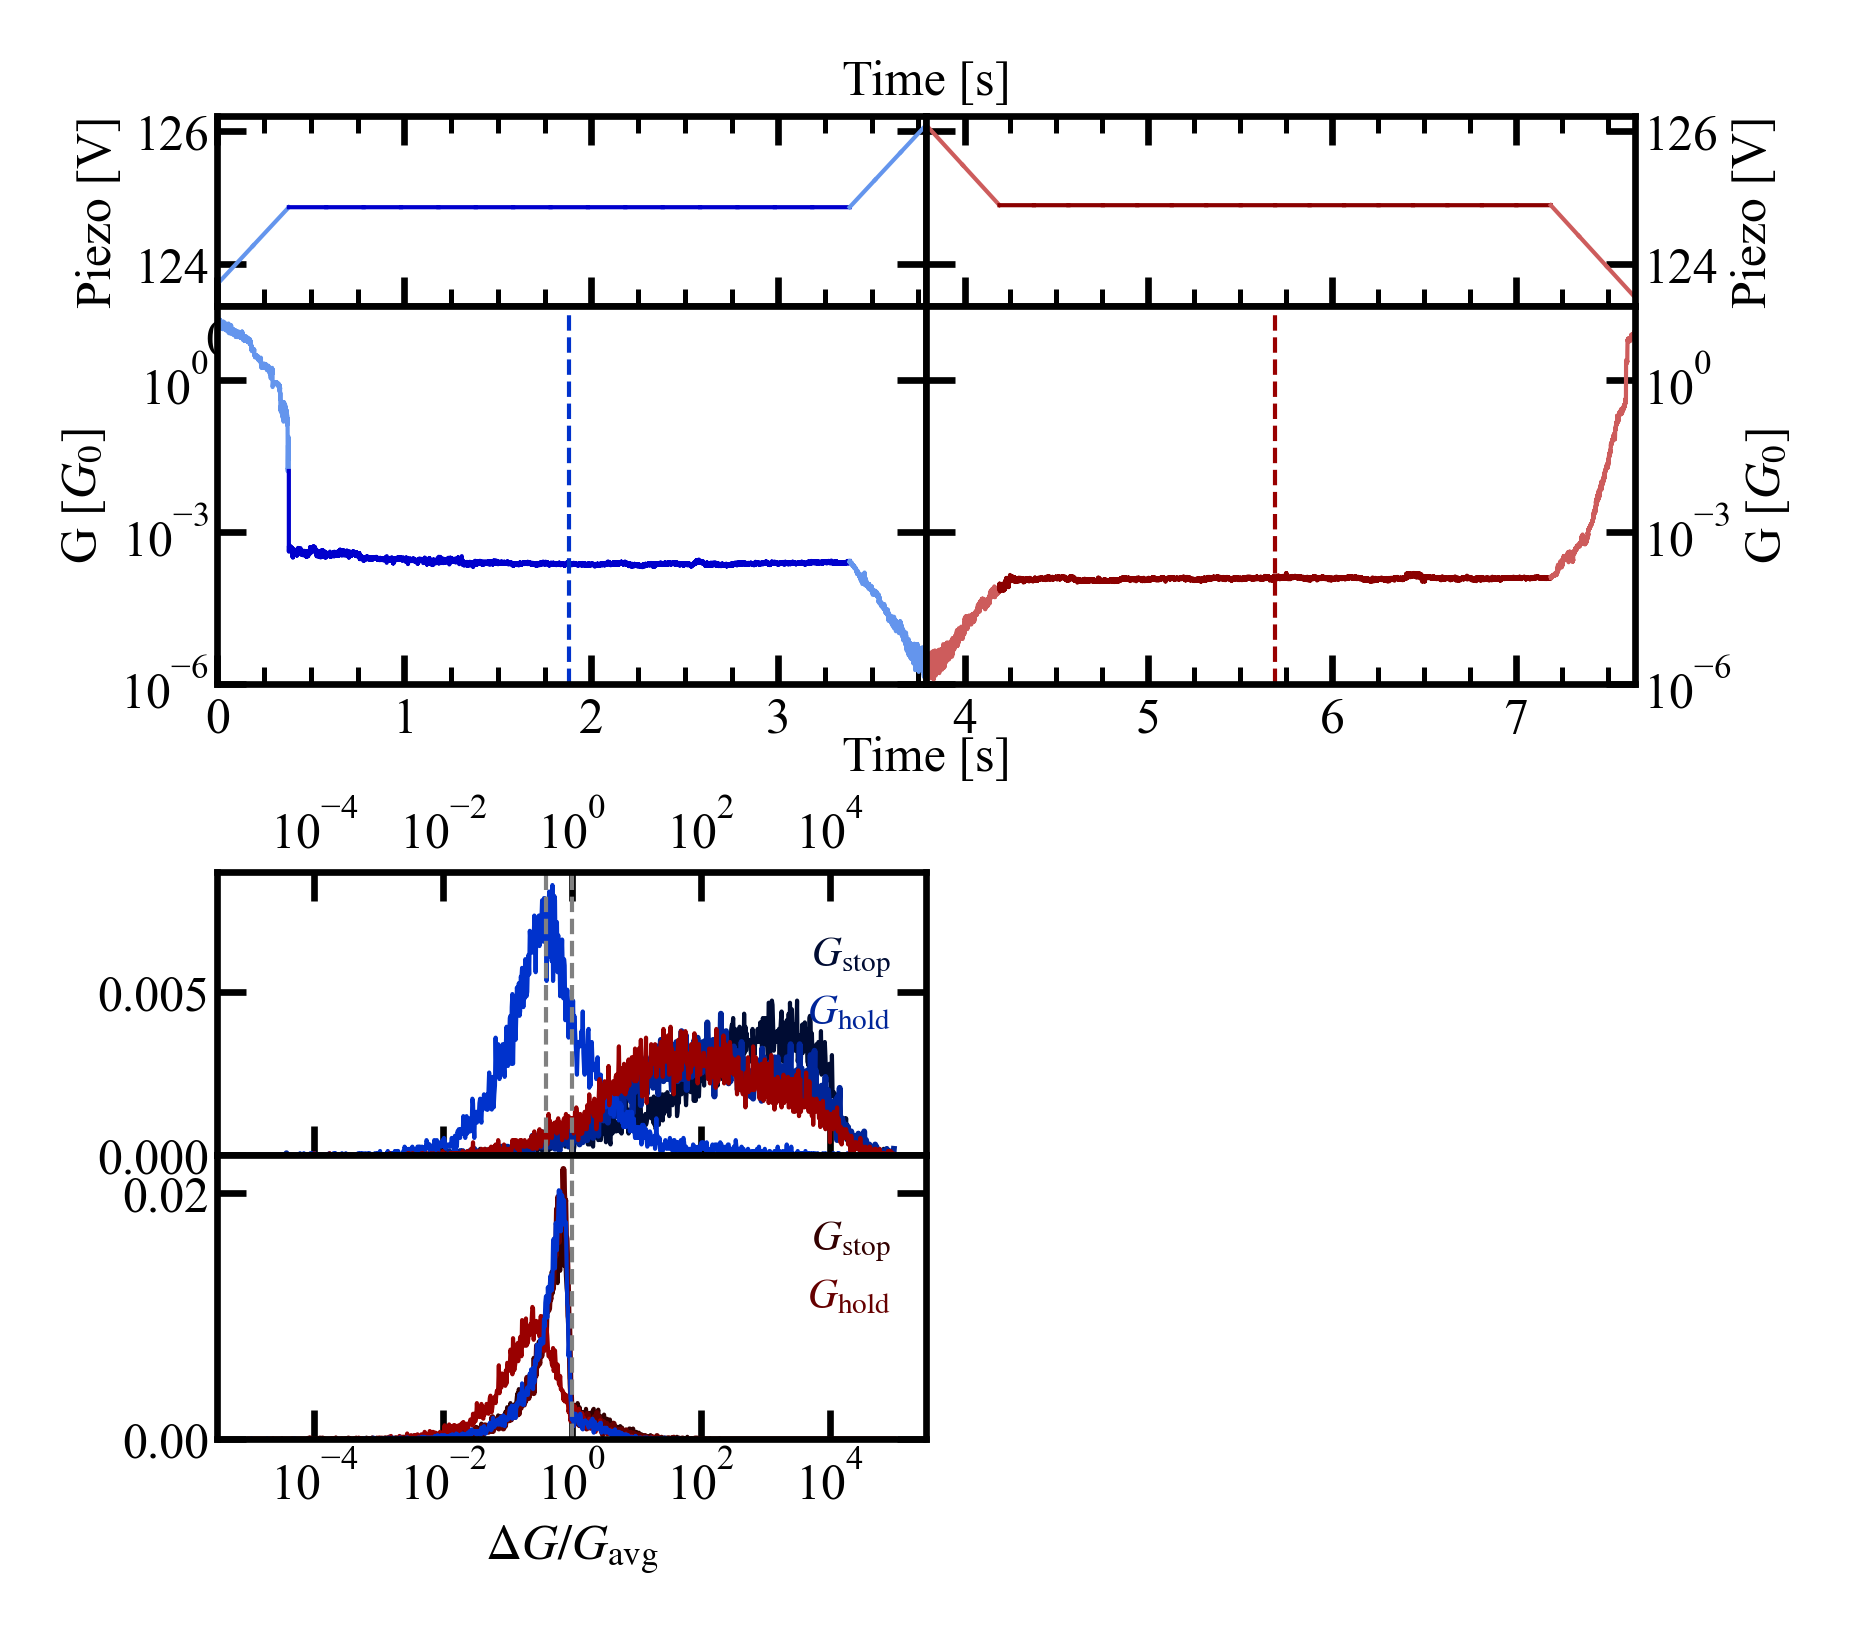

In [95]:
fig = plt.figure(figsize=utils.cm2inch(7.5, 8), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 1),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.2, hspace=0.33)

gs_top = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, height_ratios=(1, 2),
                                          subplot_spec=gs_total[0],
                                          wspace=0, hspace=0)

gs_bottom = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, height_ratios=(1, 1),
                                             subplot_spec=gs_total[1],
                                             wspace=0, hspace=0)


smoothing = 10
main_colors = ('cornflowerblue', 'indianred')
accent_colors = ('mediumblue', 'darkred')
ylim = (1e-6, 10)

ax_piezo_pull = fig.add_subplot(gs_top[0, 0])
ax_piezo_push = fig.add_subplot(gs_top[0, 1], sharey=ax_piezo_pull)
ax_cond_pull = fig.add_subplot(gs_top[1, 0], sharex=ax_piezo_pull)
ax_cond_push = fig.add_subplot(gs_top[1, 1], sharey=ax_cond_pull, sharex=ax_piezo_push)

ax_pull_hist = fig.add_subplot(gs_bottom[0, 0])
ax_push_hist = fig.add_subplot(gs_bottom[1, 0], sharex=ax_pull_hist)


#PULL
cond_before_pull = trace_pair.conductance_pull[np.nonzero(trace_pair.conductance_pull < 10)[0][0]:
                                          trace_pair.hold_index_pull]
cond_hold_pull = hold_trace.hold_conductance_pull
cond_after_pull = trace_pair.conductance_pull[trace_pair.hold_index_pull:
                                         np.nonzero(trace_pair.conductance_pull < 1e-5)[0][0] + 10_000]

piezo_before_pull = trace_pair.piezo_pull[np.nonzero(trace_pair.conductance_pull < 10)[0][0]:
                                     trace_pair.hold_index_pull]
piezo_hold_pull = np.ones_like(cond_hold_pull) * piezo_before_pull[-1]
piezo_after_pull = trace_pair.piezo_pull[trace_pair.hold_index_pull:
                                    np.nonzero(trace_pair.conductance_pull < 1e-5)[0][0] + 10_000]
color_num = 0
#PUSH
cond_before_push = trace_pair.conductance_push[np.nonzero(trace_pair.piezo_push > piezo_after_pull[-1])[0][-1]:
                                          trace_pair.hold_index_push]
cond_hold_push = hold_trace.hold_conductance_push
cond_after_push = trace_pair.conductance_push[trace_pair.hold_index_push:
                                         np.nonzero(trace_pair.conductance_push > 10)[0][0]]

piezo_before_push = trace_pair.piezo_push[np.nonzero(trace_pair.piezo_push > piezo_after_pull[-1])[0][-1]:
                                     trace_pair.hold_index_push]
piezo_hold_push = np.ones_like(cond_hold_push) * piezo_before_push[-1]
piezo_after_push = trace_pair.piezo_push[trace_pair.hold_index_push:
                                    np.nonzero(trace_pair.conductance_push > 10)[0][0]]
color_num = 1

time_before_pull = np.arange(start=0, stop=len(cond_before_pull), step=1)
time_hold_pull = np.arange(start=time_before_pull[-1] + 1, stop=time_before_pull[-1] + len(cond_hold_pull) + 1, step=1)
time_after_pull = np.arange(start=time_hold_pull[-1] + 1, stop=time_hold_pull[-1] + len(cond_after_pull) + 1, step=1)

time_before_push = np.arange(start=time_after_pull[-1], stop=time_after_pull[-1] + len(cond_before_push), step=1)
time_hold_push = np.arange(start=time_before_push[-1] + 1, stop=time_before_push[-1] + len(cond_hold_push) + 1, step=1)
time_after_push = np.arange(start=time_hold_push[-1] + 1, stop=time_hold_push[-1] + len(cond_after_push) + 1, step=1)

time_before_pull = time_before_pull / trace_pair.sample_rate
time_hold_pull = time_hold_pull / trace_pair.sample_rate
time_after_pull = time_after_pull / trace_pair.sample_rate

time_before_push = time_before_push / trace_pair.sample_rate
time_hold_push = time_hold_push / trace_pair.sample_rate
time_after_push = time_after_push / trace_pair.sample_rate

# concatenate individual parts
time_total_pull = np.concatenate((time_before_pull, time_hold_pull, time_after_pull))
cond_total_pull = np.concatenate((cond_before_pull, cond_hold_pull, cond_after_pull))
piezo_total_pull = np.concatenate((piezo_before_pull, piezo_hold_pull, piezo_after_pull))

time_total_push = np.concatenate((time_before_push, time_hold_push, time_after_push))
cond_total_push = np.concatenate((cond_before_push, cond_hold_push, cond_after_push))
piezo_total_push = np.concatenate((piezo_before_push, piezo_hold_push, piezo_after_push))

dividers_pull = (len(time_before_pull),                   # only need 2 dividers technically
        len(time_before_pull) + len(time_hold_pull))  # (the 3rd would be the last point)

dividers_push = (len(time_before_push),                   # only need 2 dividers technically
        len(time_before_push) + len(time_hold_push))  # (the 3rd would be the last point)

time_total_avg_pull = utils.moving_average(time_total_pull, smoothing)
cond_total_avg_pull = utils.moving_average(cond_total_pull, smoothing)
piezo_total_avg_pull = utils.moving_average(piezo_total_pull, smoothing)

time_total_avg_push = utils.moving_average(time_total_push, smoothing)
cond_total_avg_push = utils.moving_average(cond_total_push, smoothing)
piezo_total_avg_push = utils.moving_average(piezo_total_push, smoothing)

# plot the piezo
#PULL
ax_piezo_pull.plot(time_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]],
          piezo_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]], c=main_colors[0], lw=0.5)

ax_piezo_pull.plot(time_total_avg_pull[
           np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
          piezo_total_avg_pull[
           np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
          c=accent_colors[0], lw=0.5)

ax_piezo_pull.plot(time_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]],
          piezo_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]], c=main_colors[0], lw=0.5)
#PUSH
ax_piezo_push.plot(time_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]],
          piezo_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]], c=main_colors[1], lw=0.5)

ax_piezo_push.plot(time_total_avg_push[
           np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
          piezo_total_avg_push[
           np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
          c=accent_colors[1], lw=0.5)

ax_piezo_push.plot(time_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]],
          piezo_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]], c=main_colors[1], lw=0.5)

# plot the conductance
ax_cond_pull.plot(time_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]],
    cond_total_avg_pull[time_total_avg_pull < time_total_pull[dividers_pull[0]]], c=main_colors[0], lw=0.5)

ax_cond_pull.plot(time_total_avg_pull[
        np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
    cond_total_avg_pull[
        np.bitwise_and(time_total_avg_pull > time_total_pull[dividers_pull[0]], time_total_avg_pull < time_total_pull[dividers_pull[1]])],
    c=accent_colors[0], lw=0.5)

ax_cond_pull.plot(time_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]],
    cond_total_avg_pull[time_total_avg_pull > time_total_pull[dividers_pull[1]]], c=main_colors[0], lw=0.5)
ax_cond_pull.set_yscale('log')
ax_cond_pull.set_ylim(ylim)

ax_cond_push.plot(time_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]],
    cond_total_avg_push[time_total_avg_push < time_total_push[dividers_push[0]]], c=main_colors[1], lw=0.5)

ax_cond_push.plot(time_total_avg_push[
        np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
    cond_total_avg_push[
        np.bitwise_and(time_total_avg_push > time_total_push[dividers_push[0]], time_total_avg_push < time_total_push[dividers_push[1]])],
    c=accent_colors[1], lw=0.5)

ax_cond_push.plot(time_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]],
    cond_total_avg_push[time_total_avg_push > time_total_push[dividers_push[1]]], c=main_colors[1], lw=0.5)
ax_cond_push.set_yscale('log')
ax_cond_push.set_ylim(ylim)

ax_piezo_pull.yaxis.set_ticks_position('both')
ax_piezo_pull.xaxis.set_ticks_position('both')
ax_piezo_push.xaxis.set_ticks_position('both')

ax_cond_pull.yaxis.set_ticks_position('both')

ax_piezo_push.yaxis.set_label_position('right')
ax_piezo_push.yaxis.tick_right()
ax_piezo_push.yaxis.set_ticks_position('both')

ax_cond_push.yaxis.set_label_position('right')
ax_cond_push.yaxis.tick_right()
ax_cond_push.yaxis.set_ticks_position('both')

ax_piezo_pull.set_xticks(np.arange(0, 4, 1), minor=False)
ax_piezo_push.set_xticks(np.arange(3, 8, 1), minor=False)

ax_piezo_pull.set_xticks(np.arange(0.25, 4, 0.25), minor=True, alpha=0.5)
ax_piezo_push.set_xticks(np.arange(3.25, 8, 0.25), minor=True, alpha=0.5)

ax_cond_pull.set_ylabel(r'G [$G_{0}$]')
ax_cond_push.set_ylabel(r'G [$G_{0}$]')

ax_piezo_pull.set_ylabel(r'Piezo [V]')
ax_piezo_push.set_ylabel(r'Piezo [V]')

ax_cond_pull.set_ylim(1e-6, 30)
# ax_push_hist.set_ylim(0)

ax_cond_pull.tick_params(axis='y', which='minor', left=False, right=False)
ax_cond_push.tick_params(axis='y', which='minor', left=False, right=False)

ax_piezo_pull.set_xlim(time_total_pull[0], time_total_pull[-1])
ax_piezo_push.set_xlim(time_total_push[0], time_total_push[-1])

ax_cond_pull.text(time_after_pull[-1], 1e-7, 'Time [s]', va='top', ha='center', size=6)
ax_piezo_pull.text(time_after_pull[-1], max(piezo_total_pull)+0.3, 'Time [s]', va='bottom', ha='center', size=6)

ax_pull_hist.set_xscale('log')
ax_push_hist.set_xscale('log')

ax_pull_hist.yaxis.set_ticks_position('both')
ax_push_hist.yaxis.set_ticks_position('both')

# ax_pull_hist.xaxis.set_label_position('top')
ax_pull_hist.xaxis.tick_top()
ax_pull_hist.xaxis.set_ticks_position('both')

# ax_pull_hist.plot(avgs_bins_pull, avgs_single_hist_pull/len(conductance_stat_pull['G_avg']), c='mediumblue', lw=0.7)
# ax_push_hist.plot(avgs_bins_push, avgs_single_hist_push/len(conductance_stat_push['G_avg']), c='darkred', lw=0.7)


# ax_pull_hist.fill_between(hold_bins_pull, np.zeros_like(hold_bins_pull), hold_single_hist_pull/len(conductance_stat_pull['G_hold']), color='mediumblue', lw=0.7, alpha=0.5)
# ax_push_hist.fill_between(hold_bins_push, np.zeros_like(hold_bins_push), hold_single_hist_push/len(conductance_stat_push['G_hold']), color='darkred', lw=0.7, alpha=0.5)

ax_pull_hist.plot(stop_bins_pull, stop_single_hist_pull/len(conductance_stat_pull['G_stop']), c=plots.blues[0], lw=0.5)
ax_push_hist.plot(stop_bins_push, stop_single_hist_push/len(conductance_stat_push['G_stop']), c=plots.reds[0], lw=0.5)

ax_pull_hist.plot(hold_bins_pull, hold_single_hist_pull/len(conductance_stat_pull['G_hold']), c=plots.blues[1], lw=0.7)
ax_push_hist.plot(hold_bins_push, hold_single_hist_push/len(conductance_stat_push['G_hold']), c=plots.reds[1], lw=0.7)

ax_pull_hist.plot(middle_bins_pull, middle_single_hist_pull/len(conductance_stat_pull['G_stop']), c=plots.blues[2], lw=0.5)
ax_push_hist.plot(middle_bins_push, middle_single_hist_push/len(conductance_stat_push['G_stop']), c=plots.reds[2], lw=0.5)

ax_pull_hist.plot(beginning_bins_pull, beginning_single_hist_pull/len(conductance_stat_pull['G_stop']), c=plots.reds[2], lw=0.5)
ax_push_hist.plot(beginning_bins_push, beginning_single_hist_push/len(conductance_stat_push['G_stop']), c=plots.blues[2], lw=0.5)

ax_cond_pull.axvline(time_total_pull[(dividers_pull[0] + hold_trace.test_intervals_pull[12][0])],
                     c=plots.blues[2], lw=0.5, ls='--')

ax_cond_push.axvline(time_total_push[(dividers_push[0] + hold_trace.test_intervals_push[12][0])],
                     c=plots.reds[2], lw=0.5, ls='--')

# ax_pull_hist.set_xlim(1e-5, 1e-1)
ax_pull_hist.set_ylim(0)
ax_push_hist.set_ylim(0)

ax_cond_pull.set_ylim(1e-6, 30)
# ax_push_hist.set_ylim(0)

# ax_pull_hist.set_ylabel('Normalized counts (a.u.)')
ax_pull_hist.set_xlabel(r'G [$G_{0}$]')
# ax_push_hist.set_ylabel('Normalized counts (a.u.)')
ax_push_hist.set_xlabel(r'$\Delta G /G_{\mathrm{avg}}$')

# ax_pull_hist.text(1e-3, 0, 'Normalized counts [a.u.]', rotation='vertical', va='center', size=6)
ax_pull_hist.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))

ax_pull_hist.text(0.95, 0.7, r'$G_{\mathrm{stop}}$', horizontalalignment='right', verticalalignment='center',
                 c=plots.blues[0], size=5, transform=ax_pull_hist.transAxes)
# ax_pull_hist.text(0.05, 0.5, 'G_hold', horizontalalignment='left', verticalalignment='center',
#                  c='mediumblue', size=5, transform=ax_pull_hist.transAxes)
ax_pull_hist.text(0.95, 0.5, r'$G_{\mathrm{hold}}$', horizontalalignment='right', verticalalignment='center',
                 c=plots.blues[1], size=5, transform=ax_pull_hist.transAxes)

ax_push_hist.text(0.95, 0.7, r'$G_{\mathrm{stop}}$', horizontalalignment='right', verticalalignment='center',
                 c=plots.reds[0], size=5, transform=ax_push_hist.transAxes)
# ax_push_hist.text(0.95, 0.5, 'G_hold', horizontalalignment='right', verticalalignment='center',
#                  c='darkred', size=5, transform=ax_push_hist.transAxes)
ax_push_hist.text(0.95, 0.5, r'$G_{\mathrm{hold}}$', horizontalalignment='right', verticalalignment='center',
                 c=plots.reds[1], size=5, transform=ax_push_hist.transAxes)

ax_pull_hist.axvline(1, c='grey', lw=0.5, ls='--')
ax_push_hist.axvline(1, c='grey', lw=0.5, ls='--')

ax_pull_hist.axvline(0.4, c='grey', lw=0.5, ls='--')

# plt.savefig(home_folder.joinpath(f'results/article/measurement_scheme_{which_trace}_hist.svg'))

In [317]:
dividers_pull[1]/50_000

NameError: name 'dividers_pull' is not defined

In [71]:
hold_trace.test_intervals_pull[12][0]

74973

In [73]:
(dividers_pull[0] + hold_trace.test_intervals_pull[12][0])/50_000

1.8814

In [77]:
time_total_pull[(dividers_pull[0] + hold_trace.test_intervals_pull[12][0])]

1.8814

# Define relaxation and filter traces

In [442]:
conductance_stat_pull.columns

Index(['trace_index', 'G_set', 'G_stop', 'G_hold', 'G_avg', 'G_avgs_1',
       'G_avgs_2', 'G_avgs_3', 'G_avgs_4', 'G_avgs_5', 'G_avgs_6', 'G_avgs_7',
       'G_avgs_8', 'G_avgs_9', 'G_avgs_10', 'G_avgs_11', 'G_avgs_12',
       'G_avgs_13', 'G_avgs_14', 'G_avgs_15', 'G_avgs_16', 'G_avgs_17',
       'G_avgs_18', 'G_avgs_19', 'G_avgs_20', 'G_avgs_21', 'G_avgs_22',
       'G_avgs_23', 'G_avgs_24', 'G_avgs_25'],
      dtype='object')

In [448]:
print(len(conductance_stat_pull['trace_index']))
print(len(conductance_stat_push['trace_index']))

15000
15000


In [292]:
def does_not_break(conductance):
#     return np.all(conductance > 1e-5)  # very strict
#     return np.sum(conductance > 1e-5) > 0.998*len(conductance)  # still more strict than previously used ones
    return np.all(utils.moving_average(conductance, 50) > 1e-5)  # still more strict, but I choose this

def measure_relaxation(conductance):
    scaling_val = np.mean(conductance[:int(len(conductance)/2)])
    scaled_conductance = conductance/scaling_val
    
#     relax_ends_at = np.nonzero(scaled_conductance < 2)[0][0]  # first point that is smaller than 2
    try:
        relax_ends_at = np.nonzero(scaled_conductance > 2)[0][-1]  # last point that is larger than 2
    except IndexError:
        relax_ends_at = 0
    relax_time = relax_ends_at/50_000
    relax_amount = conductance[0]-conductance[relax_ends_at]
    
    return relax_ends_at, relax_time, relax_amount

def is_stabil(conductance):
    
    relax_ends_at, _, _ = measure_relaxation(conductance)
    
    return relax_ends_at < len(conductance)/3

In [293]:
did_not_break_pull = []
did_not_break_push = []

for i in tqdm(conductance_stat_pull['trace_index'].astype(int)):
    hold_trace = HoldTrace(f'trace_{i}', load_from=home_folder, bias_offset=0,
                           r_serial_ohm=99_900, min_step_len=20_000, min_height=1)
    
    if does_not_break(hold_trace.hold_conductance_pull[:hold_trace.bias_steps_ranges_pull[0, 1]]):
        did_not_break_pull.append(i)
    if does_not_break(hold_trace.hold_conductance_push[:hold_trace.bias_steps_ranges_push[0, 1]]):
        did_not_break_push.append(i)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [460]:
did_not_break_pull = np.array(did_not_break_pull)
did_not_break_push = np.array(did_not_break_push)

print(len(did_not_break_pull))
print(len(did_not_break_push))
print(len(np.intersect1d(did_not_break_pull, did_not_break_push)))

5557
14476
5337


In [295]:
# did_not_break_pull

In [296]:
hold_trace = HoldTrace(f'trace_{np.random.choice(did_not_break_pull)}', load_from=home_folder, bias_offset=0,
                           r_serial_ohm=99_900, min_step_len=20_000, min_height=1)

In [297]:
print(np.mean(hold_trace.hold_conductance_pull[-int(len(hold_trace.hold_conductance_pull)/4):]))
print(np.std(hold_trace.hold_conductance_pull[-int(len(hold_trace.hold_conductance_pull)/4):]))

0.004830683230693328
0.0021055878403089217


In [298]:
mean_pull = []
std_pull = []
end_mean_pull = []
end_std_pull = []

for i in tqdm(did_not_break_pull):
    hold_trace = HoldTrace(f'trace_{i}', load_from=home_folder, bias_offset=0,
                           r_serial_ohm=99_900, min_step_len=20_000, min_height=1)
    
    mean_pull.append(np.mean(hold_trace.hold_conductance_pull))
    std_pull.append(np.std(hold_trace.hold_conductance_pull))
    end_mean_pull.append(np.mean(hold_trace.hold_conductance_pull[-int(len(hold_trace.hold_conductance_pull)/4):]))
    end_std_pull.append(np.std(hold_trace.hold_conductance_pull[-int(len(hold_trace.hold_conductance_pull)/4):]))
    
mean_push = []
std_push = []
end_mean_push = []
end_std_push = []

for i in tqdm(did_not_break_push):
    hold_trace = HoldTrace(f'trace_{i}', load_from=home_folder, bias_offset=0,
                           r_serial_ohm=99_900, min_step_len=20_000, min_height=1)
    
    mean_push.append(np.mean(hold_trace.hold_conductance_push))
    std_push.append(np.std(hold_trace.hold_conductance_push))
    end_mean_push.append(np.mean(hold_trace.hold_conductance_push[-int(len(hold_trace.hold_conductance_push)/4):]))
    end_std_push.append(np.std(hold_trace.hold_conductance_push[-int(len(hold_trace.hold_conductance_push)/4):]))

  0%|          | 0/5623 [00:00<?, ?it/s]

  0%|          | 0/14508 [00:00<?, ?it/s]

In [299]:
stats_pull = pd.DataFrame(data={"avg_whole": mean_pull, "avg_end": end_mean_pull,
                                "std_whole": std_pull, "std_end": end_std_pull})

stats_push = pd.DataFrame(data={"avg_whole": mean_push, "avg_end": end_mean_push,
                                "std_whole": std_push, "std_end": end_std_push})

In [300]:
stats_pull

avg_whole   avg_end  std_whole   std_end
0      0.003418  0.002910   0.001884  0.000457
1      0.002873  0.003090   0.001415  0.000588
2      0.000805  0.000389   0.001711  0.000135
3      0.003713  0.002103   0.002793  0.000174
4      0.003177  0.002660   0.000763  0.000643
...         ...       ...        ...       ...
5618   0.000417  0.000161   0.000620  0.000033
5619   0.001021  0.000050   0.000675  0.000011
5620   0.001905  0.001701   0.000441  0.000230
5621   0.000375  0.000234   0.000683  0.000017
5622   0.001094  0.000406   0.000608  0.000040

[5623 rows x 4 columns]

In [301]:
np.unique(stats_push['std_whole']-stats_push['std_end'] > 0, return_counts=True)

(array([False,  True]), array([ 1599, 12909], dtype=int64))

In [302]:
stats_pull['std_whole'].max()

0.17776875574147535

In [303]:
np.unique(stats_pull['std_whole']-stats_pull['std_end'] > 0, return_counts=True)

(array([False,  True]), array([ 143, 5480], dtype=int64))

In [304]:
avg_whole_bins_pull, avg_whole_single_hist_pull = utils.calc_hist_1d_single(data=stats_pull['avg_whole'],
                                                                            xrange=(1e-5, 1e-2),
                                                                            xbins_num=100,
                                                                            log_scale=True)

avg_end_bins_pull, avg_end_single_hist_pull = utils.calc_hist_1d_single(data=stats_pull['avg_end'],
                                                                            xrange=(1e-5, 1e-2),
                                                                            xbins_num=100,
                                                                            log_scale=True)

avg_whole_bins_push, avg_whole_single_hist_push = utils.calc_hist_1d_single(data=stats_push['avg_whole'],
                                                                            xrange=(1e-5, 1e-2),
                                                                            xbins_num=100,
                                                                            log_scale=True)

avg_end_bins_push, avg_end_single_hist_push = utils.calc_hist_1d_single(data=stats_push['avg_end'],
                                                                            xrange=(1e-5, 1e-2),
                                                                            xbins_num=100,
                                                                            log_scale=True)

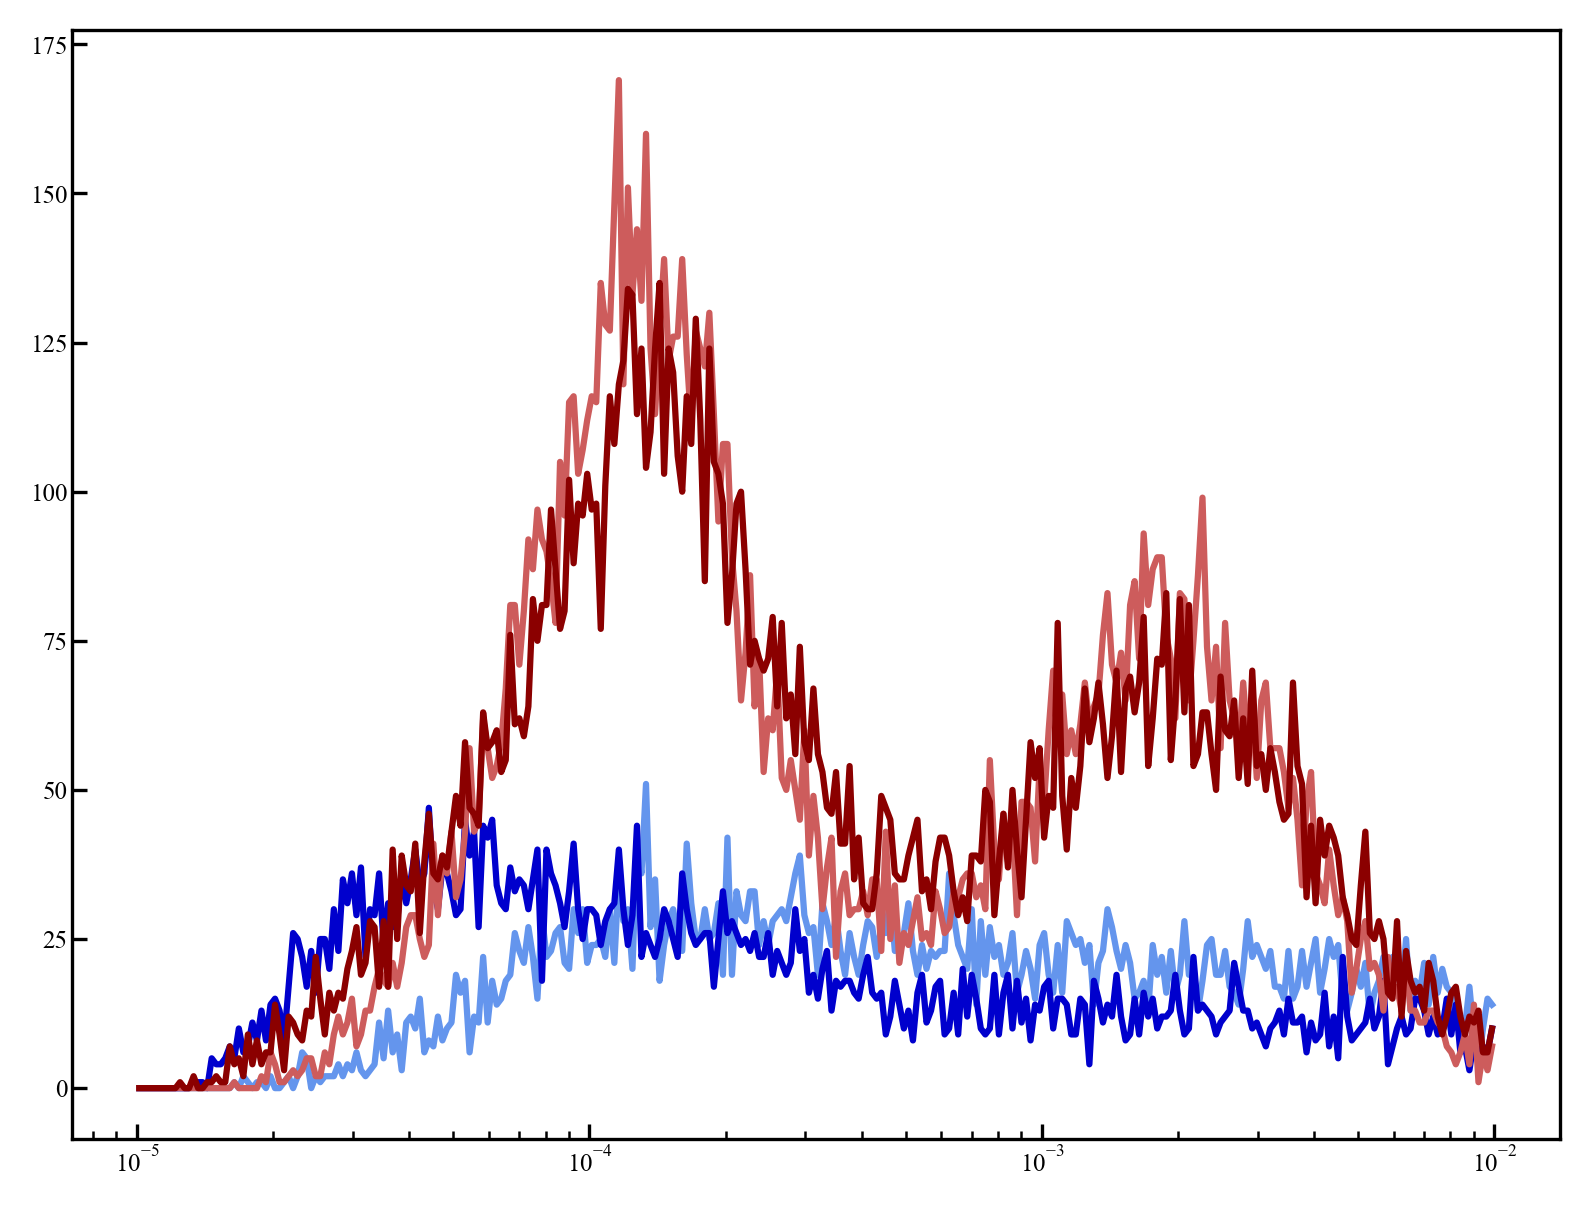

In [305]:
fig, ax = plt.subplots(1, dpi=300)
ax.plot(avg_whole_bins_pull, avg_whole_single_hist_pull, c='cornflowerblue')
ax.plot(avg_end_bins_pull, avg_end_single_hist_pull, c='mediumblue')
ax.plot(avg_whole_bins_push, avg_whole_single_hist_push, c='indianred')
ax.plot(avg_end_bins_push, avg_end_single_hist_push, c='darkred')
ax.set_xscale('log')

In [306]:
std_whole_bins_pull, std_whole_single_hist_pull = utils.calc_hist_1d_single(data=stats_pull['std_whole'],
                                                                            xrange=(1e-6, 1e-2),
                                                                            xbins_num=100,
                                                                            log_scale=True)

std_end_bins_pull, std_end_single_hist_pull = utils.calc_hist_1d_single(data=stats_pull['std_end'],
                                                                            xrange=(1e-6, 1e-2),
                                                                            xbins_num=100,
                                                                            log_scale=True)

std_whole_bins_push, std_whole_single_hist_push = utils.calc_hist_1d_single(data=stats_push['std_whole'],
                                                                            xrange=(1e-6, 1e-2),
                                                                            xbins_num=100,
                                                                            log_scale=True)

std_end_bins_push, std_end_single_hist_push = utils.calc_hist_1d_single(data=stats_push['std_end'],
                                                                            xrange=(1e-6, 1e-2),
                                                                            xbins_num=100,
                                                                            log_scale=True)

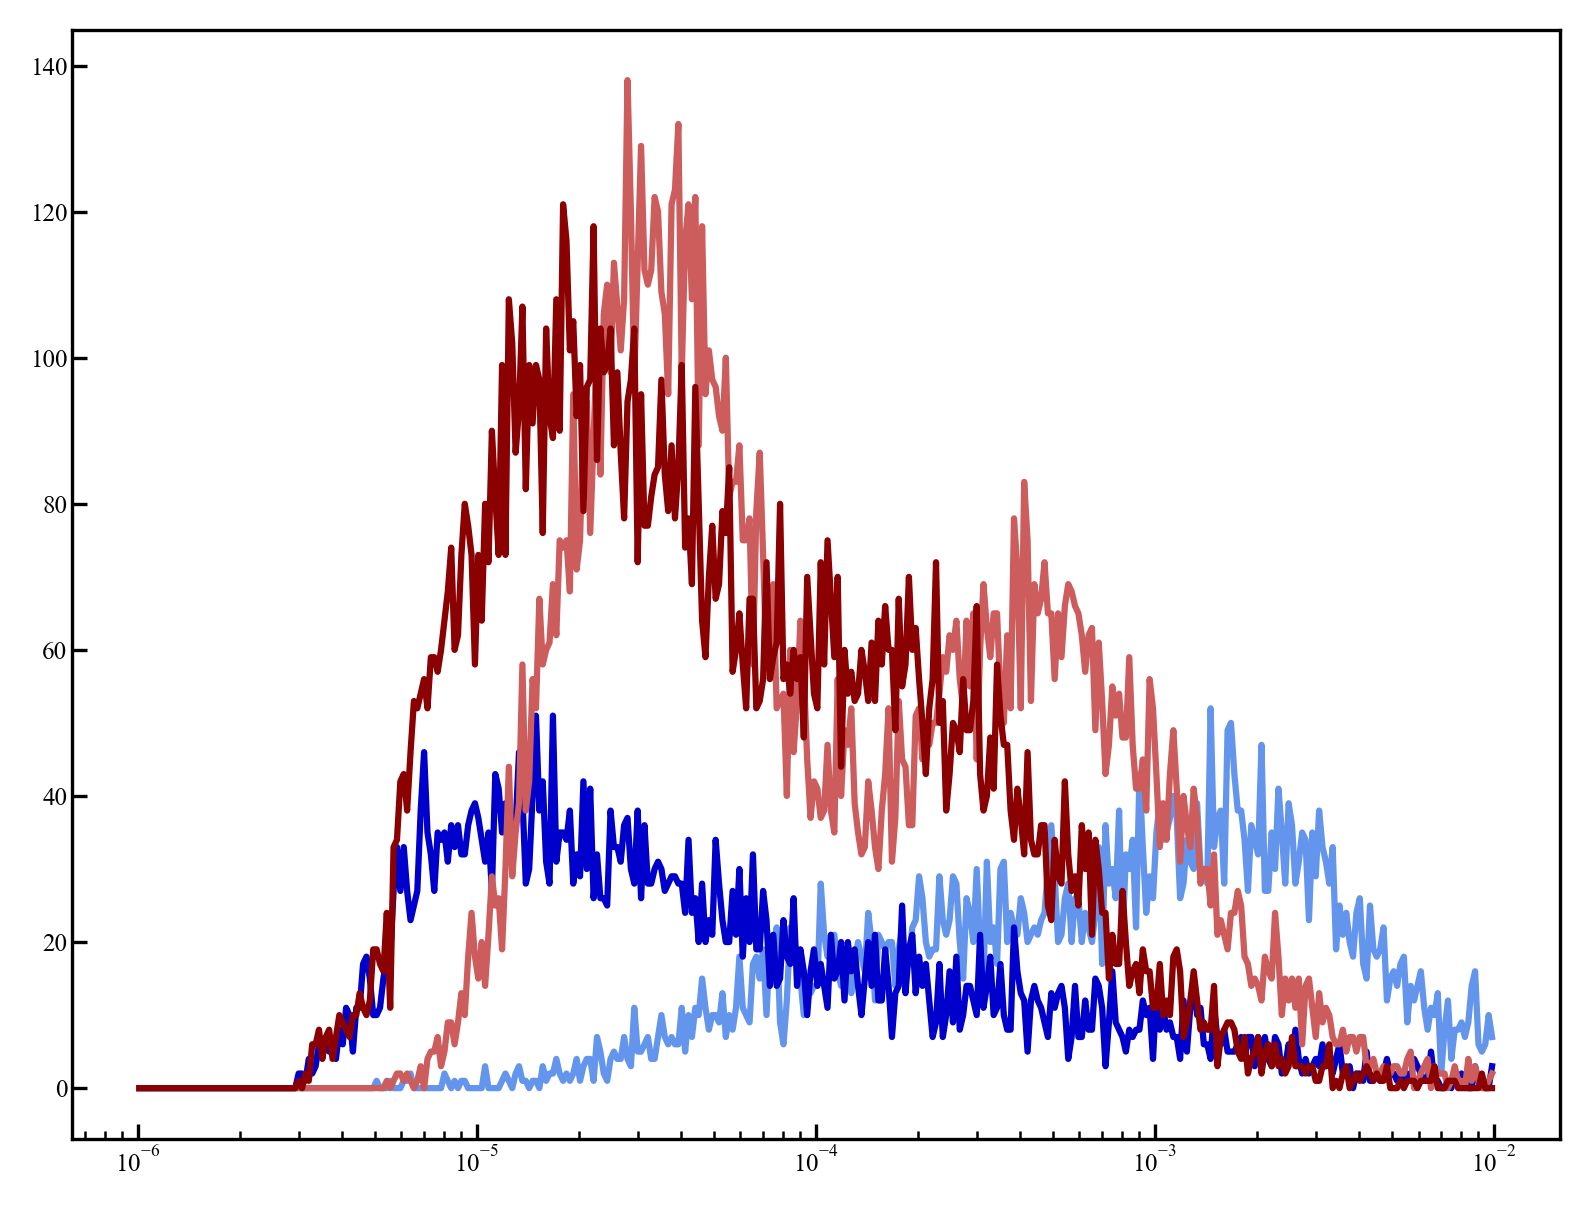

In [307]:
fig, ax = plt.subplots(1, dpi=300)
ax.plot(std_whole_bins_pull, std_whole_single_hist_pull, c='cornflowerblue')
ax.plot(std_end_bins_pull, std_end_single_hist_pull, c='mediumblue')
ax.plot(std_whole_bins_push, std_whole_single_hist_push, c='indianred')
ax.plot(std_end_bins_push, std_end_single_hist_push, c='darkred')
ax.set_xscale('log')

In [308]:
def count_same(bool_array):
#     count = 1
#     cluster_num = []
#     cluster_val = []
#     cluster_start = [0]
#     for i in range(1, len(bool_array)):
#         if bool_array[i] == bool_array[i-1]:
#             count += 1
#             if i==len(bool_array)-1:
#                 cluster_val.append(bool_array[i-1])
#                 cluster_num.append(count)
#                 count = 1
#         else:
#             cluster_val.append(bool_array[i-1])
#             cluster_num.append(count)
#             count = 1
#             cluster_start.append(i)

    test = np.where(np.diff(bool_array) != 0)[0]
    test = np.append(test, np.array([len(bool_array)-1]))
    test = np.insert(test, 0, -1)
    
    cluster_start = test[:-1] + 1
    cluster_val = np.append(bool_array[np.where(np.diff(bool_array) != 0)[0]], bool_array[-1])
    cluster_num = np.diff(test)
        
    return cluster_val, cluster_num, cluster_start
#     return np.array(cluster_val), np.array(cluster_num), np.array(cluster_start)

In [309]:
bool_arr = np.array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
print(np.diff(bool_arr))
test = np.where(np.diff(bool_arr) != 0)[0]
print(test)
test = np.append(test, np.array([len(bool_arr)-1]))
test = np.insert(test, 0, -1)
print(test+1)
# cluster_val
print(np.append(bool_arr[np.where(np.diff(bool_arr) != 0)[0]], bool_arr[-1]))
# cluster_num
print(np.diff(test))

[ 0  0  0 -1  0  0  1  0 -1  0  0  0  0  0  0  0]
[3 6 8]
[ 0  4  7  9 17]
[1 0 1 0]
[4 3 2 8]


In [310]:
np.array([len(bool_arr)])

array([17])

In [311]:
print(len(hold_trace.hold_conductance_pull)-49)

149952


In [312]:
len(hold_trace.hold_conductance_pull)-len(utils.moving_average(hold_trace.hold_conductance_pull, 50))

49

In [313]:
hold_trace = HoldTrace(f'trace_{16245}', load_from=home_folder, bias_offset=0,
                       r_serial_ohm=99_900, min_step_len=20_000, min_height=1)

0.01472645036592171
0.92006


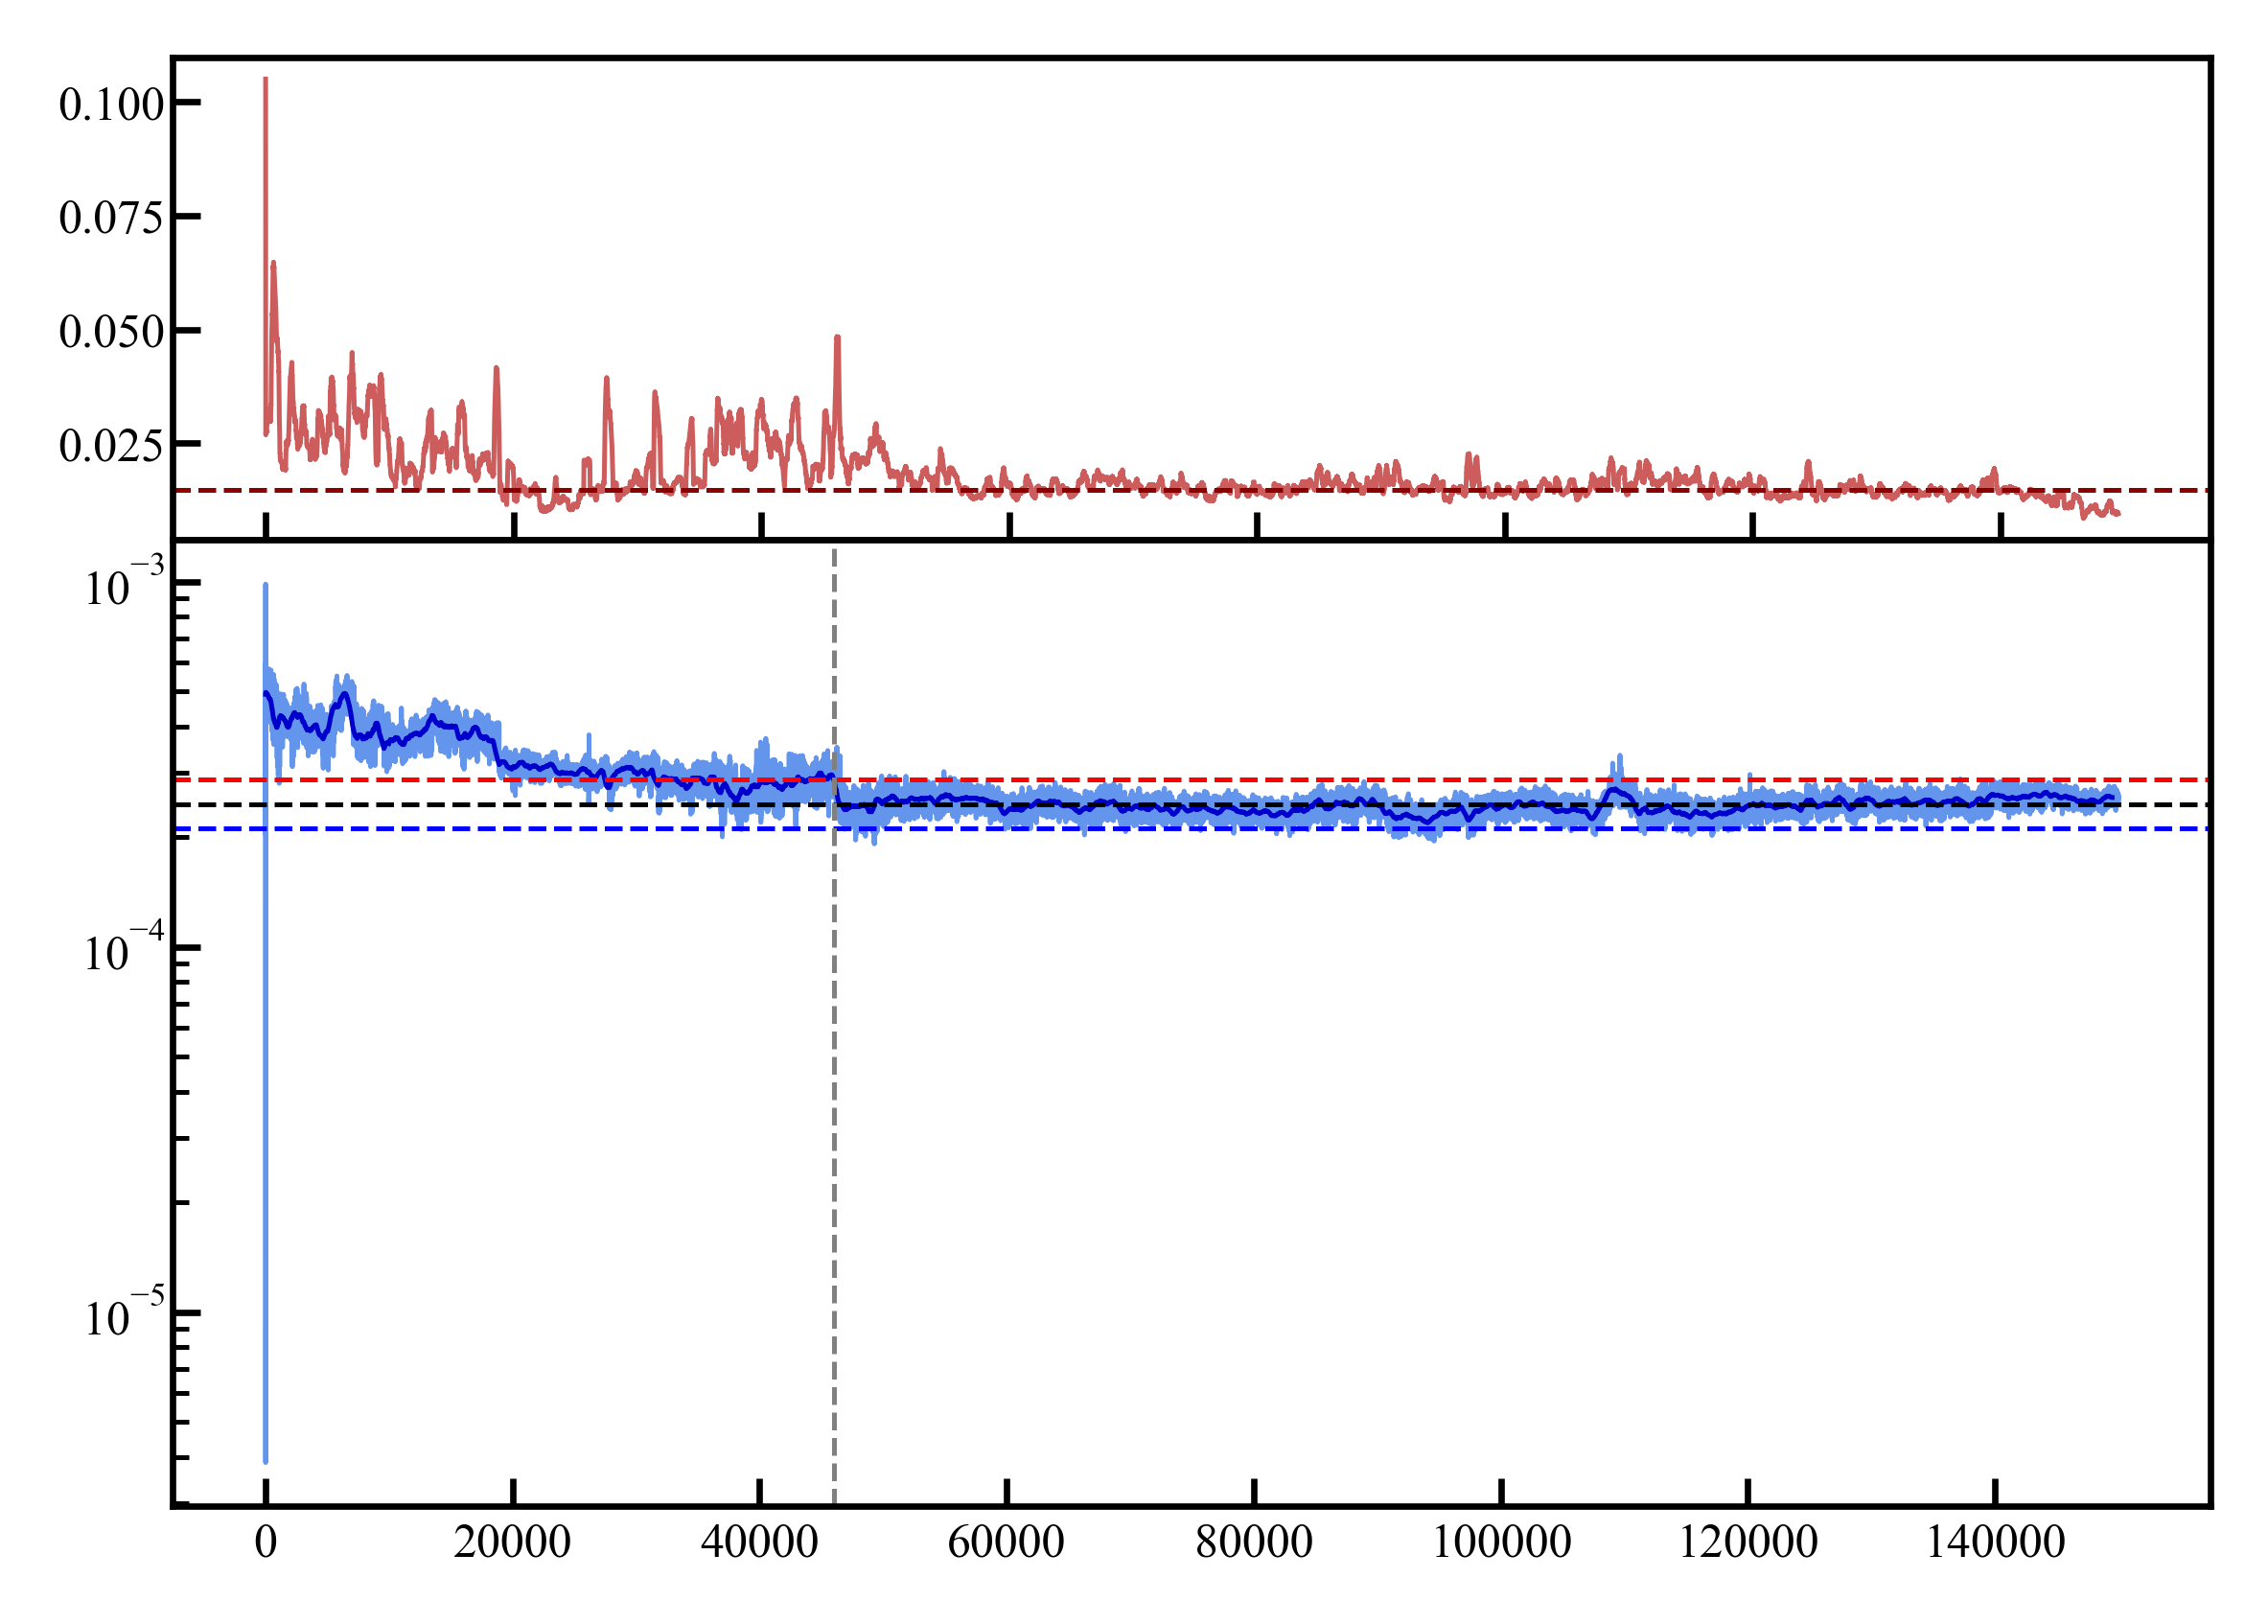

In [315]:
fig = plt.figure(figsize=utils.cm2inch(12, 8), dpi=600)  # figsize: (width, height) in inches

gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 2),
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0, hspace=0)

ax_std = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

w=500  # window size

rolling_mean_pull = np.mean(np.array([np.log10(hold_trace.hold_conductance_pull[i:i+w]) for i in range(len(hold_trace.hold_conductance_pull)-w+1)]), axis=1)
rolling_std_pull = np.std(np.array([np.log10(hold_trace.hold_conductance_pull[i:i+w]) for i in range(len(hold_trace.hold_conductance_pull)-w+1)]), axis=1)

# ax.set_ylim(1e-5, 1e-2)
ax.set_yscale('log')

ax.plot(hold_trace.hold_conductance_pull, c='cornflowerblue', lw=0.6)
ax.plot(10**rolling_mean_pull, c='mediumblue', lw=0.6)
# ax.plot(10**(rolling_mean_pull+5*rolling_std_pull), c='red', lw=0.6)
# ax.plot(10**(rolling_mean_pull-5*rolling_std_pull), c='blue', lw=0.6)

ax_std.plot(rolling_std_pull, c='indianred', lw=0.6)
ax_std.axhline(np.mean(rolling_std_pull[-50_000:]), lw=0.6, c='darkred', ls='--')
# ax_std.axhline(5*np.mean(rolling_std_pull[-50_000:]))
print(np.mean(rolling_std_pull[-50_000:]))

# upper_lim = 10**(np.mean(rolling_mean_pull[-50_000:]) + 10*np.mean(rolling_std_pull[-50_000:]))
# lower_lim = 10**(np.mean(rolling_mean_pull[-50_000:]) - 10*np.mean(rolling_std_pull[-50_000:]))

upper_lim = 10**(np.mean(rolling_mean_pull[-50_000:]) + 3*np.std(np.log10(hold_trace.hold_conductance_pull[hold_trace.hold_conductance_pull>0][-50_000:])))
lower_lim = 10**(np.mean(rolling_mean_pull[-50_000:]) - 3*np.std(np.log10(hold_trace.hold_conductance_pull[hold_trace.hold_conductance_pull>0][-50_000:])))

ax.axhline(10**np.mean(rolling_mean_pull[-50_000:]), lw=0.6, c='k', ls='--')
ax.axhline(upper_lim, c='red', lw=0.6, ls='--')
ax.axhline(lower_lim, c='b', lw=0.6, ls='--')

# cross_point = np.nonzero(np.bitwise_and(10**rolling_mean_pull < upper_lim, 10**rolling_mean_pull > lower_lim))[0][0]

cluster_val, cluster_elements, cluster_start = count_same(
    np.bitwise_and(np.where(np.sign(upper_lim - 10**rolling_mean_pull) < 0, 0, np.sign(upper_lim - 10**rolling_mean_pull)).astype(bool),
                   np.where(np.sign(10**rolling_mean_pull - lower_lim) < 0, 0, np.sign(10**rolling_mean_pull - lower_lim)).astype(bool)))

cross_point = cluster_start[np.bitwise_and(cluster_val, cluster_elements > 10_000)][0]
ax.axvline(cross_point, c='grey', lw=0.6, ls='--')
print(cross_point/50_000)

0.022192782
0.9262
[False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  

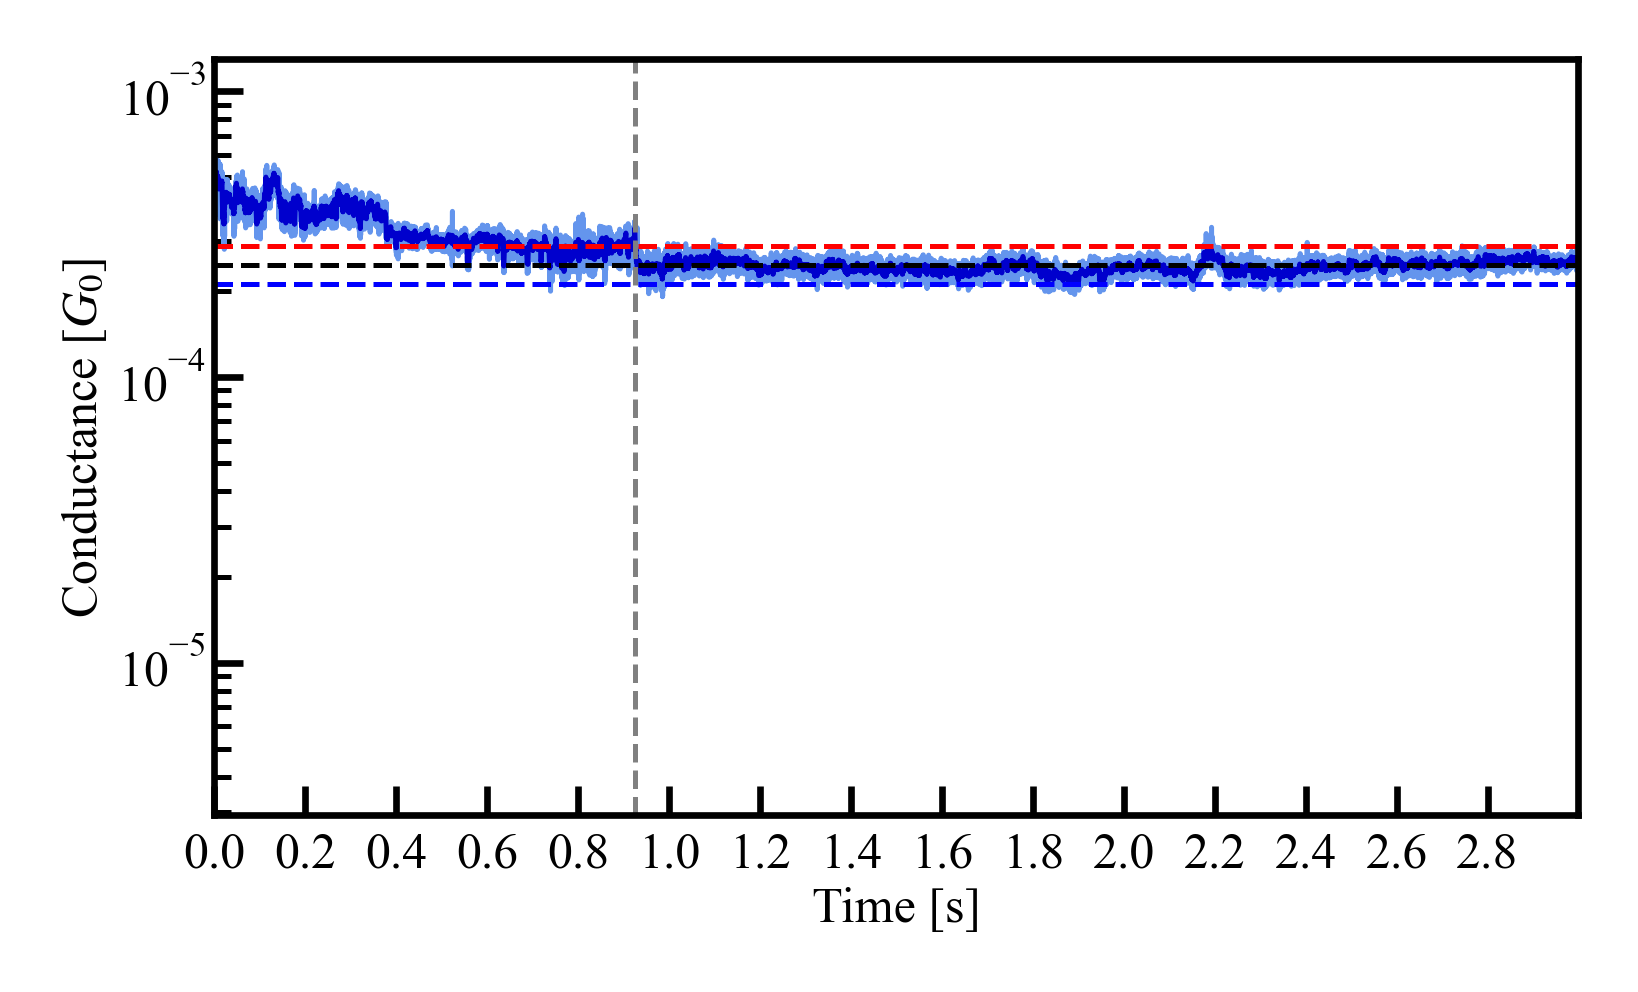

In [316]:
which_trace=16245

fig = plt.figure(figsize=utils.cm2inch(7.7, 4), dpi=600)  # figsize: (width, height) in inches

gs = gridspec.GridSpec(nrows=1, ncols=1,
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0, hspace=0)

ax = fig.add_subplot(gs[0])

w=50  # window size

ax.set_yscale('log')

trace_pair = TracePair(trace=which_trace, load_from=home_folder)
hold_trace = HoldTrace(trace=which_trace, load_from=home_folder,
                       bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                       sample_rate=trace_pair.sample_rate, min_step_len=0)

rolling_mean_pull = np.mean(np.array([np.log10(hold_trace.hold_conductance_pull[i:i+w]) for i in range(len(hold_trace.hold_conductance_pull)-w+1)]), axis=1)

end_avg = np.mean(rolling_mean_pull[-50_000:])

end_std = np.std(np.log10(hold_trace.hold_conductance_pull[hold_trace.hold_conductance_pull>0][-50_000:]))

print(end_std)
upper_lim = 10**(end_avg + 3 * end_std)
lower_lim = 10**(end_avg - 3 * end_std)

real_mean_pull = 10**rolling_mean_pull

cluster_val, cluster_elements, cluster_start = count_same(
    np.bitwise_and(np.where(np.sign(upper_lim - real_mean_pull) < 0, 0, np.sign(upper_lim - real_mean_pull)).astype(bool),
                   np.where(np.sign(real_mean_pull - lower_lim) < 0, 0, np.sign(real_mean_pull - lower_lim)).astype(bool)))

cross_point = cluster_start[np.bitwise_and(cluster_val, cluster_elements > 10_000)][0]
# relax_time_pull.append(cross_point/50_000)

# hold_time_pull.append((trace_pair.hold_index_pull - trace_pair.plateau_range_pull[1]) / trace_pair.sample_rate)

ax.plot(hold_trace.hold_conductance_pull, c='cornflowerblue', lw=0.6)
ax.plot(10**rolling_mean_pull, c='mediumblue', lw=0.6)

ax.axhline(10**np.mean(rolling_mean_pull[-50_000:]), lw=0.6, c='k', ls='--')
ax.axhline(upper_lim, c='red', lw=0.6, ls='--')
ax.axhline(lower_lim, c='b', lw=0.6, ls='--')


ax.axvline(cross_point, c='grey', lw=0.6, ls='--')

ax.set_xlim(0, 150_000)
ax.set_xticks(np.arange(0, 150_000, 10_000))
ax.set_xticklabels(np.arange(0, 150_000, 10_000)/50_000)
print(cross_point/50_000)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'Conductance [$G_{0}$]')

print(cluster_val, cluster_elements, cluster_start)

# plt.savefig(home_folder.joinpath('results/pull_relaxation.png'), bbox_inches='tight')

0.01870173
0.04998


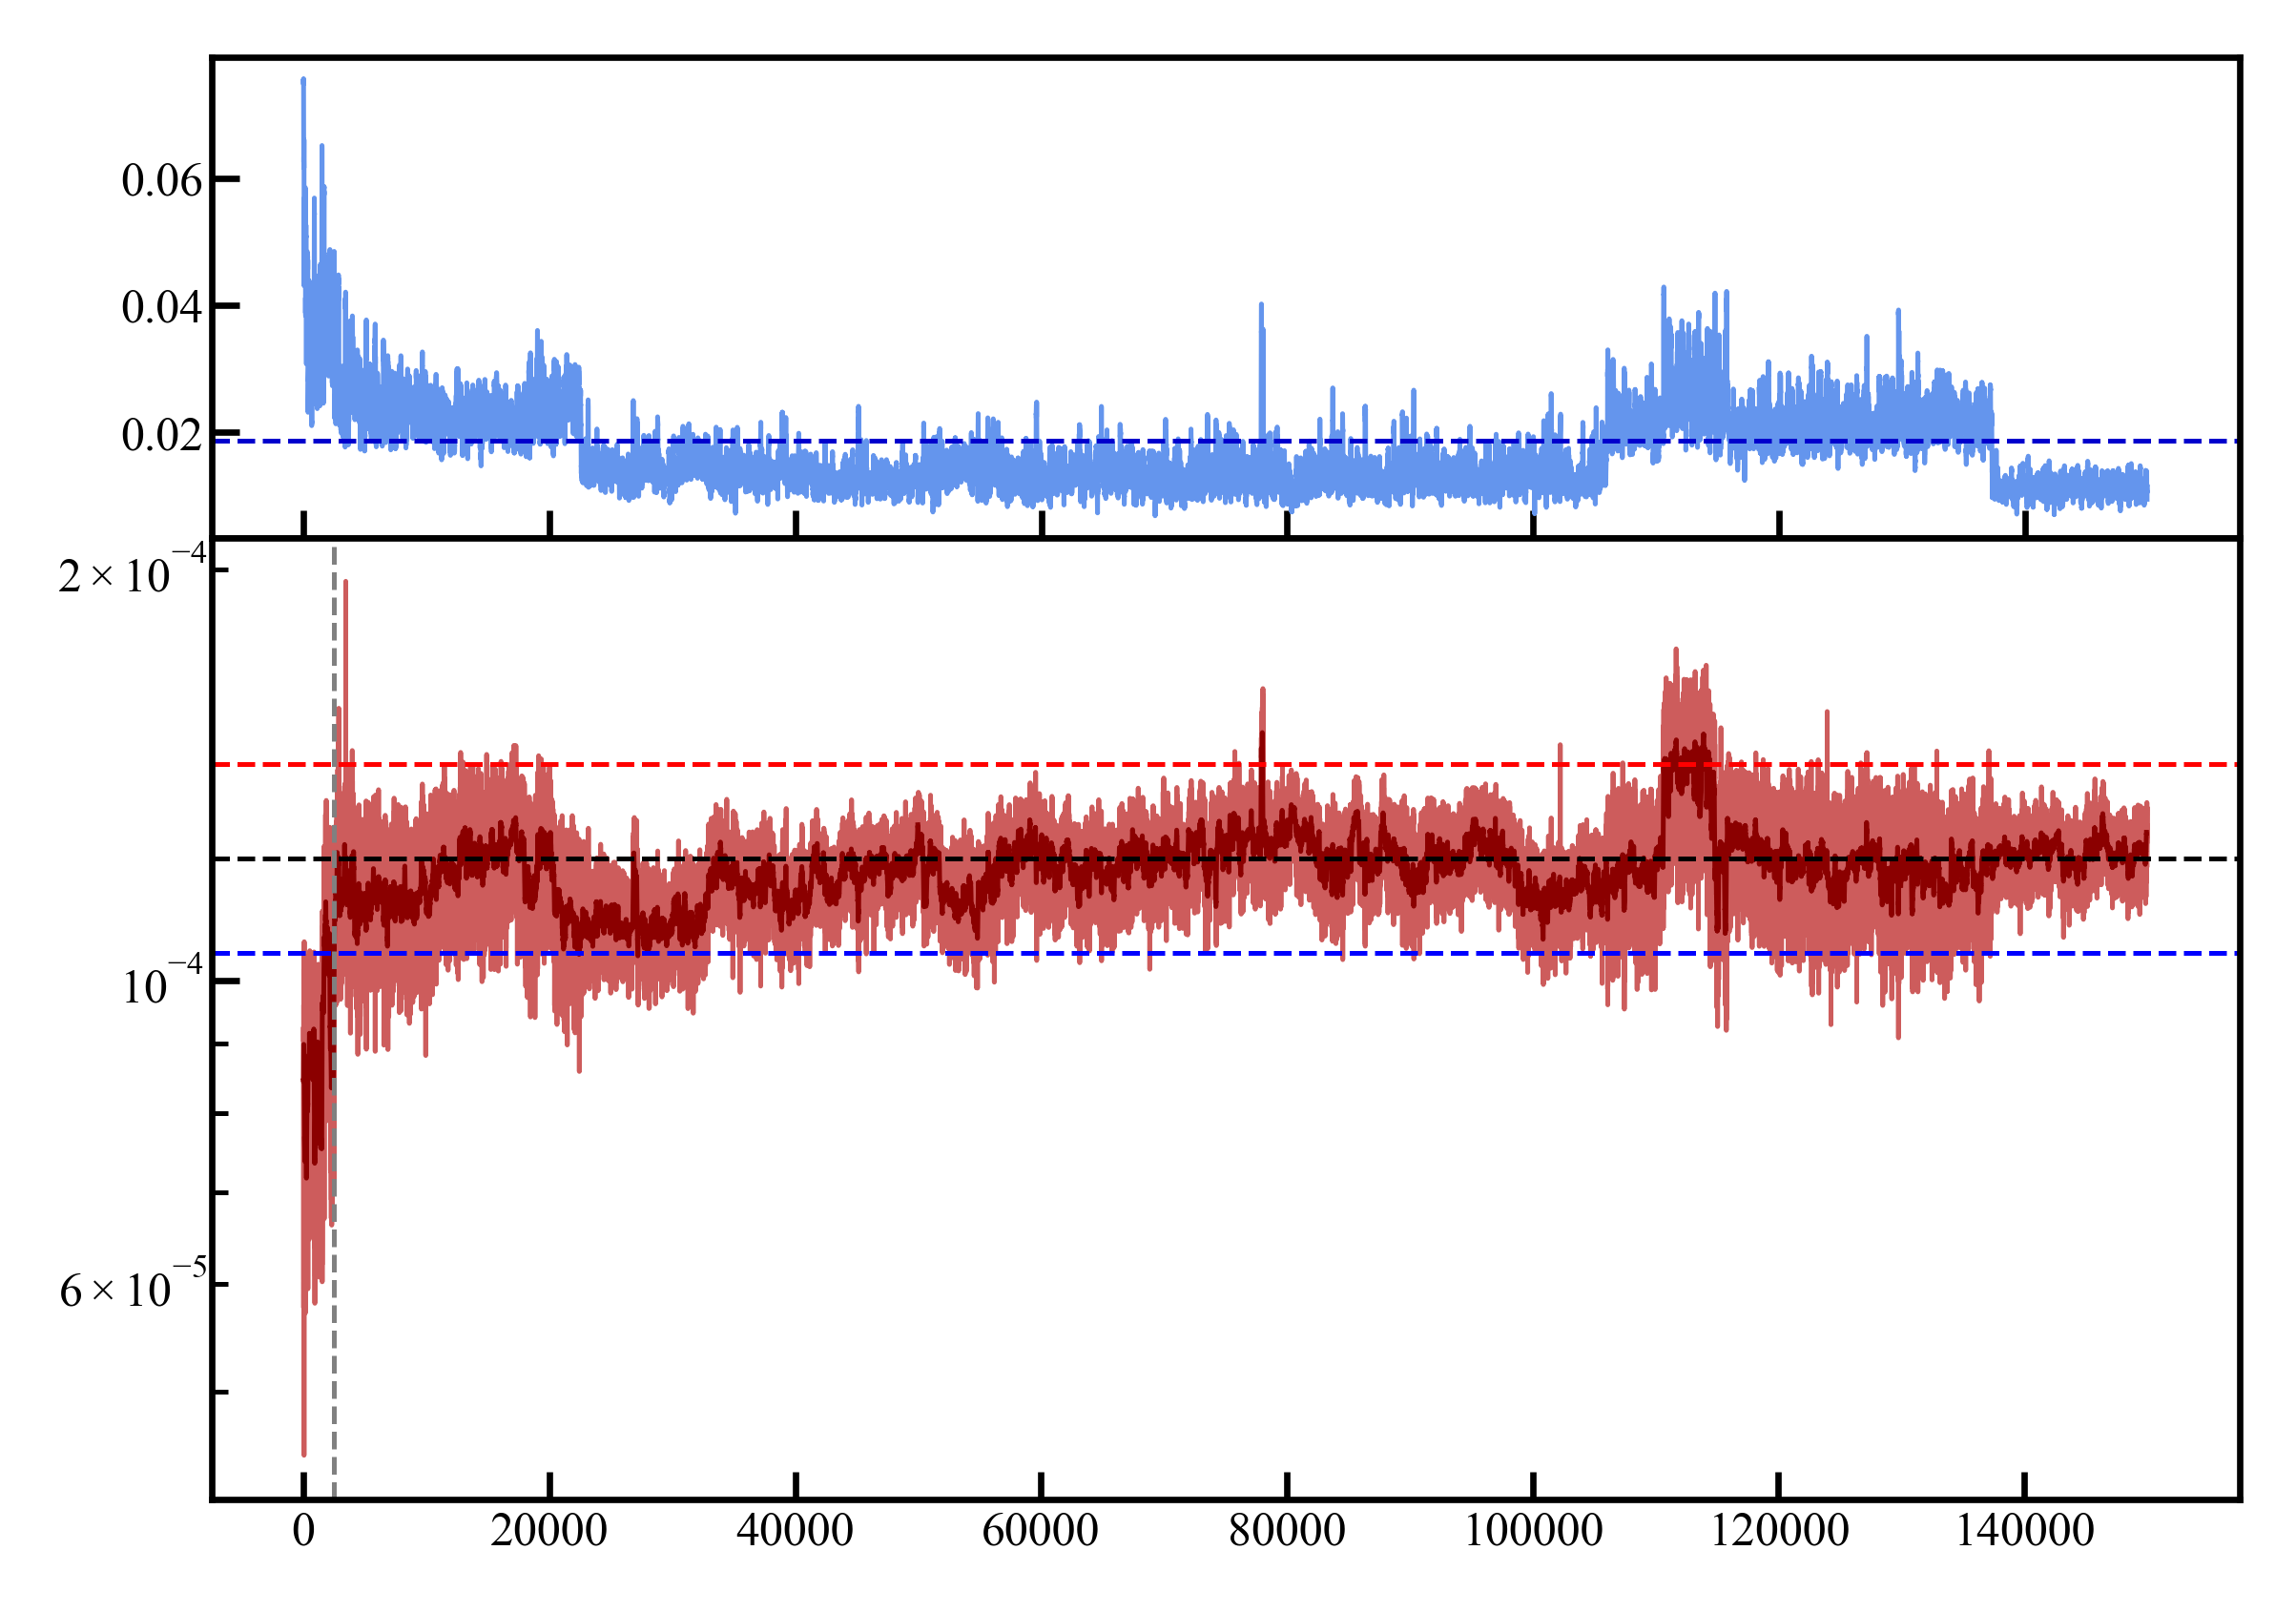

In [1071]:
fig = plt.figure(figsize=utils.cm2inch(12, 8), dpi=600)  # figsize: (width, height) in inches

gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 2),
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0, hspace=0)

ax_std = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

w=50  # window size

rolling_mean_push = np.mean(np.array([np.log10(hold_trace.hold_conductance_push[i:i+w]) for i in range(len(hold_trace.hold_conductance_push)-w+1)]), axis=1)
rolling_std_push = np.std(np.array([np.log10(hold_trace.hold_conductance_push[i:i+w]) for i in range(len(hold_trace.hold_conductance_push)-w+1)]), axis=1)

# ax.set_ylim(1e-5, 1e-2)
ax.set_yscale('log')

ax.plot(hold_trace.hold_conductance_push, c='indianred', lw=0.6)
ax.plot(10**rolling_mean_push, c='darkred', lw=0.6)
# ax.plot(10**(rolling_mean_push+5*rolling_std_push), c='red', lw=0.6)
# ax.plot(10**(rolling_mean_push-5*rolling_std_push), c='blue', lw=0.6)

ax_std.plot(rolling_std_push, c='cornflowerblue', lw=0.6)
ax_std.axhline(np.mean(rolling_std_push[-50_000:]), lw=0.6, c='mediumblue', ls='--')
# ax_std.axhline(5*np.mean(rolling_std_push[-50_000:]))
print(np.mean(rolling_std_push[-50_000:]))

# upper_lim = 10**(np.mean(rolling_mean_push[-50_000:]) + 10*np.mean(rolling_std_push[-50_000:]))
# lower_lim = 10**(np.mean(rolling_mean_push[-50_000:]) - 10*np.mean(rolling_std_push[-50_000:]))

upper_lim = 10**(np.mean(rolling_mean_push[-50_000:]) + 2*np.std(np.log10(hold_trace.hold_conductance_push[hold_trace.hold_conductance_push>0])))
lower_lim = 10**(np.mean(rolling_mean_push[-50_000:]) - 2*np.std(np.log10(hold_trace.hold_conductance_push[hold_trace.hold_conductance_push>0])))

ax.axhline(10**np.mean(rolling_mean_push[-50_000:]), lw=0.6, c='k', ls='--')
ax.axhline(upper_lim, c='red', lw=0.6, ls='--')
ax.axhline(lower_lim, c='b', lw=0.6, ls='--')

# cross_point = np.nonzero(np.bitwise_and(10**rolling_mean_push < upper_lim, 10**rolling_mean_push > lower_lim))[0][0]

cluster_val, cluster_elements, cluster_start = count_same(
    np.bitwise_and(np.where(np.sign(upper_lim - 10**rolling_mean_push) < 0, 0, np.sign(upper_lim - 10**rolling_mean_push)).astype(bool),
                   np.where(np.sign(10**rolling_mean_push - lower_lim) < 0, 0, np.sign(10**rolling_mean_push - lower_lim)).astype(bool)))

cross_point = cluster_start[np.bitwise_and(cluster_val, cluster_elements > 10_000)][0]
ax.axvline(cross_point, c='grey', lw=0.6, ls='--')
print(cross_point/50_000)

In [911]:
pull_blocks = np.unique(np.array(list(map(utils.convert_to_block_and_trace_num, did_not_break_pull)))[:,0])
push_blocks = np.unique(np.array(list(map(utils.convert_to_block_and_trace_num, did_not_break_push)))[:,0])

In [1072]:
pull_dict = {}
push_dict = {}

for i in did_not_break_pull:
    block_num, _ = utils.convert_to_block_and_trace_num(i)
    if block_num in pull_dict.keys():
        pull_dict[block_num].append(i)
    else:
        pull_dict[block_num] = [i]
        
for i in did_not_break_push:
    block_num, _ = utils.convert_to_block_and_trace_num(i)
    if block_num in push_dict.keys():
        push_dict[block_num].append(i)
    else:
        push_dict[block_num] = [i]

In [942]:
list(pull_dict.keys())[:10]

[81, 82, 83, 84, 85, 86, 87, 88, 89, 90]

In [1073]:
relax_time_pull = []
relax_time_push = []
hold_time_pull = []
hold_time_push = []

keys_list = list(pull_dict.keys())[:10]
w=50

for file_num in tqdm(pull_dict.keys(), desc="Pull"):
    hold_file = home_folder.joinpath(f'hold_data_{file_num}.h5')
    bj_file = home_folder.joinpath(re.sub(r'hold_data', r'break_junction', hold_file.name))
    with h5py.File(bj_file, "r") as bj_in:
        with h5py.File(hold_file, "r") as hold_in:
            for which_trace in pull_dict[file_num]:
                trace_pair = TracePair(trace=which_trace, load_from=bj_in)
                hold_trace = HoldTrace(trace=which_trace, load_from=hold_in,
                                       bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                                       sample_rate=trace_pair.sample_rate, min_step_len=0)

                rolling_mean_pull = np.mean(np.array([np.log10(hold_trace.hold_conductance_pull[i:i+w]) for i in range(len(hold_trace.hold_conductance_pull)-w+1)]), axis=1)
                
                end_avg = np.mean(rolling_mean_pull[-50_000:])
                
                end_std = np.std(np.log10(hold_trace.hold_conductance_pull[hold_trace.hold_conductance_pull>0][-50_000:]))
                                  
                upper_lim = 10**(end_avg + 3 * end_std)
                lower_lim = 10**(end_avg - 3 * end_std)
                
                real_mean_pull = 10**rolling_mean_pull
                
                cluster_val, cluster_elements, cluster_start = count_same(
                    np.bitwise_and(np.where(np.sign(upper_lim - real_mean_pull) < 0, 0, np.sign(upper_lim - real_mean_pull)).astype(bool),
                                   np.where(np.sign(real_mean_pull - lower_lim) < 0, 0, np.sign(real_mean_pull - lower_lim)).astype(bool)))

                cross_point = cluster_start[np.bitwise_and(cluster_val, cluster_elements > 10_000)][0]
                relax_time_pull.append(cross_point/50_000)

                hold_time_pull.append((trace_pair.hold_index_pull - trace_pair.plateau_range_pull[1]) / trace_pair.sample_rate)

for file_num in tqdm(push_dict.keys(), desc="Push"):
    hold_file = home_folder.joinpath(f'hold_data_{file_num}.h5')
    bj_file = home_folder.joinpath(re.sub(r'hold_data', r'break_junction', hold_file.name))
    with h5py.File(bj_file, "r") as bj_in:
        with h5py.File(hold_file, "r") as hold_in:
            for which_trace in push_dict[file_num]:
                trace_pair = TracePair(trace=which_trace, load_from=bj_in)
                hold_trace = HoldTrace(trace=which_trace, load_from=hold_in,
                                       bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                                       sample_rate=trace_pair.sample_rate, min_step_len=0)

                rolling_mean_push = np.mean(np.array([np.log10(hold_trace.hold_conductance_push[i:i+w]) for i in range(len(hold_trace.hold_conductance_push)-w+1)]), axis=1)
                
                end_avg = np.mean(rolling_mean_push[-50_000:])
                
                end_std = np.std(np.log10(hold_trace.hold_conductance_push[hold_trace.hold_conductance_push>0][-50_000:]))
                                  
                upper_lim = 10**(end_avg + 3 * end_std)
                lower_lim = 10**(end_avg - 3 * end_std)
                
                real_mean_push = 10**rolling_mean_push
                
                cluster_val, cluster_elements, cluster_start = count_same(
                    np.bitwise_and(np.where(np.sign(upper_lim - real_mean_push) < 0, 0, np.sign(upper_lim - real_mean_push)).astype(bool),
                                   np.where(np.sign(real_mean_push - lower_lim) < 0, 0, np.sign(real_mean_push - lower_lim)).astype(bool)))

                cross_point = cluster_start[np.bitwise_and(cluster_val, cluster_elements > 10_000)][0]
                relax_time_push.append(cross_point/50_000)

                hold_time_push.append((trace_pair.hold_index_push - trace_pair.plateau_range_push[1]) / trace_pair.sample_rate)
    
relax_time_pull = np.array(relax_time_pull)
relax_time_push = np.array(relax_time_push)
hold_time_pull = np.array(hold_time_pull)
# hold_time_push = np.array(hold_time_push)

Pull:   0%|          | 0/150 [00:00<?, ?it/s]

C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_16108/885052366.py:20: RuntimeWarning: invalid value encountered in log10
  rolling_mean_pull = np.mean(np.array([np.log10(hold_trace.hold_conductance_pull[i:i+w]) for i in range(len(hold_trace.hold_conductance_pull)-w+1)]), axis=1)


Push:   0%|          | 0/151 [00:00<?, ?it/s]

C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_16108/885052366.py:51: RuntimeWarning: invalid value encountered in log10
  rolling_mean_push = np.mean(np.array([np.log10(hold_trace.hold_conductance_push[i:i+w]) for i in range(len(hold_trace.hold_conductance_push)-w+1)]), axis=1)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [1074]:
np.unique(relax_time_pull)

array([0.00000e+00, 4.00000e-05, 8.00000e-05, ..., 2.36652e+00,
       2.37122e+00, 2.58318e+00])

In [1075]:
print(len(relax_time_pull))

5557


(0.0, 436.8)

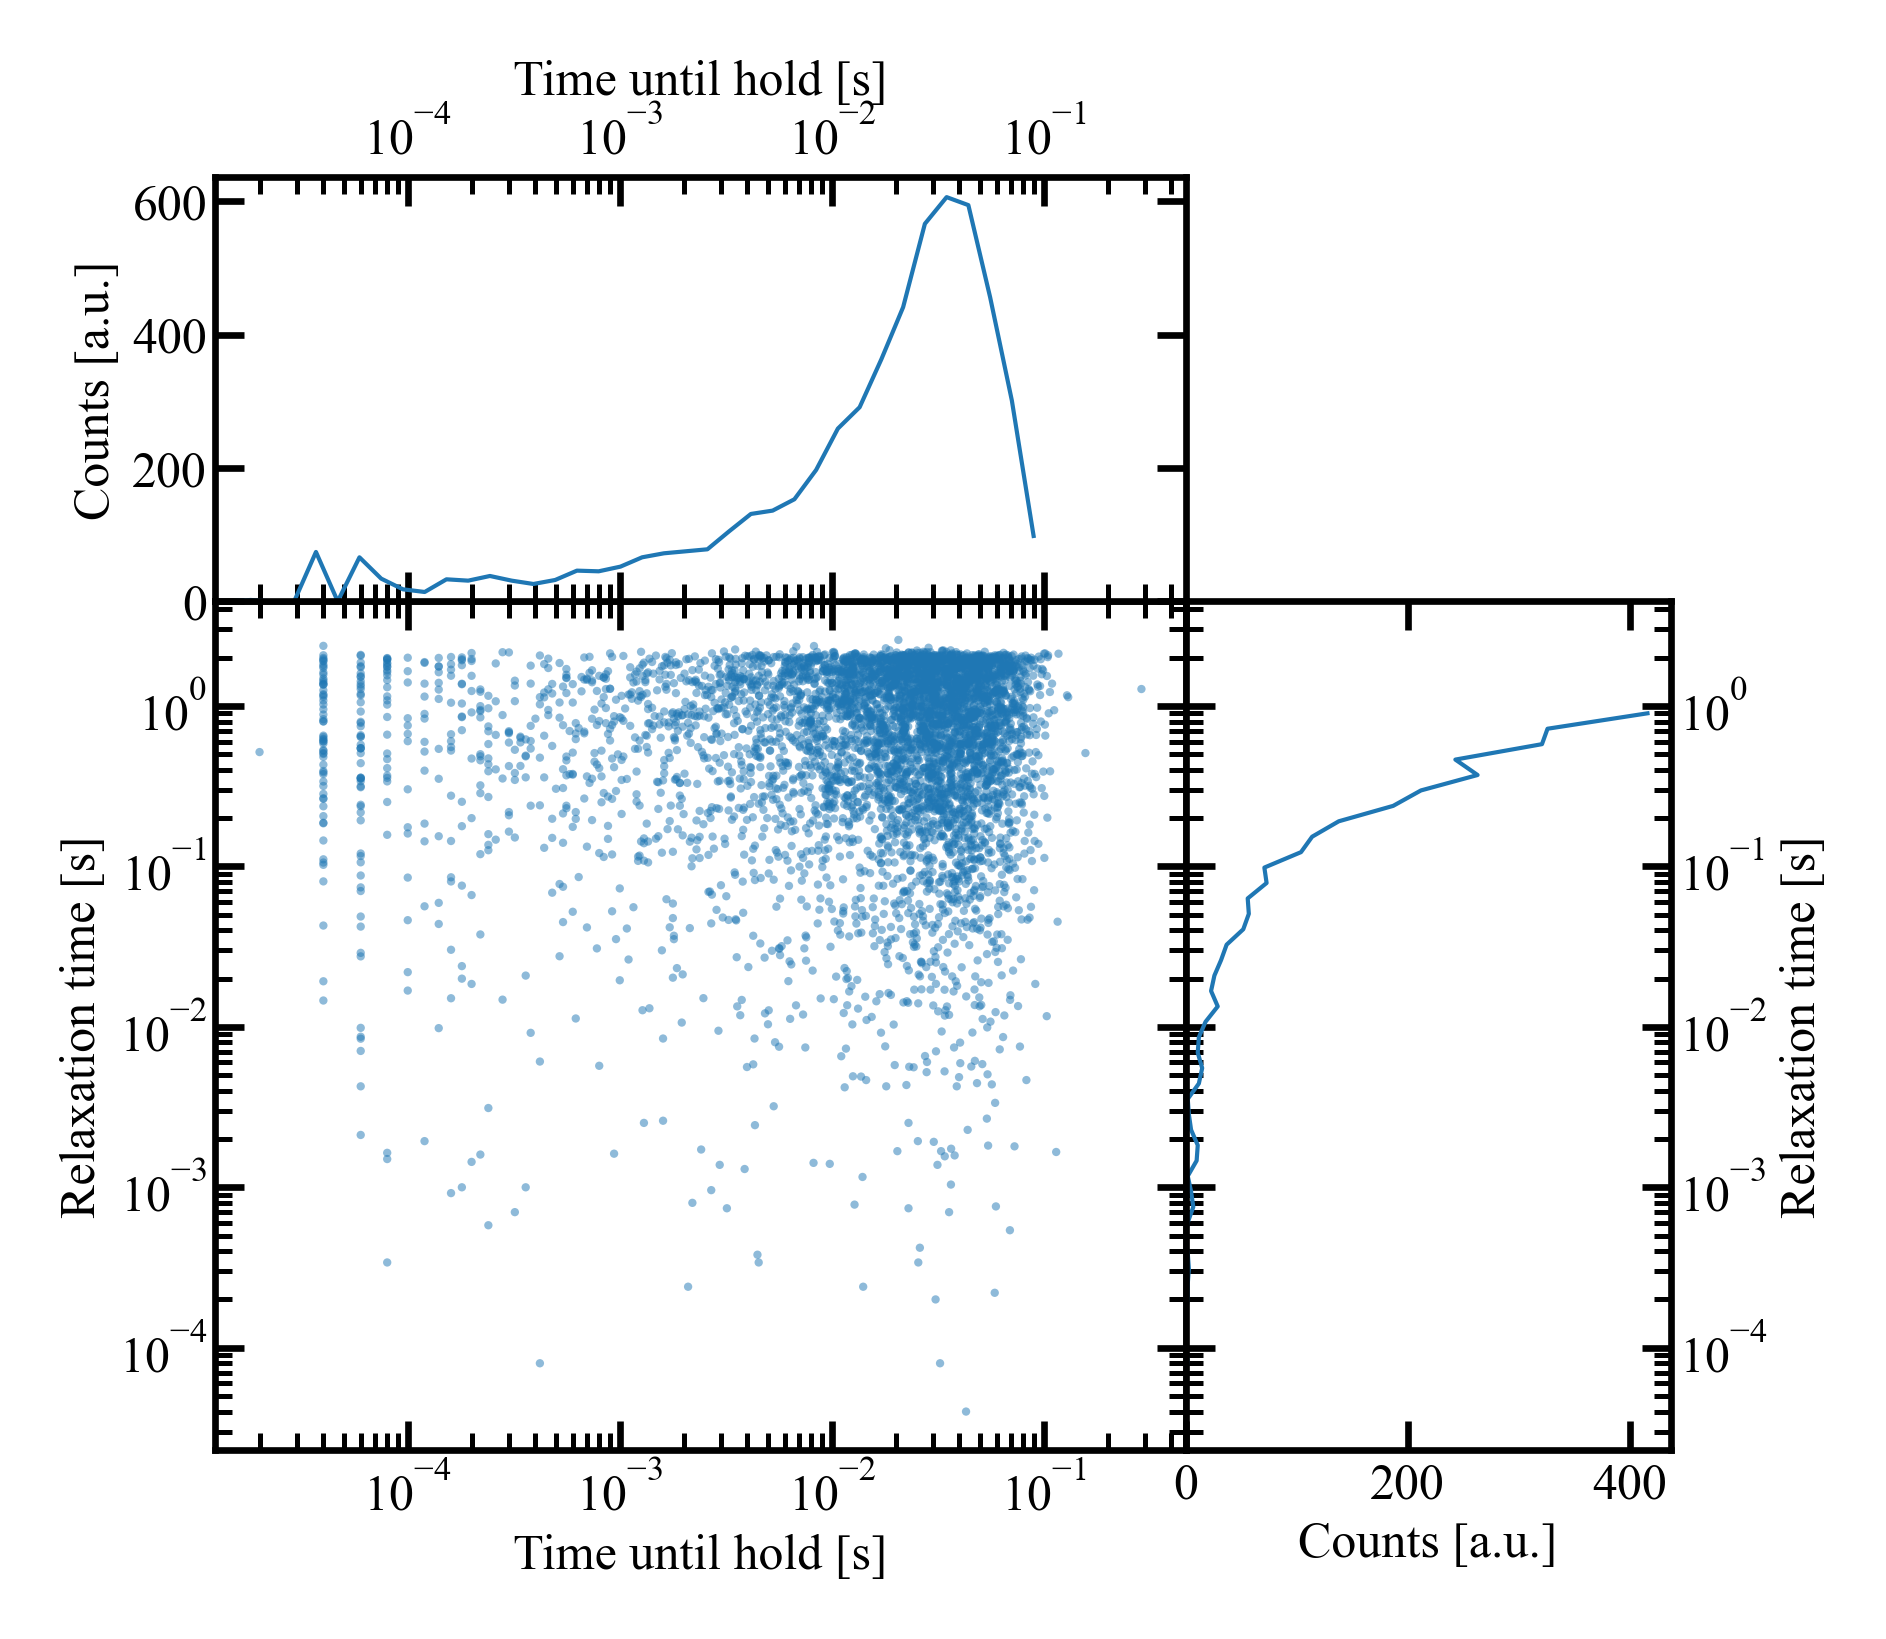

In [1076]:
fig = plt.figure(figsize=utils.cm2inch(7.7, 7.7), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=(1, 2), width_ratios=(2, 1),
                             figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0, hspace=0)


ax_scatter = fig.add_subplot(gs_total[1, 0])
ax_hold_time = fig.add_subplot(gs_total[0, 0], sharex=ax_scatter)
ax_relax_time = fig.add_subplot(gs_total[1, 1], sharey=ax_scatter)

ax_hold_time.xaxis.tick_top()
ax_hold_time.xaxis.set_label_position('top')
ax_hold_time.xaxis.set_ticks_position('both')
ax_hold_time.yaxis.set_ticks_position('both')

ax_scatter.xaxis.set_ticks_position('both')
ax_scatter.yaxis.set_ticks_position('both')

ax_relax_time.xaxis.set_ticks_position('both')
ax_relax_time.yaxis.tick_right()
ax_relax_time.yaxis.set_label_position('right')
ax_relax_time.yaxis.set_ticks_position('both')

ax_scatter.scatter(hold_time_pull, relax_time_pull, s=1, alpha=0.5, ec=None)
# ax_scatter.set_xlim(-0.005)
# ax_scatter.set_ylim(-0.05)

bins_hold, single_hist_hold = utils.calc_hist_1d_single(data=hold_time_pull,
                                                        xrange=(1e-5, 0.1), xbins_num=10, log_scale=True)
bins_relax, single_hist_relax = utils.calc_hist_1d_single(data=relax_time_pull,
                                                          xrange=(1e-5, 2), xbins_num=10, log_scale=True)

ax_scatter.set_xlabel('Time until hold [s]')
ax_scatter.set_ylabel('Relaxation time [s]')

ax_scatter.set_xscale('log')
ax_scatter.set_yscale('log')

ax_hold_time.set_xlabel('Time until hold [s]')
ax_hold_time.set_ylabel('Counts [a.u.]')

ax_relax_time.set_xlabel('Counts [a.u.]')
ax_relax_time.set_ylabel('Relaxation time [s]')

ax_hold_time.plot(bins_hold, single_hist_hold, lw=0.5)
ax_relax_time.plot(single_hist_relax, bins_relax, lw=0.5)

ax_hold_time.set_ylim(0)
ax_relax_time.set_xlim(0)

In [1079]:
type(relax_time_pull)

list

In [1084]:
len(did_not_break_pull[np.array(relax_time_pull) < 0.5])

2588

C:\Users\ANDRS~1\AppData\Local\Temp/ipykernel_16108/3514977097.py:19: RuntimeWarning: invalid value encountered in log10
  rolling_mean_pull = np.mean(np.array([np.log10(hold_trace.hold_conductance_pull[i:i+w]) for i in range(len(hold_trace.hold_conductance_pull)-w+1)]), axis=1)


0.20198719
0.0
[ True] [149953] [0]


(1e-05, 0.1)

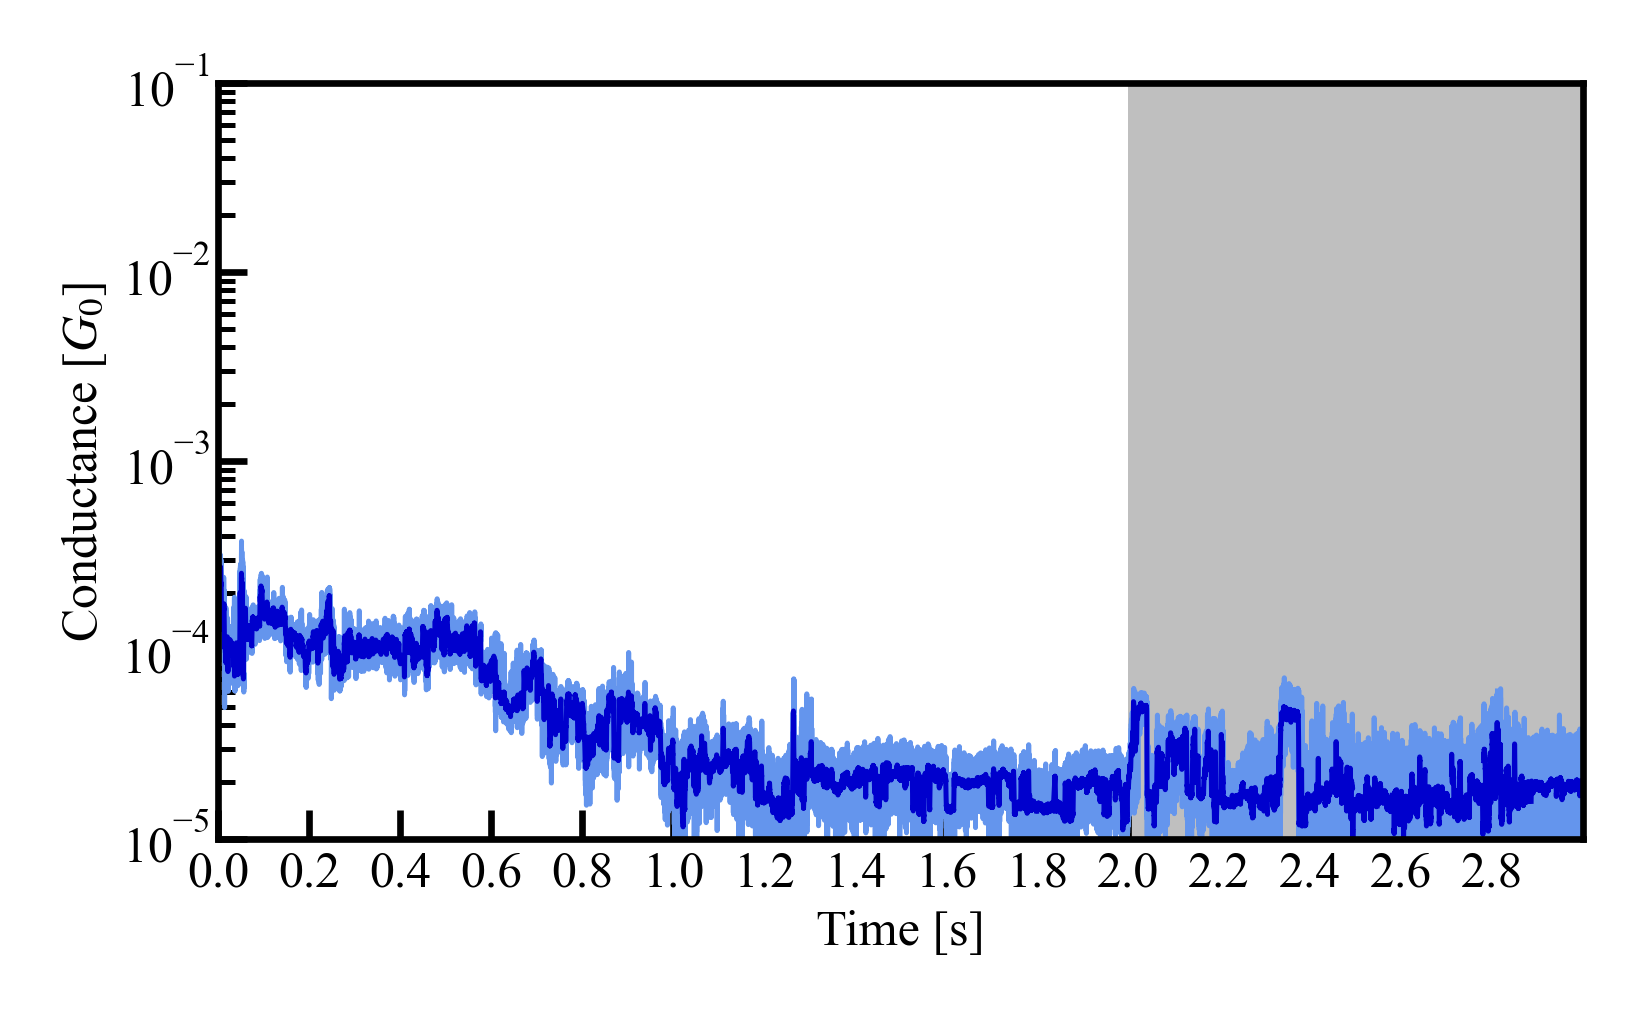

In [1096]:
which_trace=np.random.choice(did_not_break_pull[np.array(relax_time_pull) < 0.5])

fig = plt.figure(figsize=utils.cm2inch(7.7, 4), dpi=600)  # figsize: (width, height) in inches

gs = gridspec.GridSpec(nrows=1, ncols=1,
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0, hspace=0)

ax = fig.add_subplot(gs[0])

w=50  # window size

ax.set_yscale('log')

trace_pair = TracePair(trace=which_trace, load_from=home_folder)
hold_trace = HoldTrace(trace=which_trace, load_from=home_folder,
                       bias_offset=0, r_serial_ohm=trace_pair.R_serial,
                       sample_rate=trace_pair.sample_rate, min_step_len=0)

rolling_mean_pull = np.mean(np.array([np.log10(hold_trace.hold_conductance_pull[i:i+w]) for i in range(len(hold_trace.hold_conductance_pull)-w+1)]), axis=1)

end_avg = np.mean(rolling_mean_pull[-50_000:])

end_std = np.std(np.log10(hold_trace.hold_conductance_pull[hold_trace.hold_conductance_pull>0][-50_000:]))

print(end_std)
upper_lim = 10**(end_avg + 3 * end_std)
lower_lim = 10**(end_avg - 3 * end_std)

real_mean_pull = 10**rolling_mean_pull

cluster_val, cluster_elements, cluster_start = count_same(
    np.bitwise_and(np.where(np.sign(upper_lim - real_mean_pull) < 0, 0, np.sign(upper_lim - real_mean_pull)).astype(bool),
                   np.where(np.sign(real_mean_pull - lower_lim) < 0, 0, np.sign(real_mean_pull - lower_lim)).astype(bool)))

cross_point = cluster_start[np.bitwise_and(cluster_val, cluster_elements > 10_000)][0]
# relax_time_pull.append(cross_point/50_000)

# hold_time_pull.append((trace_pair.hold_index_pull - trace_pair.plateau_range_pull[1]) / trace_pair.sample_rate)

ax.plot(hold_trace.hold_conductance_pull, c='cornflowerblue', lw=0.6)
ax.plot(10**rolling_mean_pull, c='mediumblue', lw=0.6)

ax.axhline(10**np.mean(rolling_mean_pull[-50_000:]), lw=0.6, c='k', ls='--')
ax.axhline(upper_lim, c='red', lw=0.6, ls='--')
ax.axhline(lower_lim, c='b', lw=0.6, ls='--')


ax.axvline(cross_point, c='grey', lw=0.6, ls='--')

ax.set_xlim(0, 150_000)
ax.set_xticks(np.arange(0, 150_000, 10_000))
ax.set_xticklabels(np.arange(0, 150_000, 10_000)/50_000)
print(cross_point/50_000)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'Conductance [$G_{0}$]')

ax.axvspan(len(hold_trace.hold_conductance_pull)-50_000, len(hold_trace.hold_conductance_pull), color='grey', alpha=0.5, ec=None)

# print(cluster_val, cluster_elements, cluster_start)

ax.set_ylim(1e-5, 1e-1)

# plt.savefig(home_folder.joinpath('results/pull_relaxation.png'), bbox_inches='tight')

In [65]:
which_trace = 16245
# which_trace = np.random.choice(in_both)
print(which_trace)
hold_trace = HoldTrace(f'trace_{which_trace}', load_from=home_folder, bias_offset=0,
                       r_serial_ohm=99_900, min_step_len=20_000, min_height=1)

16245


D:\mcbj_stmbj\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\mcbj_stmbj\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\mcbj_stmbj\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\mcbj_stmbj\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\mcbj_stmbj\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\mcbj_stmbj\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, m

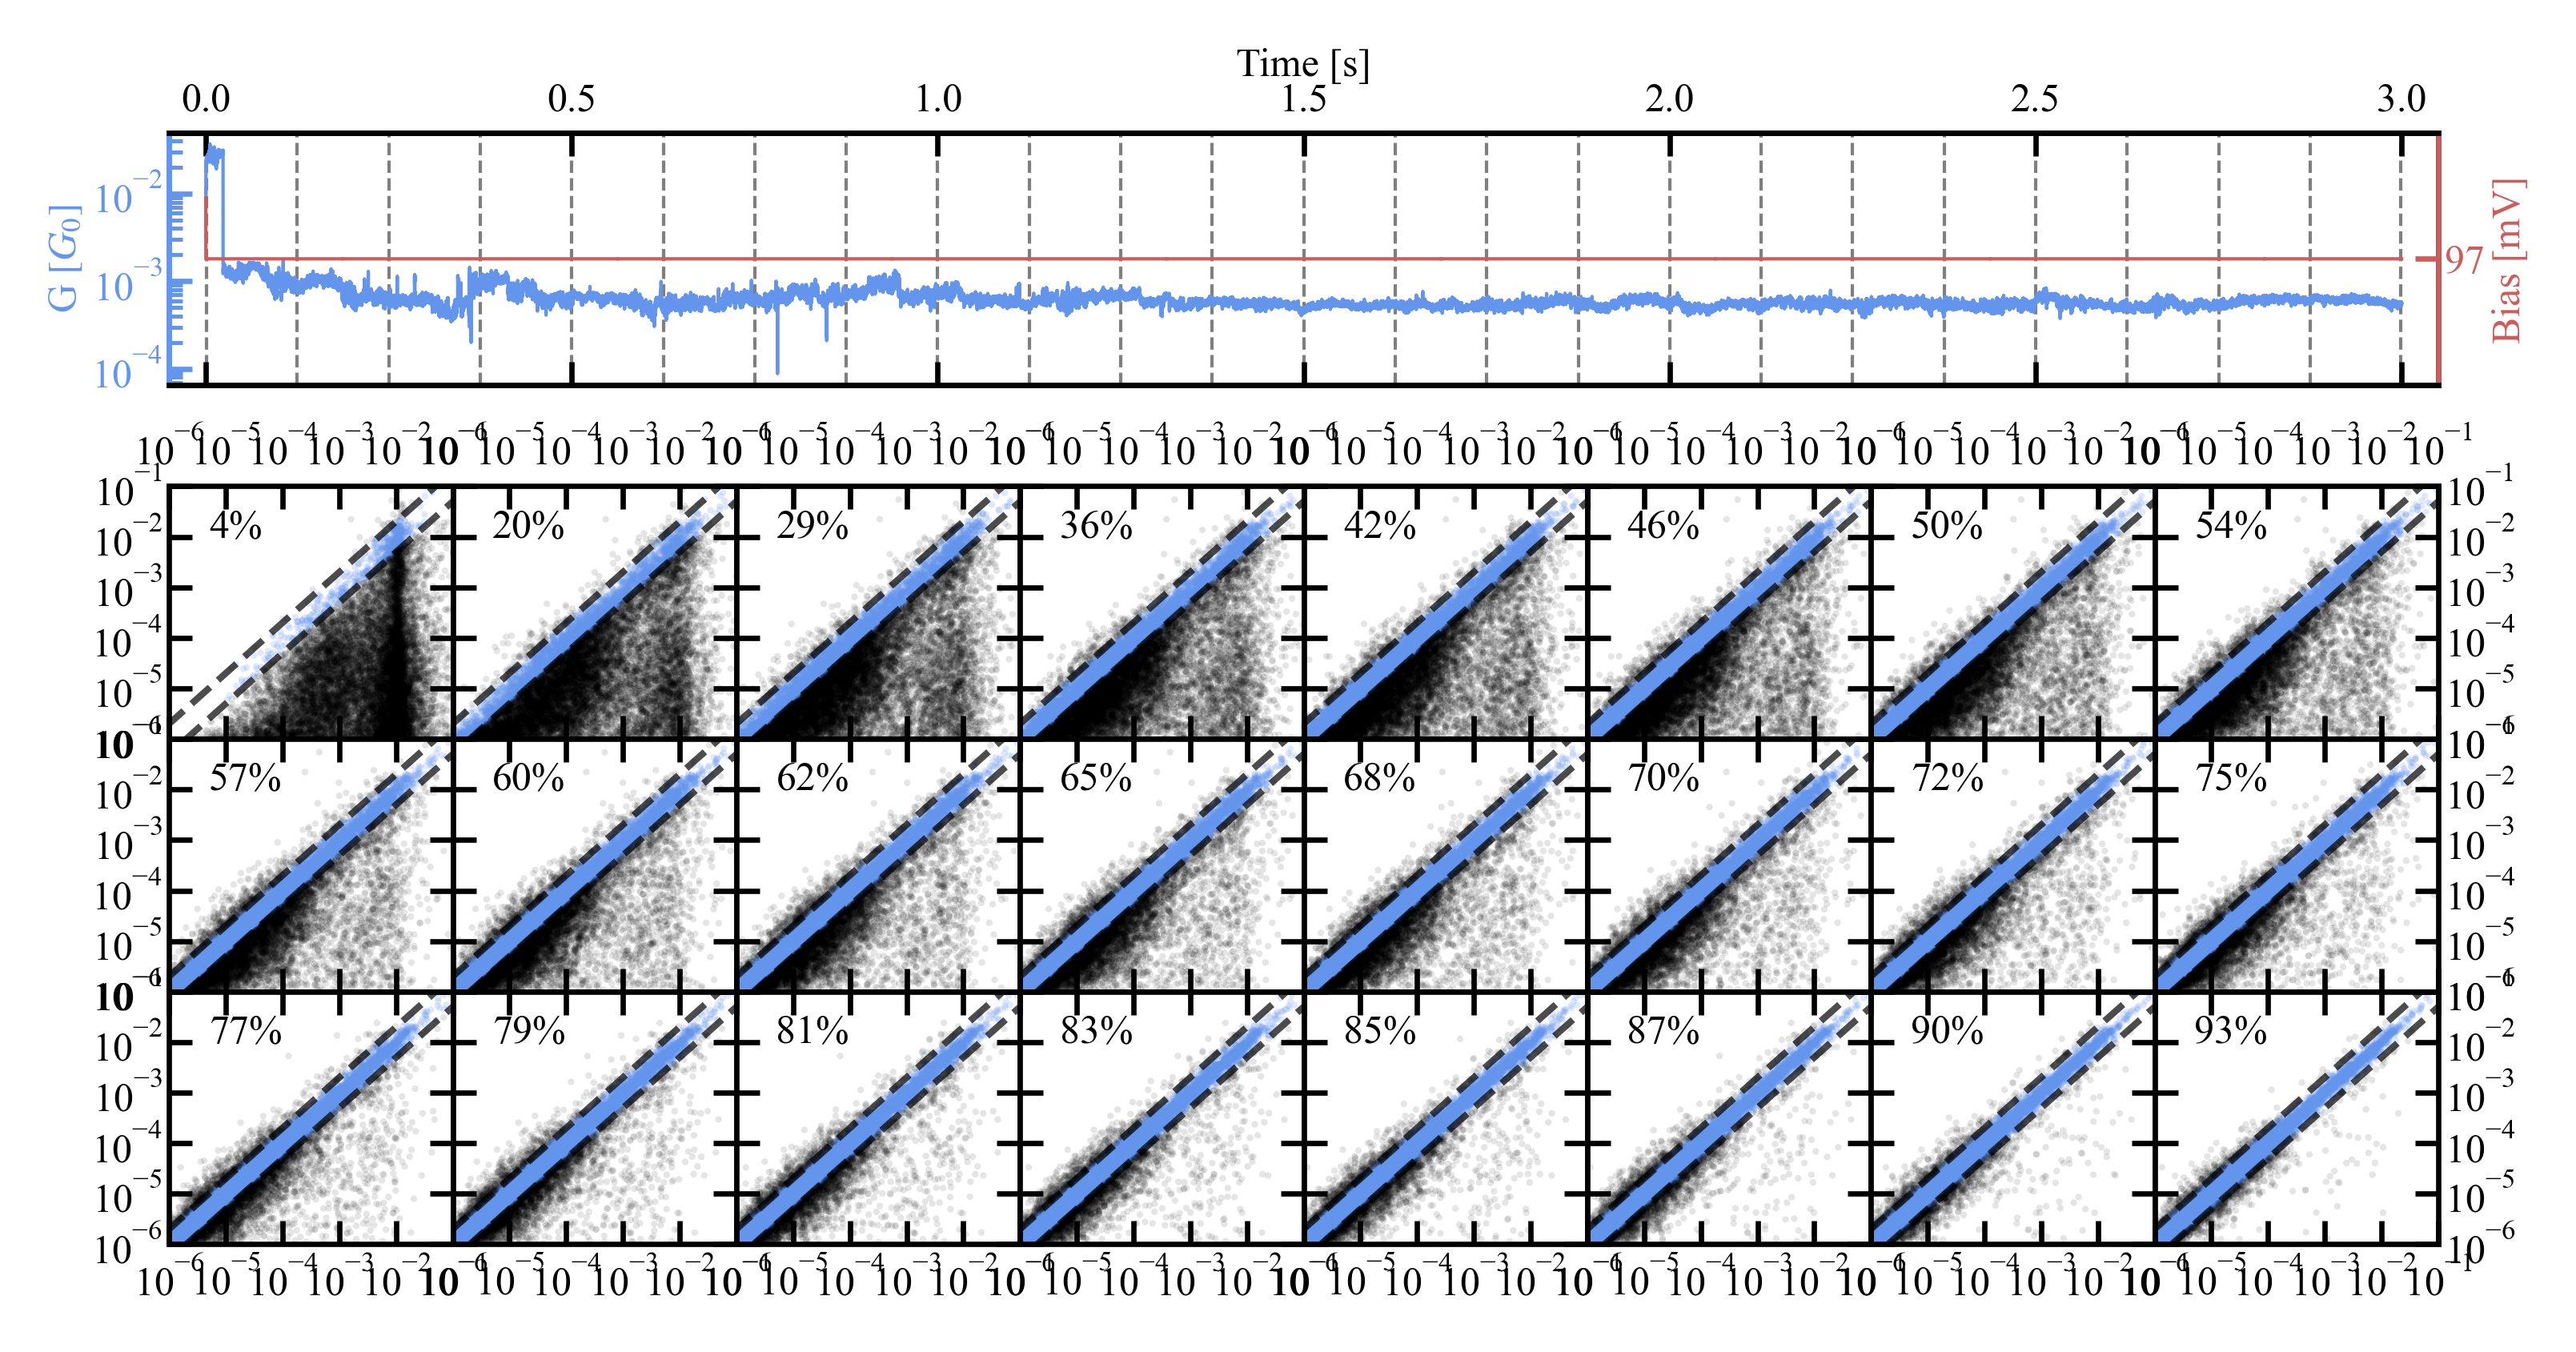

In [291]:
fig = plt.figure(figsize=utils.cm2inch(15, 8.4), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 3),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.1, hspace=0.2)

ax_hold_pull = fig.add_subplot(gs_total[0])

smoothing = 10
main_colors = ('cornflowerblue', 'indianred')
accent_colors = ('mediumblue', 'darkred')
ylim = (1e-6, 10)

gs_pull = gridspec.GridSpecFromSubplotSpec(nrows=3, ncols=8,
                                           subplot_spec=gs_total[1], wspace=0, hspace=0)

ax_hold_pull, par_pull = hold_trace.plot_hold_traces(plot_step_ranges=False, plot_psd_intervals=False, conductance=True,
                                           ax=ax_hold_pull, ax_colors=main_colors,
                                           add_vlines=np.mean(hold_trace.test_intervals_pull, axis=1)/50_000)
ax_hold_pull.xaxis.tick_top()
ax_hold_pull.xaxis.set_label_position('top')
ax_hold_pull.xaxis.set_ticks_position('both')

ax_hold_pull.set_yscale('log')
ax_hold_pull.set_xlim(-0.05, 3.05)
which_cols = np.array(list(conductance_stat_pull.columns[-25:-1])).reshape(3, 8)
ratios_pull = []

for i, row in enumerate(which_cols):
    for j, col in enumerate(row):
        ax = fig.add_subplot(gs_pull[i, j])
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        if j == 7:
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
            ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        if i == 0:
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position('top')
            ax.xaxis.set_ticks_position('both')
            ax.yaxis.set_ticks_position('both')
        indices = np.array(conductance_stat_pull[:][
            abs(np.log10(conductance_stat_pull['G_avgs_25'] / conductance_stat_pull[col])) < np.log10(2)].index)
        not_indices = conductance_stat_pull.index.difference(indices)
        
        perc = round(len(indices)/conductance_stat_pull['trace_index'].count()*100)
        ratios_pull.append(perc)
        
        ax.text(5e-6, 1e-2, s=str(perc)+'%', size=6)
        ax.scatter(conductance_stat_pull[col][indices], conductance_stat_pull['G_avgs_25'][indices],
                         alpha=0.2, c='cornflowerblue', edgecolor='None', s=1)
        ax.scatter(conductance_stat_pull[col][not_indices], conductance_stat_pull['G_avgs_25'][not_indices],
                         alpha=0.1, c='k', edgecolor='None', s=1)

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(1e-6, 0.1)
        ax.set_ylim(1e-6, 0.1)
        ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=6))
        ax.xaxis.set_minor_formatter(ticker.NullFormatter())
        ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=6))
        ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.1), numticks=1))
        ax.yaxis.set_minor_formatter(ticker.NullFormatter())
        
        if j>0 and j<7:
            ax.yaxis.set_ticklabels([])
        if i>0 and i<2:
            ax.xaxis.set_ticklabels([])
            
        ax.plot(np.logspace(-7, 0, num=10, base=10), 2*np.logspace(-7, 0, num=10, base=10), c='k', ls='--', lw=1, alpha=0.7)
        ax.plot(2*np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--', lw=1, alpha=0.7)

plt.savefig(home_folder.joinpath(f'results/article/scatter_plots_pull_{which_trace}.png'))

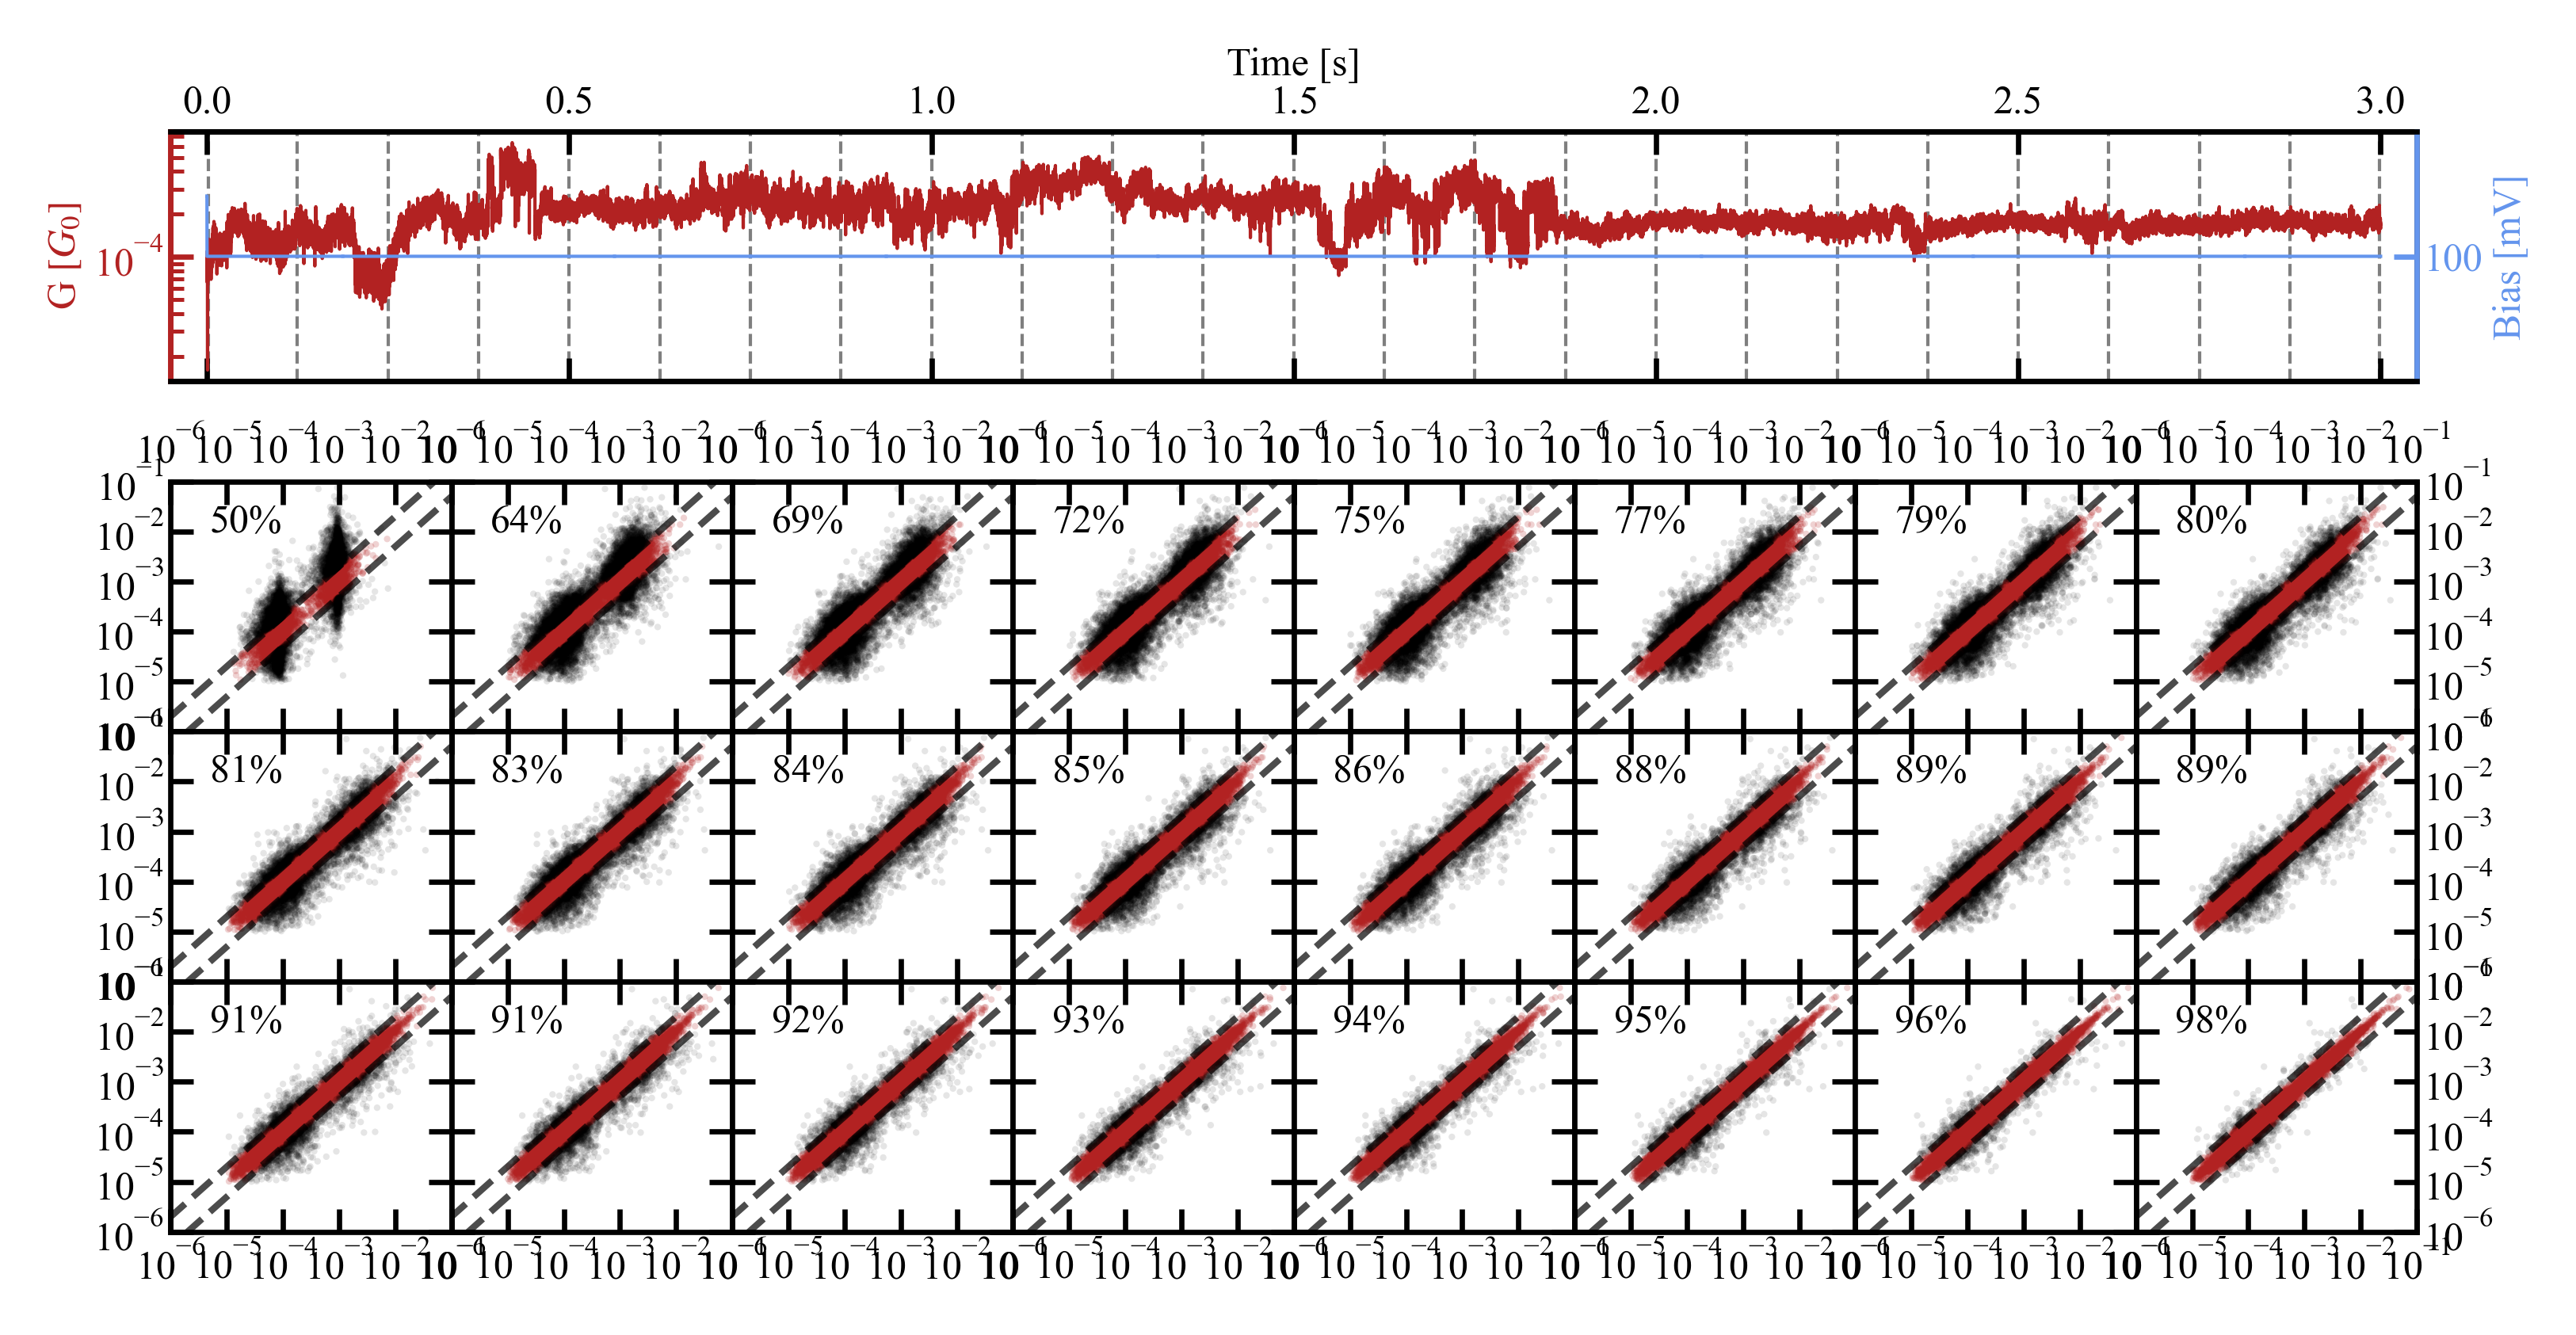

In [33]:
fig = plt.figure(figsize=utils.cm2inch(15, 8.4), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 3),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.1, hspace=0.2)

ax_hold_push = fig.add_subplot(gs_total[0])

smoothing = 10
main_colors = ('cornflowerblue', 'indianred')
accent_colors = ('mediumblue', 'darkred')
ylim = (1e-6, 10)

gs_push = gridspec.GridSpecFromSubplotSpec(nrows=3, ncols=8,
                                           subplot_spec=gs_total[1], wspace=0, hspace=0)

ax_hold_push, par_push = hold_trace.plot_hold_traces(plot_step_ranges=False, plot_psd_intervals=False, conductance=True,
                                                     ax_colors=('cornflowerblue', 'firebrick'), ax=ax_hold_push, 
                            add_vlines=np.mean(hold_trace.test_intervals_pull, axis=1)/50_000, direction='push')
ax_hold_push.xaxis.tick_top()
ax_hold_push.xaxis.set_label_position('top')
ax_hold_push.xaxis.set_ticks_position('both')

ax_hold_push.set_yscale('log')
ax_hold_push.set_xlim(-0.05, 3.05)

which_cols = np.array(list(conductance_stat_push.columns[-25:-1])).reshape(3, 8)
ratios_push = []

for i, row in enumerate(which_cols):
    for j, col in enumerate(row):
        ax = fig.add_subplot(gs_push[i, j])
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        if j == 7:
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
            ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        if i == 0:
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position('top')
            ax.xaxis.set_ticks_position('both')
            ax.yaxis.set_ticks_position('both')
        indices = np.array(conductance_stat_push[:][
            abs(np.log10(conductance_stat_push['G_avgs_25'] / conductance_stat_push[col])) < np.log10(2)].index)
        not_indices = conductance_stat_push.index.difference(indices)
        
        perc = round(len(indices)/conductance_stat_push['trace_index'].count()*100)
        ratios_push.append(perc)
        
        ax.text(5e-6, 1e-2, s=str(perc)+'%', size=6)
        ax.scatter(conductance_stat_push[col][indices], conductance_stat_push['G_avgs_25'][indices],
                         alpha=0.2, c='firebrick', edgecolor='None', s=1)
        ax.scatter(conductance_stat_push[col][not_indices], conductance_stat_push['G_avgs_25'][not_indices],
                         alpha=0.1, c='k', edgecolor='None', s=1)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(1e-6, 0.1)
        ax.set_ylim(1e-6, 0.1)
        ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=6))
#         ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.1), numticks=9))
        ax.xaxis.set_minor_formatter(ticker.NullFormatter())
        ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=6))
        ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.1), numticks=1))
        ax.yaxis.set_minor_formatter(ticker.NullFormatter())
#         ax.set_ylabel('G_avgs_25')
#         ax.set_xlabel(col)
        if j>0 and j<7:
            ax.yaxis.set_ticklabels([])
        if i>0 and i<2:
            ax.xaxis.set_ticklabels([])
#         ax.plot(np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--', lw=1, alpha=0.7)
        ax.plot(np.logspace(-7, 0, num=10, base=10), 2*np.logspace(-7, 0, num=10, base=10), c='k', ls='--', lw=1, alpha=0.7)
        ax.plot(2*np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='k', ls='--', lw=1, alpha=0.7)        
        
# ax_piezo_pull = fig.add_subplot(gs_top[0, 0])
# ax_piezo_push = fig.add_subplot(gs_top[0, 1], sharey=ax_piezo_pull)
# ax_cond_pull = fig.add_subplot(gs_top[1, 0], sharex=ax_piezo_pull)
# ax_cond_push = fig.add_subplot(gs_top[1, 1], sharey=ax_cond_pull, sharex=ax_piezo_push)

# ax_pull_hist = fig.add_subplot(gs_bottom[0, 0])
# ax_push_hist = fig.add_subplot(gs_bottom[1, 0], sharex=ax_pull_hist)

plt.savefig(home_folder.joinpath(f'results/article/scatter_plots_push_{which_trace}.png'))

In [8]:
def calc_2d_hist(x: np.ndarray, y: np.ndarray,
                 xrange=(1e-6, 10), log_scale_x=True,
                 yrange=(1e-6, 10), log_scale_y=True,
                 num_bins=(100, 100)):
    
    num_of_decs = np.log10(xrange[1]) - np.log10(xrange[0])
    xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=int(num_bins[0] * num_of_decs), base=10)
    
    num_of_decs = np.log10(yrange[1]) - np.log10(yrange[0])
    ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(num_bins[1] * num_of_decs), base=10)

    h, xedges, yedges = np.histogram2d(x, y, bins=[xbins, ybins])
    x_mesh, y_mesh = np.meshgrid(xedges, yedges)
    
    return x_mesh, y_mesh, h.T

In [24]:
x_mesh_pull, y_mesh_pull, hist_2d_pull_1_12 = calc_2d_hist(x=conductance_stat_pull['G_avgs_1'],
                                                           y=conductance_stat_pull['G_avgs_12'],
                                                           xrange=(1e-6, 1e-1), log_scale_x=True,
                                                           yrange=(1e-6, 1e-1), log_scale_y=True,
                                                           num_bins=(10, 10))

x_mesh_push, y_mesh_push, hist_2d_push_1_12 = calc_2d_hist(x=conductance_stat_push['G_avgs_1'],
                                                           y=conductance_stat_push['G_avgs_12'],
                                                           xrange=(1e-6, 1e-1), log_scale_x=True,
                                                           yrange=(1e-6, 1e-1), log_scale_y=True,
                                                           num_bins=(10, 10))

x_mesh_pull, y_mesh_pull, hist_2d_pull_12_25 = calc_2d_hist(x=conductance_stat_pull['G_avgs_12'],
                                                            y=conductance_stat_pull['G_avgs_25'],
                                                            xrange=(1e-6, 1e-1), log_scale_x=True,
                                                            yrange=(1e-6, 1e-1), log_scale_y=True,
                                                            num_bins=(10, 10))

x_mesh_push, y_mesh_push, hist_2d_push_12_25 = calc_2d_hist(x=conductance_stat_push['G_avgs_12'],
                                                           y=conductance_stat_push['G_avgs_25'],
                                                           xrange=(1e-6, 1e-1), log_scale_x=True,
                                                           yrange=(1e-6, 1e-1), log_scale_y=True,
                                                           num_bins=(10, 10))

In [25]:
conductance_stat_pull_above = conductance_stat_pull.where(conductance_stat_pull > 1e-5).dropna(how='any')
conductance_stat_push_above = conductance_stat_push.where(conductance_stat_push > 1e-5).dropna(how='any')

In [26]:
pull_traces = np.array(conductance_stat_pull_above['trace_index'].astype(int))
push_traces = np.array(conductance_stat_push_above['trace_index'].astype(int))

pull_blocks = np.unique(np.array(list(map(utils.convert_to_block_and_trace_num, pull_traces)))[:,0])
push_blocks = np.unique(np.array(list(map(utils.convert_to_block_and_trace_num, push_traces)))[:,0])

In [50]:
pull_conds = list()
count=0

if 'H_pull' in locals():
    del(H_pull)
xrange=(0, 150_000)
yrange=(1e-2, 100)
xbins = np.linspace(xrange[0], xrange[1], num=15000)

num_of_decs = np.log10(yrange[1]) - np.log10(yrange[0])
ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(100 * num_of_decs), base=10)

for file_num in tqdm(pull_blocks, desc="Processing hold files"):
    hold_file = home_folder.joinpath(f'hold_data_{file_num}.h5')
    bj_file = home_folder.joinpath(re.sub(r'hold_data', r'break_junction', hold_file.name))
    with h5py.File(bj_file, "r") as bj_in:
        with h5py.File(hold_file, "r") as hold_in:
            for trace in pull_traces[count:]:
                try:
                    bj_trace = TracePair(trace=trace, load_from=bj_in)
                    hold_trace = HoldTrace(trace=trace, load_from=hold_in,
                                           bias_offset=0, r_serial_ohm=bj_trace.R_serial,
                                           sample_rate=bj_trace.sample_rate, min_step_len=0)
                    
                    x = np.arange(0, hold_trace.hold_conductance_pull.shape[0])
                    h, xedges, yedges = np.histogram2d(x,
                                                       hold_trace.hold_conductance_pull/hold_trace.hold_conductance_pull[-1],
                                                       bins=[xbins, ybins])
                    x_mesh, y_mesh = np.meshgrid(xedges, yedges)

                    if 'H_pull' in locals():
                        H_pull += h.T
                    else:
                        H_pull = h.T
                    
#                     pull_conds.append(hold_trace.hold_conductance_pull)
                    count += 1

                except KeyError:
                    break

Processing hold files:   0%|          | 0/150 [00:00<?, ?it/s]

In [51]:
push_conds = list()
count=0

if 'H_push' in locals():
    del(H_push)
xrange=(0, 150_000)
yrange=(1e-2, 100)
xbins = np.linspace(xrange[0], xrange[1], num=15000)

num_of_decs = np.log10(yrange[1]) - np.log10(yrange[0])
ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(100 * num_of_decs), base=10)

for file_num in tqdm(push_blocks, desc="Processing hold files"):
    hold_file = home_folder.joinpath(f'hold_data_{file_num}.h5')
    bj_file = home_folder.joinpath(re.sub(r'hold_data', r'break_junction', hold_file.name))
    with h5py.File(bj_file, "r") as bj_in:
        with h5py.File(hold_file, "r") as hold_in:
            for trace in push_traces[count:]:
                try:
                    bj_trace = TracePair(trace=trace, load_from=bj_in)
                    hold_trace = HoldTrace(trace=trace, load_from=hold_in,
                                           bias_offset=0, r_serial_ohm=bj_trace.R_serial,
                                           sample_rate=bj_trace.sample_rate, min_step_len=0)
                    
                    x = np.arange(0, hold_trace.hold_conductance_push.shape[0])
                    h, xedges, yedges = np.histogram2d(x,
                                                       hold_trace.hold_conductance_push/hold_trace.hold_conductance_push[-1],
                                                       bins=[xbins, ybins])
                    x_mesh, y_mesh = np.meshgrid(xedges, yedges)

                    if 'H_push' in locals():
                        H_push += h.T
                    else:
                        H_push = h.T
                    
#                     push_conds.append(hold_trace.hold_conductance_push)
                    count += 1

                except KeyError:
                    break

Processing hold files:   0%|          | 0/151 [00:00<?, ?it/s]

13737
15578


(-2500.0, 152500.0)

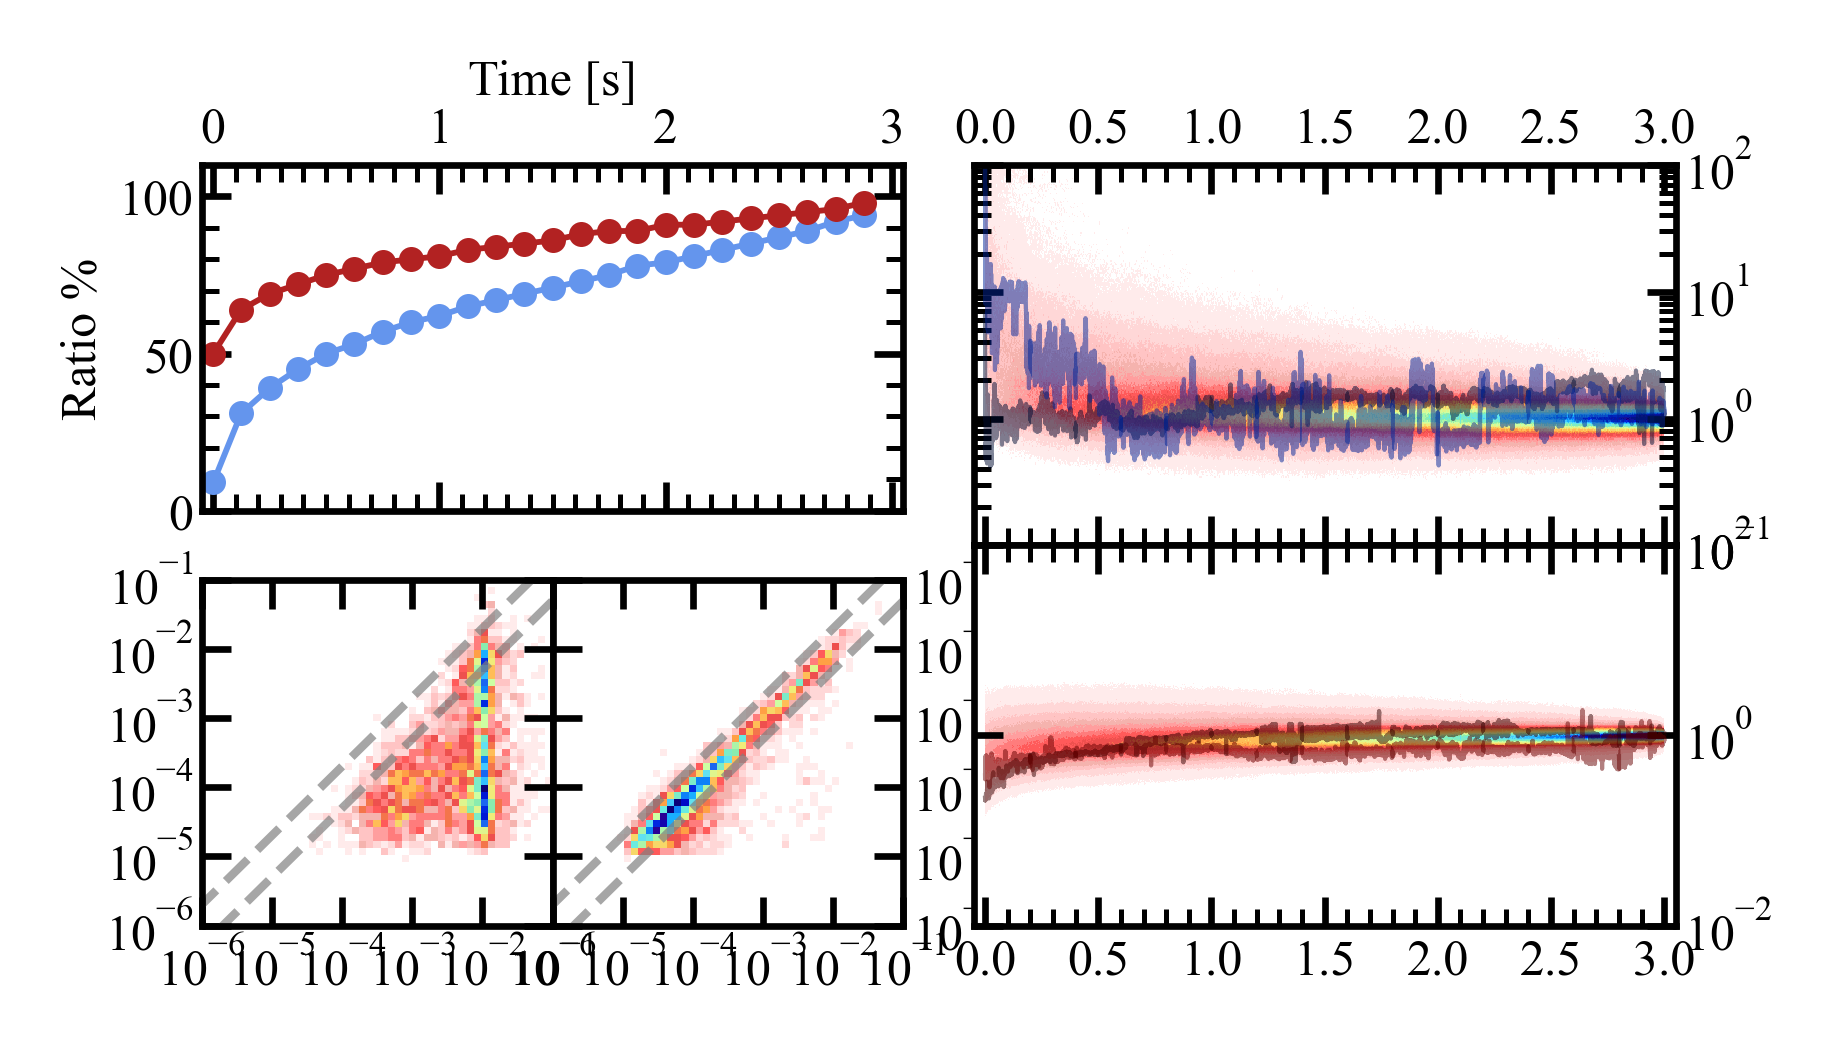

In [78]:
fig = plt.figure(figsize=utils.cm2inch(7.8, 4.6), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=(1, 1),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.1, hspace=0.2)

gs_2d_scat_hist = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2,
                                                   subplot_spec=gs_total[1, 0], wspace=0, hspace=0)

gs_relax_2d = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1,
                                               subplot_spec=gs_total[:, 1], wspace=0, hspace=0)

ax_ratios = fig.add_subplot(gs_total[0, 0])
ax_1_12 = fig.add_subplot(gs_2d_scat_hist[0])
ax_12_25 = fig.add_subplot(gs_2d_scat_hist[1])
ax_relax_pull = fig.add_subplot(gs_relax_2d[0])
ax_relax_push = fig.add_subplot(gs_relax_2d[1], sharex=ax_relax_pull)

ax_ratios.xaxis.tick_top()
ax_ratios.xaxis.set_label_position('top')
ax_ratios.xaxis.set_ticks_position('both')
ax_ratios.yaxis.set_ticks_position('both')

ax_1_12.xaxis.set_ticks_position('both')
ax_1_12.yaxis.set_ticks_position('both')

ax_12_25.xaxis.set_ticks_position('both')
ax_12_25.yaxis.tick_right()
ax_12_25.yaxis.set_label_position('right')
ax_12_25.yaxis.set_ticks_position('both')

ax_relax_pull.xaxis.tick_top()
ax_relax_pull.xaxis.set_label_position('top')
ax_relax_pull.xaxis.set_ticks_position('both')
ax_relax_pull.yaxis.tick_right()
ax_relax_pull.yaxis.set_label_position('right')
ax_relax_pull.yaxis.set_ticks_position('both')

ax_relax_push.yaxis.tick_right()
ax_relax_push.yaxis.set_label_position('right')
ax_relax_push.yaxis.set_ticks_position('both')
ax_relax_push.xaxis.set_ticks_position('both')

ax_ratios.plot(np.mean(hold_trace.test_intervals_pull, axis=1)[:-1]/50_000, ratios_pull, c='cornflowerblue',
               marker='o', markeredgecolor='None', markersize=3, lw=0.7)
ax_ratios.plot(np.mean(hold_trace.test_intervals_push, axis=1)[:-1]/50_000, ratios_push, c='firebrick',
               marker='o', markeredgecolor='None', markersize=3, lw=0.7)
ax_ratios.set_xlim(-0.05, 3.05)
ax_ratios.set_ylim(0, 110)
ax_ratios.xaxis.set_minor_locator(MultipleLocator(0.1))
ax_ratios.yaxis.set_minor_locator(MultipleLocator(10))
ax_ratios.set_xlabel('Time [s]')
ax_ratios.set_ylabel('Ratio %')

# scatter 2d histograms

im_norm_pull = ax_1_12.pcolormesh(x_mesh_pull, y_mesh_pull, hist_2d_pull_1_12, cmap=utils.cmap_geo32)
im_norm_push = ax_12_25.pcolormesh(x_mesh_pull, y_mesh_pull, hist_2d_pull_12_25, cmap=utils.cmap_geo32)

ax_1_12.set_xscale('log')
ax_1_12.set_yscale('log')
ax_1_12.set_xlim(1e-6, 1e-1)
ax_1_12.set_ylim(1e-6, 1e-1)
ax_1_12.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_1_12.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_1_12.set_yticks([], minor=True)
ax_12_25.set_xscale('log')
ax_12_25.set_yscale('log')
ax_12_25.set_xlim(1e-6, 1e-1)
ax_12_25.set_ylim(1e-6, 1e-1)
ax_12_25.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_12_25.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_12_25.set_yticks([], minor=True)

ax_12_25.plot(np.logspace(-7, 0, num=10, base=10), 2*np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)
ax_12_25.plot(2*np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)

ax_1_12.plot(np.logspace(-7, 0, num=10, base=10), 2*np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)
ax_1_12.plot(2*np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)

im_norm_pull = ax_relax_pull.pcolormesh(x_mesh, y_mesh, H_pull, cmap=utils.cmap_geo32, vmax=3000)
im_norm_push = ax_relax_push.pcolormesh(x_mesh, y_mesh, H_push, cmap=utils.cmap_geo32, vmax=10000)
ax_relax_pull.set_yscale('log')
ax_relax_pull.set_ylim(1e-1, 1e2)
ax_relax_push.set_yscale('log')

# for i, trace_num in enumerate(np.random.choice(in_both, 3)):
for i, trace_num in enumerate([13737, 15578]):
    print(trace_num)
    
    hold_trace = HoldTrace(f'trace_{trace_num}', load_from=home_folder, bias_offset=0,
                           r_serial_ohm=99_900, min_step_len=20_000, min_height=1)
    
    ax_relax_pull.plot(utils.moving_average(np.arange(start=0, stop=len(hold_trace.hold_conductance_pull), step=1), 10),
                       utils.moving_average(hold_trace.hold_conductance_pull/hold_trace.hold_conductance_pull[-1], 10),
                       lw=0.5, c=utils.blues[i], alpha=0.5)

    ax_relax_push.plot(utils.moving_average(np.arange(start=0, stop=len(hold_trace.hold_conductance_push), step=1), 10),
                       utils.moving_average(hold_trace.hold_conductance_push/hold_trace.hold_conductance_push[-1], 10),
                       lw=0.5, c=utils.reds[i], alpha=0.5)

ax_relax_pull.set_xticks(np.arange(0, 155000, 25000))
ax_relax_pull.set_xticks(np.arange(0, 155000, 5000), minor=True)
ax_relax_pull.set_xticklabels(np.arange(0, 155000, 25000)/50_000)

ax_relax_pull.set_xlim(-0.05*50_000, 3.05*50_000)
# plt.savefig(home_folder.joinpath('results/ratios_pull.png'), bbox_inches='tight')

In [60]:
hold_trace.hold_conductance_pull/hold_trace.hold_conductance_pull[-1]

array([23.80643419, 38.75575058, 28.18273852, ...,  0.9399459 ,
        0.96251989,  1.        ])

In [63]:
np.arange(start=0, stop=len(hold_trace.hold_conductance_pull)/50_000, step=1/50_000)

array([0.00000e+00, 2.00000e-05, 4.00000e-05, ..., 2.99994e+00,
       2.99996e+00, 2.99998e+00])

In [969]:
hold_trace.test_intervals_pull.mean(axis=1)/50_000

array([1.50000e-03, 1.24980e-01, 2.49980e-01, 3.74980e-01, 4.99980e-01,
       6.24980e-01, 7.49980e-01, 8.74980e-01, 9.99980e-01, 1.12496e+00,
       1.24996e+00, 1.37496e+00, 1.49996e+00, 1.62496e+00, 1.74996e+00,
       1.87496e+00, 1.99996e+00, 2.12494e+00, 2.24994e+00, 2.37494e+00,
       2.49994e+00, 2.62494e+00, 2.74994e+00, 2.87494e+00, 2.99844e+00])

In [968]:
len(hold_trace.hold_conductance_pull)/50_000

2.99996

NameError: name 'ratios_pull' is not defined

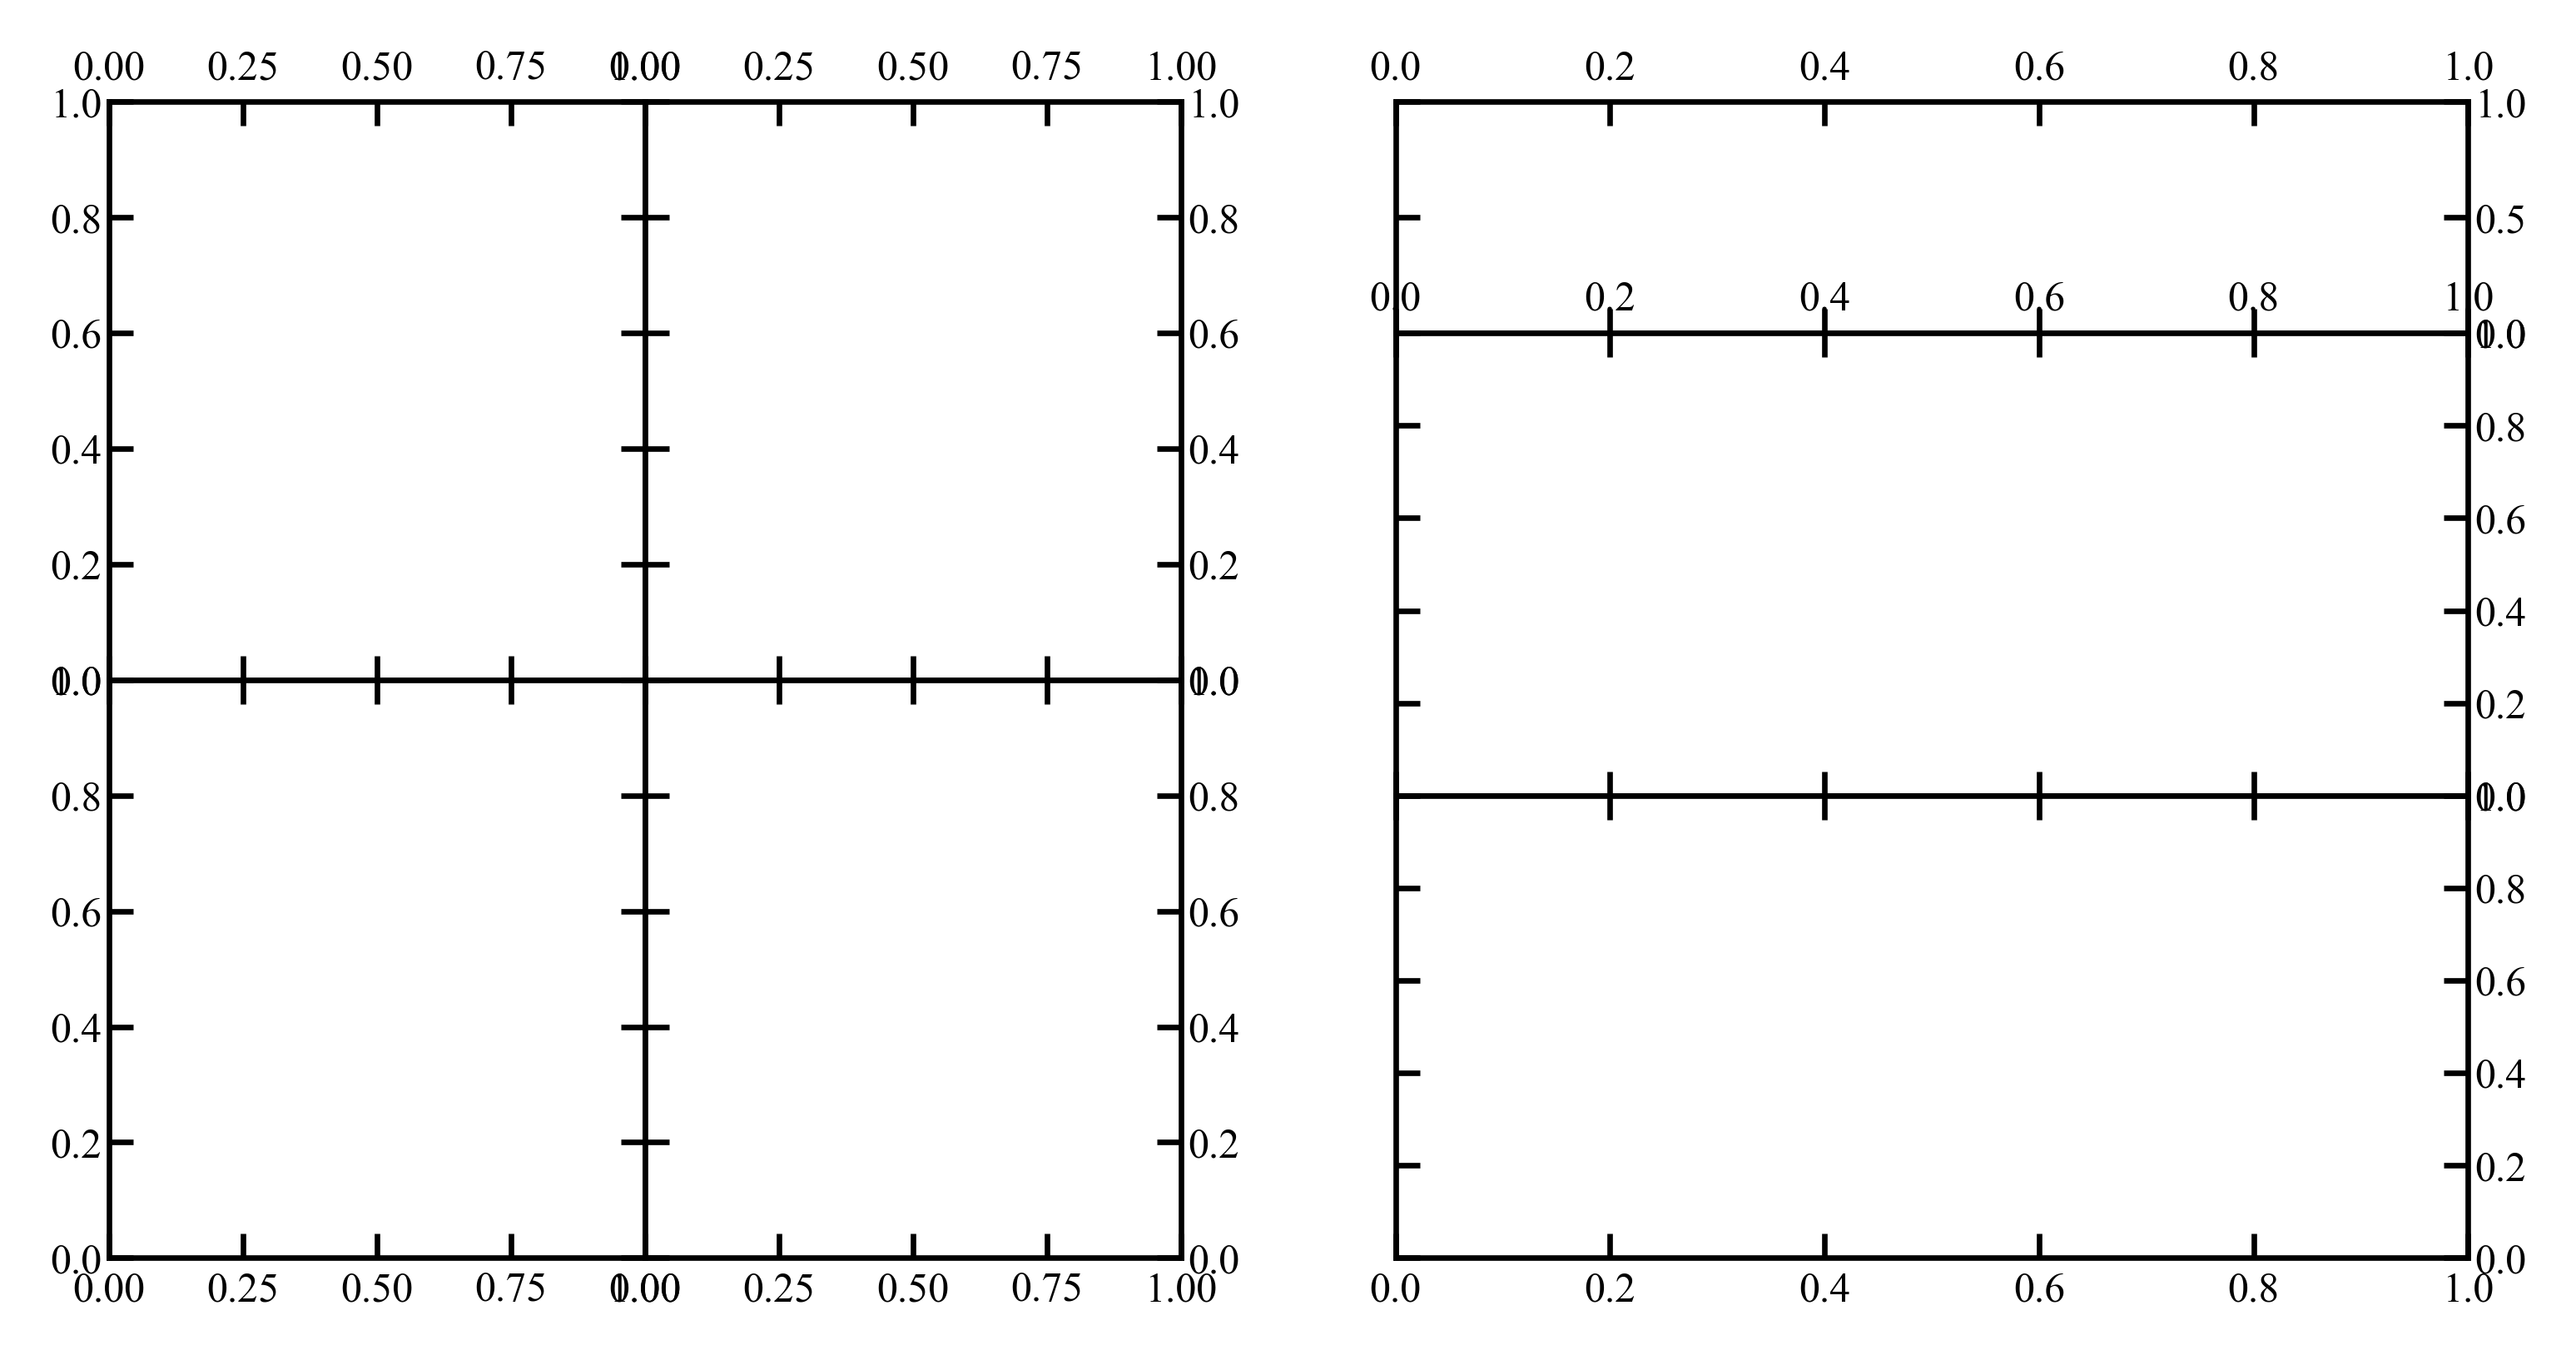

In [290]:
fig = plt.figure(figsize=utils.cm2inch(15, 8.4), dpi=600)  # figsize: (width, height) in inches

gs_total = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=(1, 1),
                           figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.2, hspace=0)

gs_2d_scat_hist = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2, width_ratios=(1, 1), height_ratios=(1, 1),
                                                   subplot_spec=gs_total[0], wspace=0, hspace=0)

gs_relax_2d = gridspec.GridSpecFromSubplotSpec(nrows=3, ncols=1, height_ratios=(1, 2, 2),
                                               subplot_spec=gs_total[1], wspace=0, hspace=0)

ax_ratios = fig.add_subplot(gs_relax_2d[0])
ax_relax_pull = fig.add_subplot(gs_relax_2d[1])
ax_relax_push = fig.add_subplot(gs_relax_2d[2], sharex=ax_relax_pull)

ax_1_12_pull = fig.add_subplot(gs_2d_scat_hist[0, 0])
ax_12_25_pull = fig.add_subplot(gs_2d_scat_hist[0, 1])

ax_1_12_push = fig.add_subplot(gs_2d_scat_hist[1, 0])
ax_12_25_push = fig.add_subplot(gs_2d_scat_hist[1, 1])

ax_ratios.xaxis.tick_top()
ax_ratios.xaxis.set_label_position('top')
ax_ratios.xaxis.set_ticks_position('both')
ax_ratios.yaxis.tick_right()
ax_ratios.yaxis.set_label_position('right')
ax_ratios.yaxis.set_ticks_position('both')

ax_1_12_pull.xaxis.tick_top()
ax_1_12_pull.xaxis.set_label_position('top')
ax_1_12_pull.xaxis.set_ticks_position('both')
ax_1_12_pull.yaxis.set_ticks_position('both')

ax_12_25_pull.xaxis.tick_top()
ax_12_25_pull.xaxis.set_label_position('top')
ax_12_25_pull.xaxis.set_ticks_position('both')
ax_12_25_pull.yaxis.tick_right()
ax_12_25_pull.yaxis.set_label_position('right')
ax_12_25_pull.yaxis.set_ticks_position('both')

ax_1_12_push.xaxis.set_ticks_position('both')
ax_1_12_push.yaxis.set_ticks_position('both')

ax_12_25_push.xaxis.set_ticks_position('both')
ax_12_25_push.yaxis.tick_right()
ax_12_25_push.yaxis.set_label_position('right')
ax_12_25_push.yaxis.set_ticks_position('both')

ax_relax_pull.xaxis.tick_top()
ax_relax_pull.xaxis.set_label_position('top')
ax_relax_pull.xaxis.set_ticks_position('both')
ax_relax_pull.yaxis.tick_right()
ax_relax_pull.yaxis.set_label_position('right')
ax_relax_pull.yaxis.set_ticks_position('both')

ax_relax_push.yaxis.tick_right()
ax_relax_push.yaxis.set_label_position('right')
ax_relax_push.yaxis.set_ticks_position('both')
ax_relax_push.xaxis.set_ticks_position('both')

ax_ratios.plot(np.mean(hold_trace.test_intervals_pull, axis=1)[:-1]/50_000, ratios_pull, c='cornflowerblue',
               marker='o', markeredgecolor='None', markersize=3, lw=0.7)
ax_ratios.plot(np.mean(hold_trace.test_intervals_push, axis=1)[:-1]/50_000, ratios_push, c='firebrick',
               marker='o', markeredgecolor='None', markersize=3, lw=0.7)
ax_ratios.set_xlim(-0.05, 3.05)
ax_ratios.set_ylim(0, 110)
ax_ratios.xaxis.set_minor_locator(MultipleLocator(0.1))
ax_ratios.yaxis.set_minor_locator(MultipleLocator(10))
ax_ratios.set_xlabel('Time [s]')
ax_ratios.set_ylabel('Ratio %')

# scatter 2d histograms

im_norm_pull_1_12 = ax_1_12_pull.pcolormesh(x_mesh_pull, y_mesh_pull, hist_2d_pull_1_12, cmap=utils.cmap_geo32)
im_norm_pull_12_25 = ax_12_25_pull.pcolormesh(x_mesh_pull, y_mesh_pull, hist_2d_pull_12_25, cmap=utils.cmap_geo32)

im_norm_push_1_12 = ax_1_12_push.pcolormesh(x_mesh_push, y_mesh_push, hist_2d_push_1_12, cmap=utils.cmap_geo32)
im_norm_push_12_25 = ax_12_25_push.pcolormesh(x_mesh_push, y_mesh_push, hist_2d_push_12_25, cmap=utils.cmap_geo32)

ax_1_12_pull.set_xscale('log')
ax_1_12_pull.set_yscale('log')
ax_1_12_pull.set_xlim(1e-6, 1e-1)
ax_1_12_pull.set_ylim(1e-6, 1e-1)
ax_1_12_pull.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_1_12_pull.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_1_12_pull.set_yticks([], minor=True)
ax_12_25_pull.set_xscale('log')
ax_12_25_pull.set_yscale('log')
ax_12_25_pull.set_xlim(1e-6, 1e-1)
ax_12_25_pull.set_ylim(1e-6, 1e-1)
ax_12_25_pull.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_12_25_pull.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_12_25_pull.set_yticks([], minor=True)

ax_1_12_push.set_xscale('log')
ax_1_12_push.set_yscale('log')
ax_1_12_push.set_xlim(1e-6, 1e-1)
ax_1_12_push.set_ylim(1e-6, 1e-1)
ax_1_12_push.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_1_12_push.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_1_12_push.set_yticks([], minor=True)
ax_12_25_push.set_xscale('log')
ax_12_25_push.set_yscale('log')
ax_12_25_push.set_xlim(1e-6, 1e-1)
ax_12_25_push.set_ylim(1e-6, 1e-1)
ax_12_25_push.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_12_25_push.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
ax_12_25_push.set_yticks([], minor=True)

ax_12_25_pull.plot(np.logspace(-7, 0, num=10, base=10), 2*np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)
ax_12_25_pull.plot(2*np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)

ax_1_12_pull.plot(np.logspace(-7, 0, num=10, base=10), 2*np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)
ax_1_12_pull.plot(2*np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)

ax_12_25_push.plot(np.logspace(-7, 0, num=10, base=10), 2*np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)
ax_12_25_push.plot(2*np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)

ax_1_12_push.plot(np.logspace(-7, 0, num=10, base=10), 2*np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)
ax_1_12_push.plot(2*np.logspace(-7, 0, num=10, base=10), np.logspace(-7, 0, num=10, base=10), c='grey', ls='--', lw=1, alpha=0.7)

im_norm_pull = ax_relax_pull.pcolormesh(x_mesh, y_mesh, H_pull, cmap=utils.cmap_geo32, vmax=3000)
im_norm_push = ax_relax_push.pcolormesh(x_mesh, y_mesh, H_push, cmap=utils.cmap_geo32, vmax=10000)
ax_relax_pull.set_yscale('log')
ax_relax_pull.set_ylim(1e-1, 1e2)
ax_relax_push.set_yscale('log')

ax_relax_pull.set_xticks(np.arange(0, 155000, 25000))
ax_relax_pull.set_xticks(np.arange(0, 155000, 5000), minor=True)
ax_relax_pull.set_xticklabels(np.arange(0, 155000, 25000)/50_000)

ax_relax_pull.set_xlim(-0.05*50_000, 3.05*50_000)

ax_1_12_pull.set_xlabel(r'$G_{\mathrm{avgs}1}$ $[G_{0}]$')
ax_1_12_pull.set_ylabel(r'$G_{\mathrm{avgs}12}$ $[G_{0}]$')
ax_12_25_pull.set_xlabel(r'$G_{\mathrm{avgs}12}$ $[G_{0}]$')
ax_12_25_pull.set_ylabel(r'$G_{\mathrm{avgs}25}$ $[G_{0}]$')
ax_1_12_push.set_xlabel(r'$G_{\mathrm{avgs}1}$ $[G_{0}]$')
ax_1_12_push.set_ylabel(r'$G_{\mathrm{avgs}12}$ $[G_{0}]$')
ax_12_25_push.set_xlabel(r'$G_{\mathrm{avgs}12}$ $[G_{0}]$')
ax_12_25_push.set_ylabel(r'$G_{\mathrm{avgs}25}$ $[G_{0}]$')

ax_relax_pull.set_xlabel('Time [s]')
ax_relax_pull.set_ylabel('Scaled condutuctance')
ax_relax_push.set_ylabel('Scaled condutuctance')
plt.savefig(home_folder.joinpath('results/relax_statistics.png'), bbox_inches='tight')